In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import json
import glob
import pickle

In [2]:
results_dir = r'C:\Users\sarab\Desktop\csv_results'
figures_normal_dir = os.path.join(results_dir,'figures_normal')
figures_sampling_dir = os.path.join(results_dir,'figures_sampling')

wdir = os.getcwd()
udir = os.path.join(os.path.split(wdir)[0], "utils")

json_file_path = os.path.join(udir,'tasks_metadata.json')
with open(json_file_path, 'r') as j:
    task_infos = json.loads(j.read())

## Spatial Results (no sampling)

In [9]:
spatial_results = pd.read_csv(os.path.join(results_dir,'spatial_results_normal.csv'),sep=',',header=0)
spatial_results

year state            classifier  median_accuracy  median_sex_dpd  \
0    2014    AL                LogReg         0.753179        0.127581   
1    2014    AK                LogReg         0.728160        0.058206   
2    2014    AZ                LogReg         0.752875        0.123988   
3    2014    AR                LogReg         0.754644        0.109480   
4    2014    CA                LogReg         0.750022        0.137748   
..    ...   ...                   ...              ...             ...   
995  2018    VA  AdversarialDebiasing         0.781810        0.062129   
996  2018    WA  AdversarialDebiasing         0.785922        0.070098   
997  2018    WV  AdversarialDebiasing         0.759208        0.062407   
998  2018    WI  AdversarialDebiasing         0.780196        0.025551   
999  2018    WY  AdversarialDebiasing         0.751968        0.016412   

     median_sex_dpr  median_sex_eod  median_rac_dpd  median_rac_dpr  \
0          0.793896        0.133621        0.107782        0.808289   
1          0.919593        0.044458        0.133567        0.813799   
2          0.800488        0.125091        0.085280        0.844134   
3          0.823591        0.115304        0.136996        0.781363   
4          0.793445        0.130808        0.140977        0.779741   
..              ...             ...             ...             ...   
995        0.905921        0.050936        0.106228        0.847502   
996        0.888905        0.062878        0.109962        0.840680   
997        0.884615        0.067304        0.086589        0.830141   
998        0.959653        0.060724        0.152896        0.770175   
999        0.972230        0.060114        0.278336        0.665632   

     median_rac_eod  
0          0.113701  
1          0.137547  
2          0.095384  
3          0.152625  
4          0.148295  
..              ...  
995        0.138275  
996        0.130424  
997        0.112058  
998        0.162381  
999        0.413095  

[1000 rows x 10 columns]

In [10]:
spatial_results.groupby(by=['year','classifier']).agg(state_count=('state','count'))

state_count
year classifier                       
2014 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2015 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2016 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2017 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2018 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

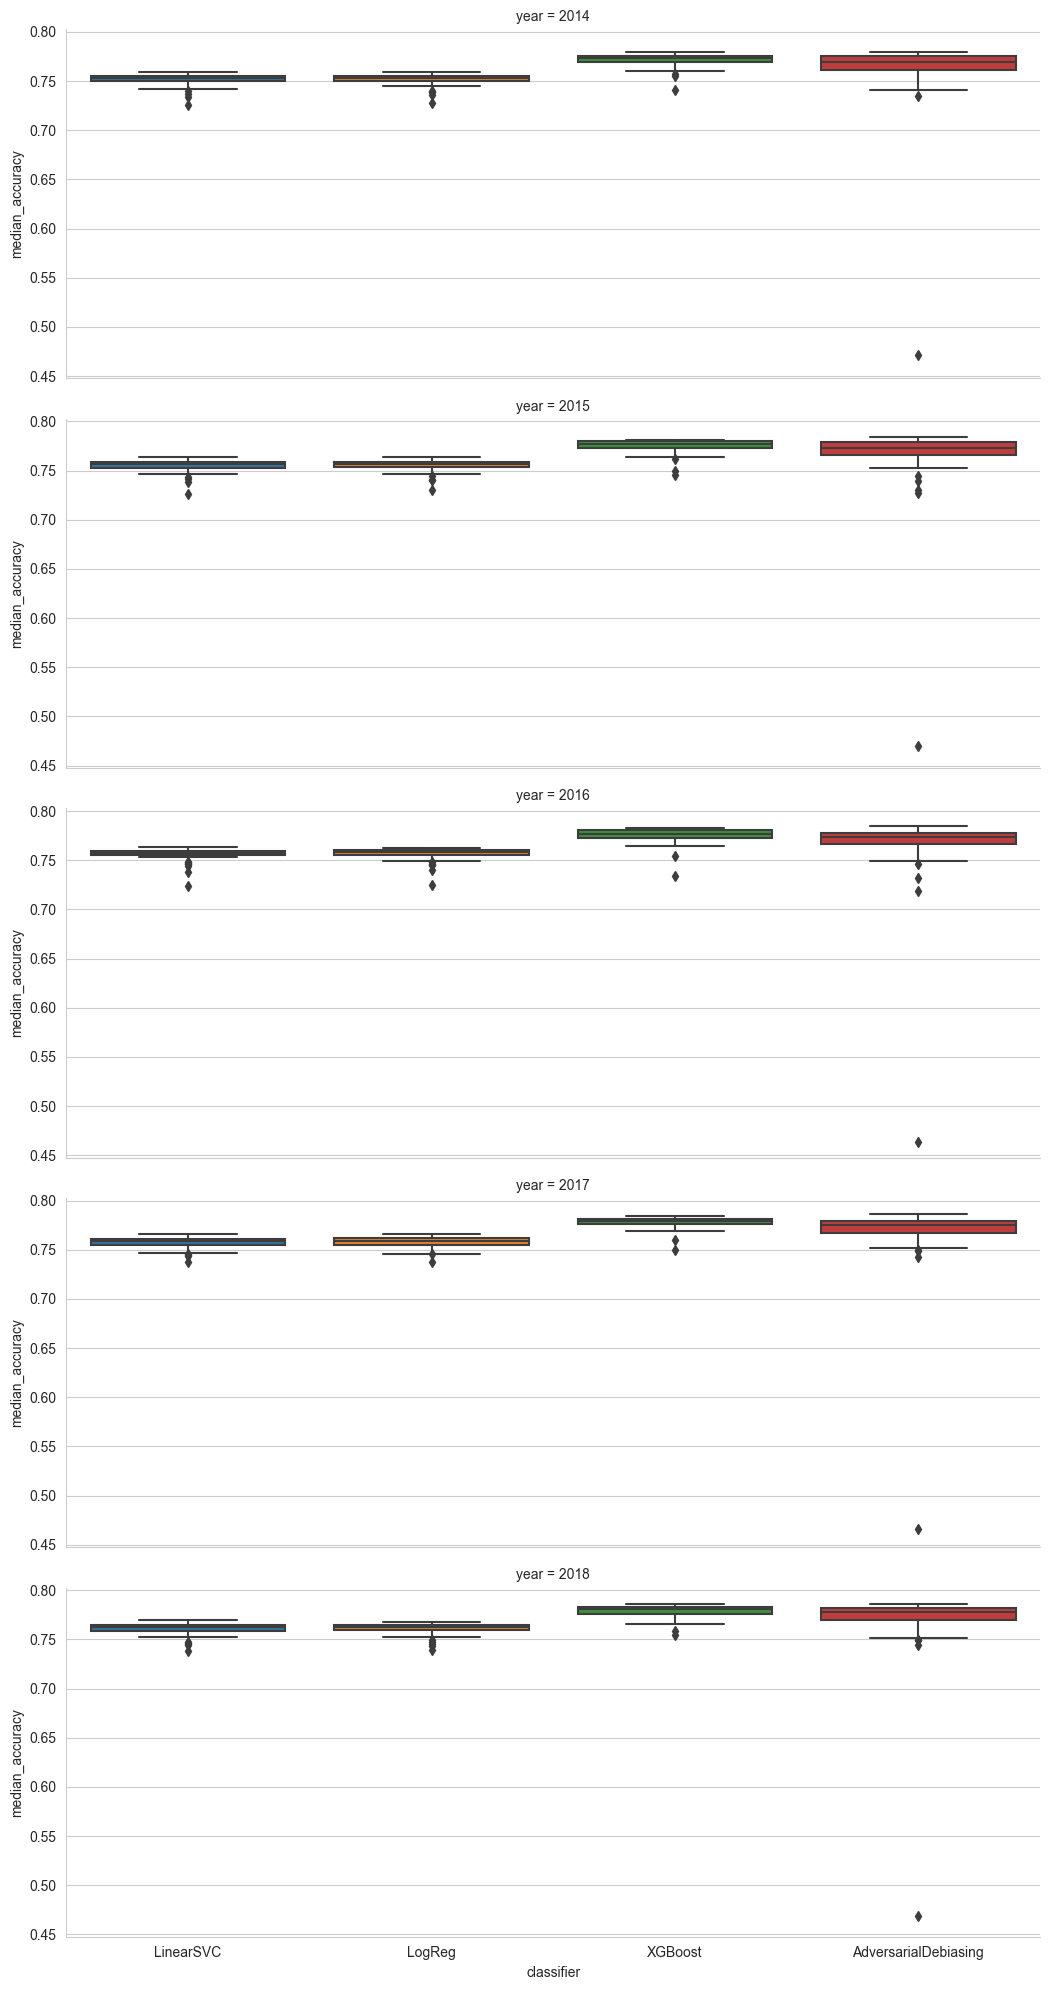

In [16]:
# median accuracy

clfiers = ['LinearSVC','LogReg','XGBoost','AdversarialDebiasing']

g = sns.catplot(data=spatial_results, x="classifier", y="median_accuracy", kind="box", order=clfiers, row='year',
                height=4, aspect=2.65)
g.axes.set_xlabel("Classifier",fontsize=15,visible=True)
g.axes.set_ylabel("Median Accuracy",fontsize=15)
g.axes.tick_params(labelsize=15)


plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_normal_dir,'median_accuracy_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_accuracy_normal.png'),format='png',dpi=300)

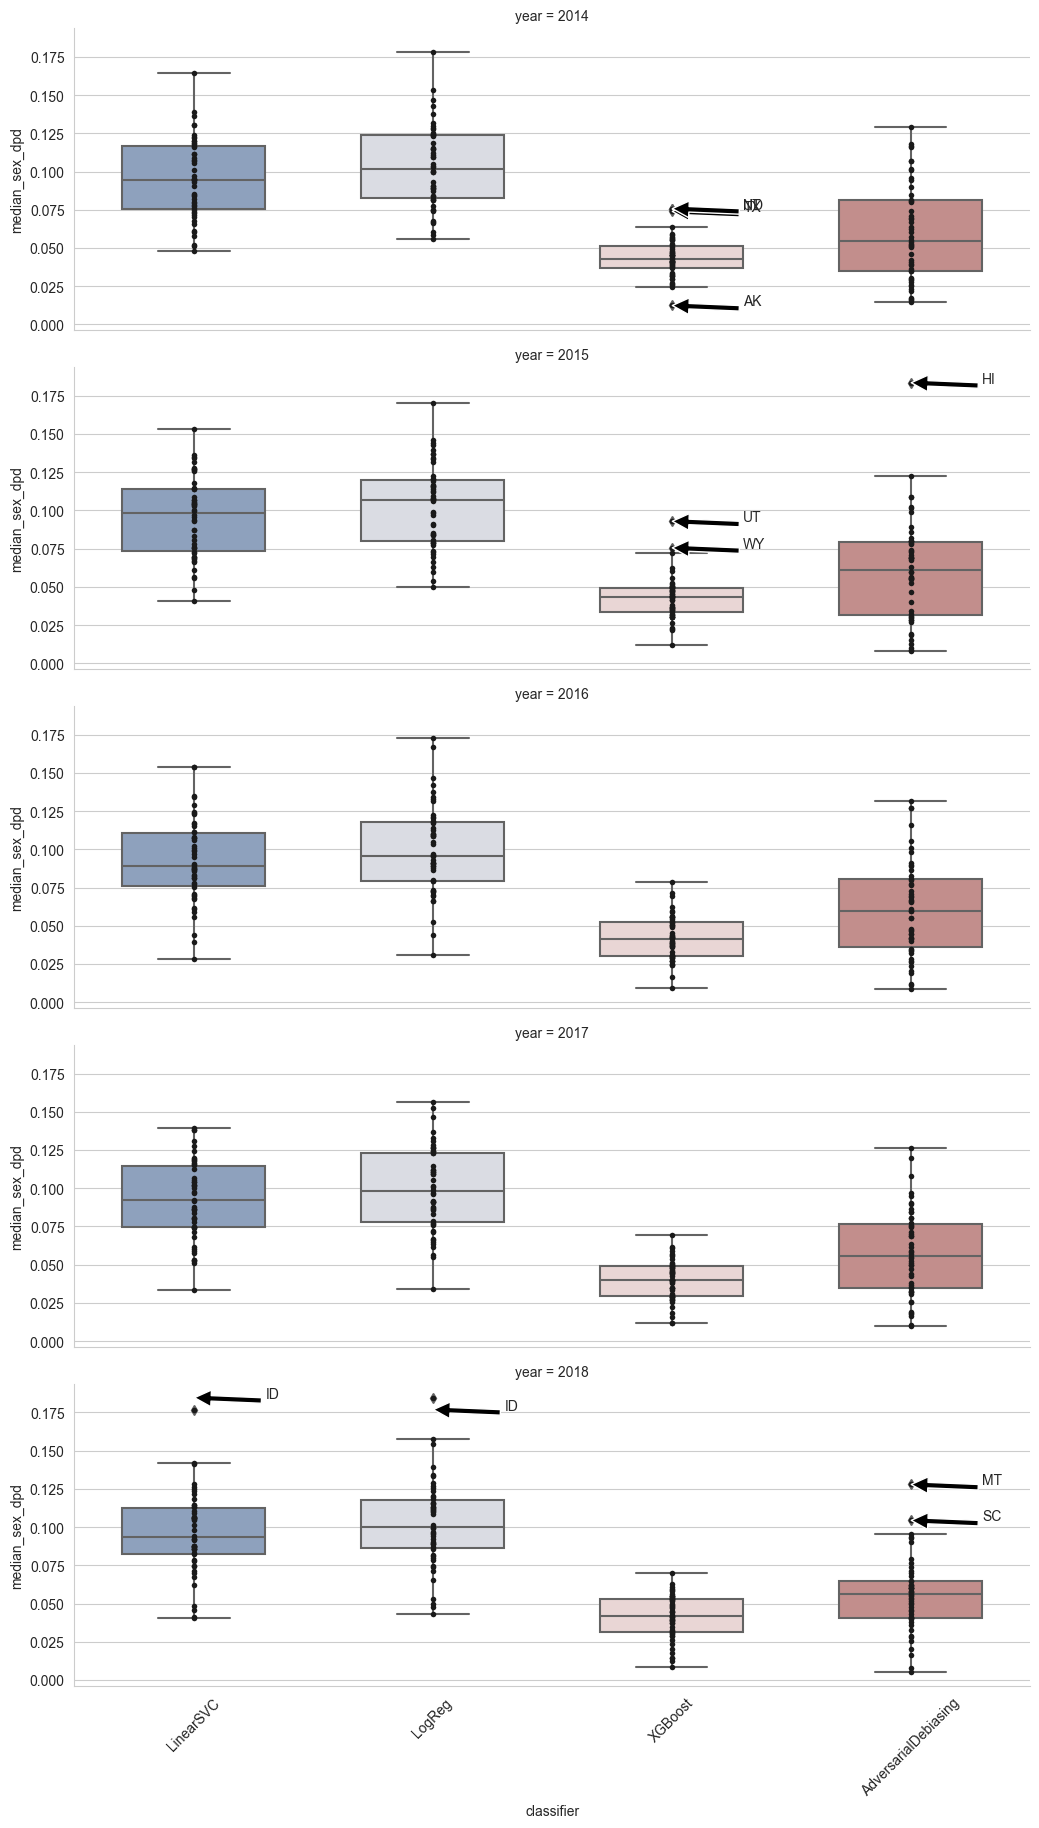

In [85]:
# median DPD SEX
from matplotlib.cbook import boxplot_stats
clfiers_coord={"LogReg":0,'LinearSVC':1,'XGBoost':2,'AdversarialDebiasing':3}

g = sns.FacetGrid(spatial_results, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_sex_dpd", width=.6, order=clfiers, palette="vlag")
g.map(sns.stripplot,"classifier", "median_sex_dpd", size=4, order=clfiers,jitter=False, color=".1", linewidth=0)


for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results["classifier"]):
        group = spatial_results.loc[(spatial_results["year"] == row) & (spatial_results["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_dpd"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_dpd"], group["state"]):
                if m in fliers:
                    outlier_states.append(s)

                    ax.annotate(f'{s}',xy=(clfiers_coord[c], m),xytext=(clfiers_coord[c]+0.3, m),arrowprops=dict
                    (facecolor='black',shrink=0.01))
                    #ax.annotate(f' {s}', xy=(clfiers_coord[c], m))


for axes in g.axes.flat:
    _ = axes.set_xticklabels(clfiers, rotation=45)

g.savefig(os.path.join(figures_normal_dir,'median_sex_dpd_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_sex_dpd_normal.png'),format='png',dpi=300)

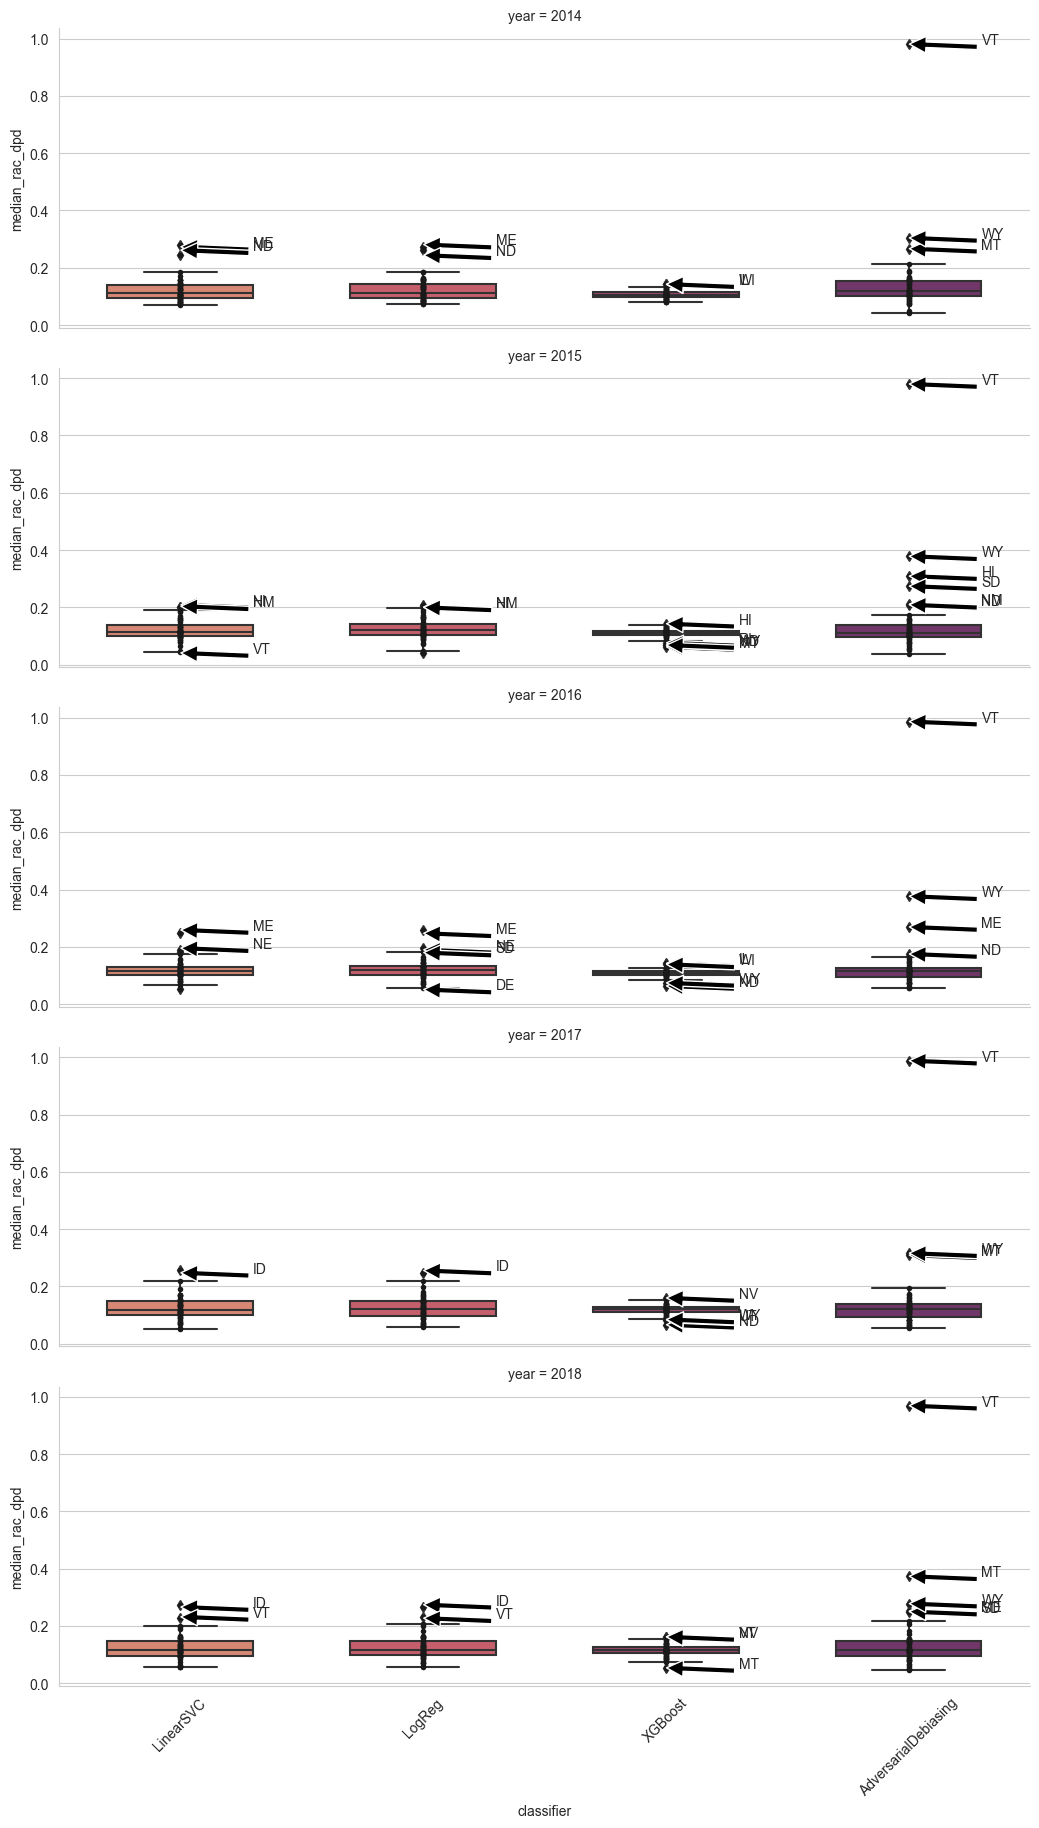

In [90]:
g = sns.FacetGrid(spatial_results, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_rac_dpd", width=.6, order=clfiers, palette="flare")
g.map(sns.stripplot,"classifier", "median_rac_dpd", size=4, order=clfiers, jitter=False, color=".1", linewidth=0)

for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results["classifier"]):
        group = spatial_results.loc[(spatial_results["year"] == row) & (spatial_results["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_dpd"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_dpd"], group["state"]):
                if m in fliers:
                    outlier_states.append(s)

                    ax.annotate(f'{s}',xy=(clfiers_coord[c], m),xytext=(clfiers_coord[c]+0.3, m),arrowprops=dict
                    (facecolor='black',shrink=0.01))
                    #ax.annotate(f' {s}', xy=(clfiers_coord[c], m))


for axes in g.axes.flat:
    _ = axes.set_xticklabels(clfiers, rotation=45)


g.savefig(os.path.join(figures_normal_dir,'median_rac_dpd_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_rac_dpd_normal.png'),format='png',dpi=300)

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



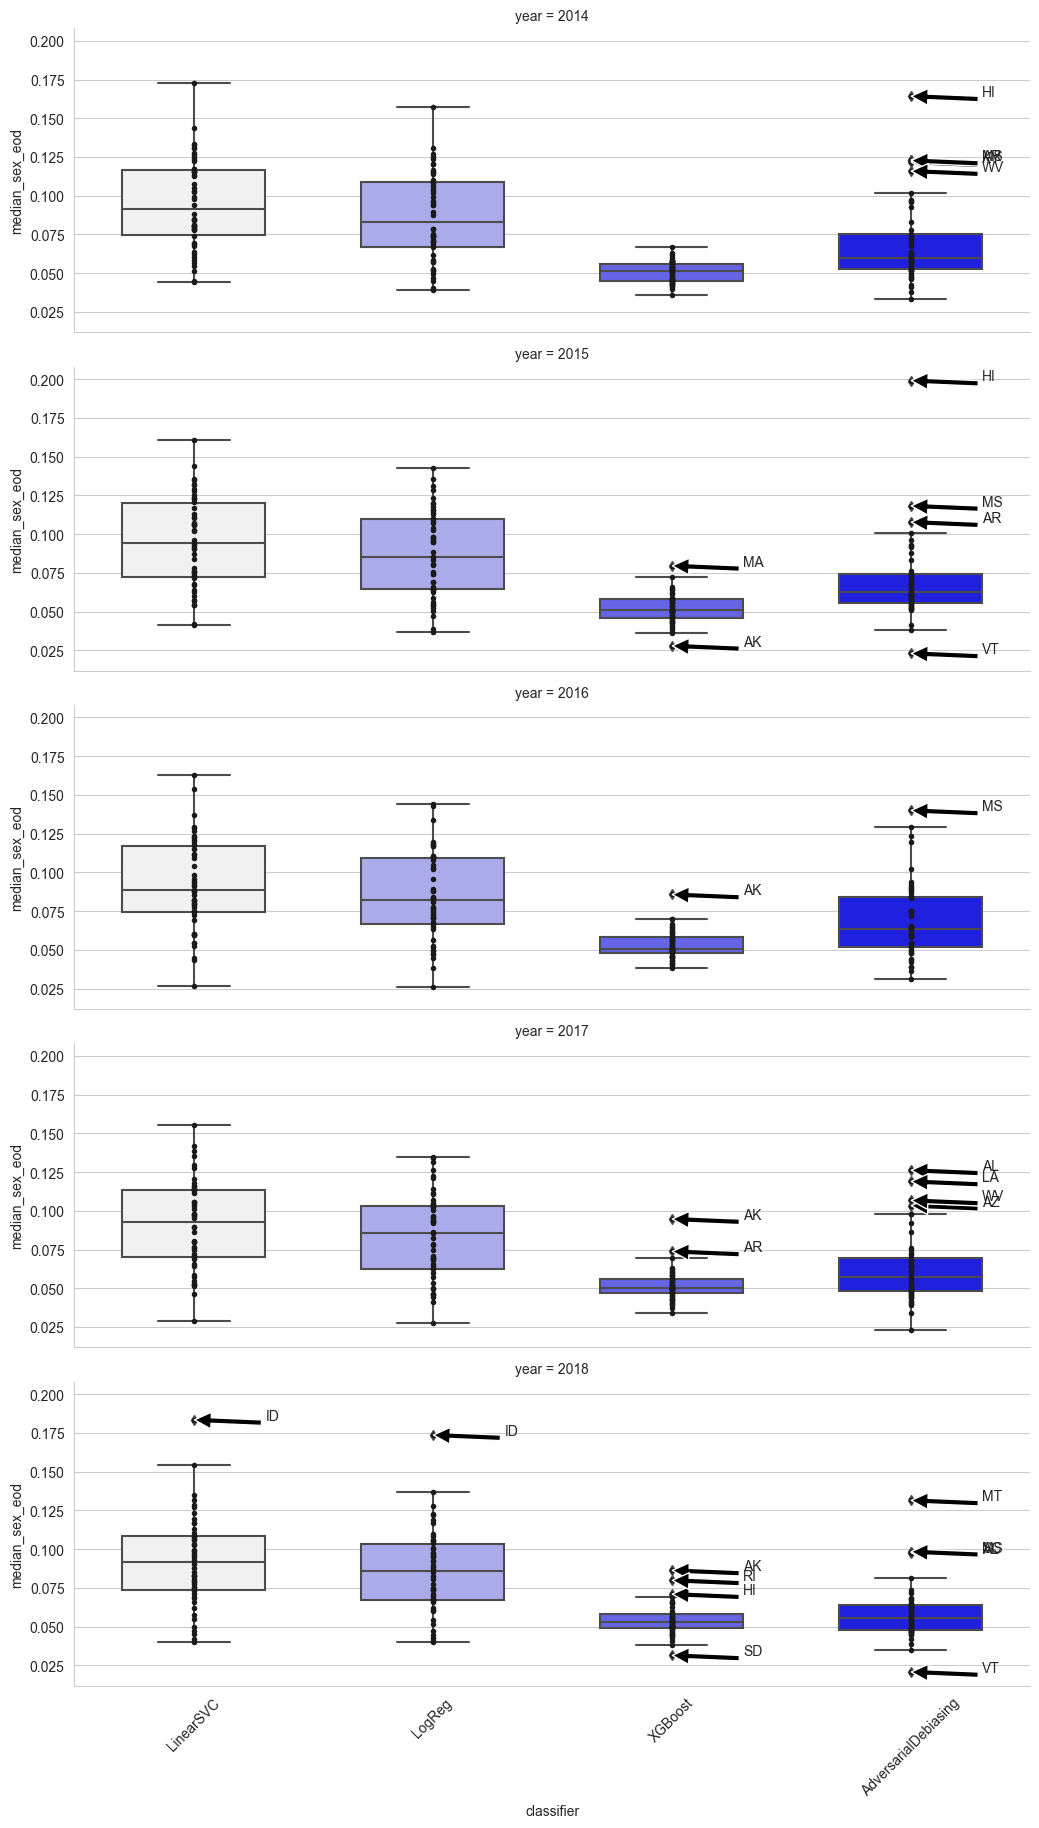

In [91]:
g = sns.FacetGrid(spatial_results, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_sex_eod", width=.6, palette="light:b")
g.map(sns.stripplot,"classifier", "median_sex_eod", size=4, jitter=False, color=".1", linewidth=0)

for axes in g.axes.flat:
    _ = axes.set_xticklabels(clfiers, rotation=45)

for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results["classifier"]):
        group = spatial_results.loc[(spatial_results["year"] == row) & (spatial_results["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_eod"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_eod"], group["state"]):
                if m in fliers:
                    outlier_states.append(s)

                    ax.annotate(f'{s}',xy=(clfiers_coord[c], m),xytext=(clfiers_coord[c]+0.3, m),arrowprops=dict
                    (facecolor='black',shrink=0.01))

g.savefig(os.path.join(figures_normal_dir,'median_sex_eod_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_sex_eod_normal.png'),format='png',dpi=300)

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



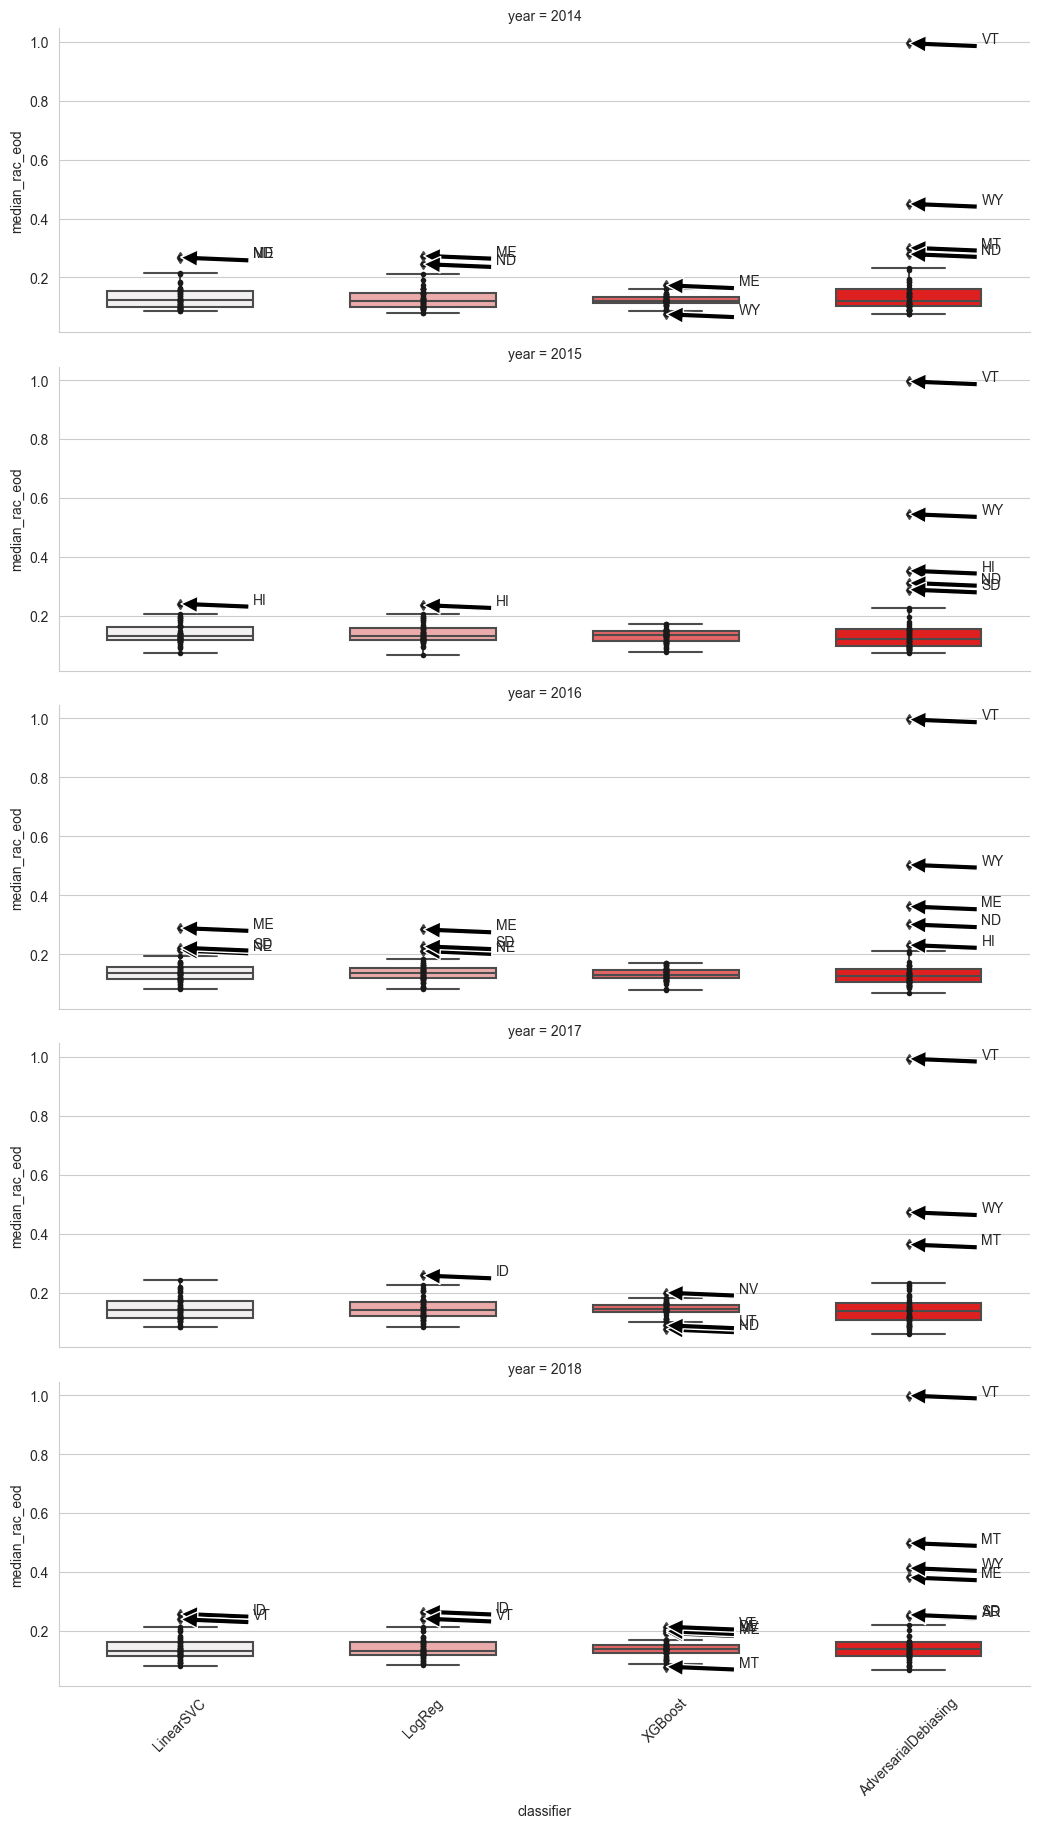

In [92]:
g = sns.FacetGrid(spatial_results, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_rac_eod", width=.6, palette="light:r")
g.map(sns.stripplot,"classifier", "median_rac_eod", size=4, jitter=False, color=".1", linewidth=0)

for axes in g.axes.flat:
    _ = axes.set_xticklabels(clfiers, rotation=45)

for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results["classifier"]):
        group = spatial_results.loc[(spatial_results["year"] == row) & (spatial_results["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_eod"])[0]["fliers"]
        outlier_states = []
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_eod"], group["state"]):
                if m in fliers:
                    outlier_states.append(s)

                    ax.annotate(f'{s}',xy=(clfiers_coord[c], m),xytext=(clfiers_coord[c]+0.3, m),arrowprops=dict
                    (facecolor='black',shrink=0.01))

g.savefig(os.path.join(figures_normal_dir,'median_rac_eod_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'median_rac_eod_normal.png'),format='png',dpi=300)

## Temporal 2014 plots (no sampling)

In [93]:
temporal_2014_results = pd.read_csv(os.path.join(results_dir,'results_temporal2014_normal.csv'),sep=',',header=0)
temporal_2014_results

classifier  year  train_kfold_accuracy  accuracy  \
0                         LinearSVC  2015              0.759770  0.764971   
1                         LinearSVC  2016              0.759770  0.761548   
2                         LinearSVC  2017              0.759770  0.765655   
3                         LinearSVC  2018              0.759770  0.760174   
4                            LogReg  2015              0.759604  0.764023   
..                              ...   ...                   ...       ...   
991            AdversarialDebiasing  2018              0.730029  0.750324   
992  ExponentiatedGradientReduction  2015              0.730668  0.724452   
993  ExponentiatedGradientReduction  2016              0.730668  0.741964   
994  ExponentiatedGradientReduction  2017              0.730668  0.730197   
995  ExponentiatedGradientReduction  2018              0.730668  0.733060   

     bal_accuracy  precision    recall   sex_dpd   sex_dpr   sex_eod  \
0        0.765926   0.738858  0.794560  0.122744  0.789853  0.126238   
1        0.762046   0.740398  0.793833  0.117801  0.800210  0.122810   
2        0.766432   0.739859  0.804300  0.120635  0.797493  0.119483   
3        0.760374   0.741281  0.795033  0.135020  0.776402  0.124132   
4        0.764700   0.741797  0.785017  0.127855  0.778984  0.134298   
..            ...        ...       ...       ...       ...       ...   
991      0.745667   0.787234  0.776321  0.068407  0.886432  0.090105   
992      0.697978   0.732695  0.841700  0.032457  0.953390  0.019815   
993      0.720268   0.740921  0.854525  0.050121  0.927882  0.025027   
994      0.705270   0.729047  0.855159  0.041047  0.941736  0.031607   
995      0.711149   0.728462  0.855377  0.047856  0.931669  0.020489   

      rac_dpd   rac_dpr train_state   rac_eod  
0    0.098245  0.821680          AL  0.095059  
1    0.100583  0.817364          AL  0.086215  
2    0.120889  0.786991          AL  0.097168  
3    0.101641  0.819508          AL  0.108752  
4    0.088877  0.833003          AL  0.084648  
..        ...       ...         ...       ...  
991  0.304131  0.650249          WY  0.296941  
992  0.054521  0.924709          WY  0.122995  
993  0.106214  0.852223          WY  0.069155  
994  0.077774  0.887395          WY  0.190244  
995  0.073144  0.892725          WY  0.436219  

[996 rows x 14 columns]

In [94]:
temporal_2014_results.groupby(by=['train_state','classifier']).size()

train_state  classifier                    
AK           AdversarialDebiasing              4
             ExponentiatedGradientReduction    4
             LinearSVC                         4
             LogReg                            4
             XGBoost                           4
                                              ..
WY           AdversarialDebiasing              4
             ExponentiatedGradientReduction    4
             LinearSVC                         4
             LogReg                            4
             XGBoost                           4
Length: 249, dtype: int64

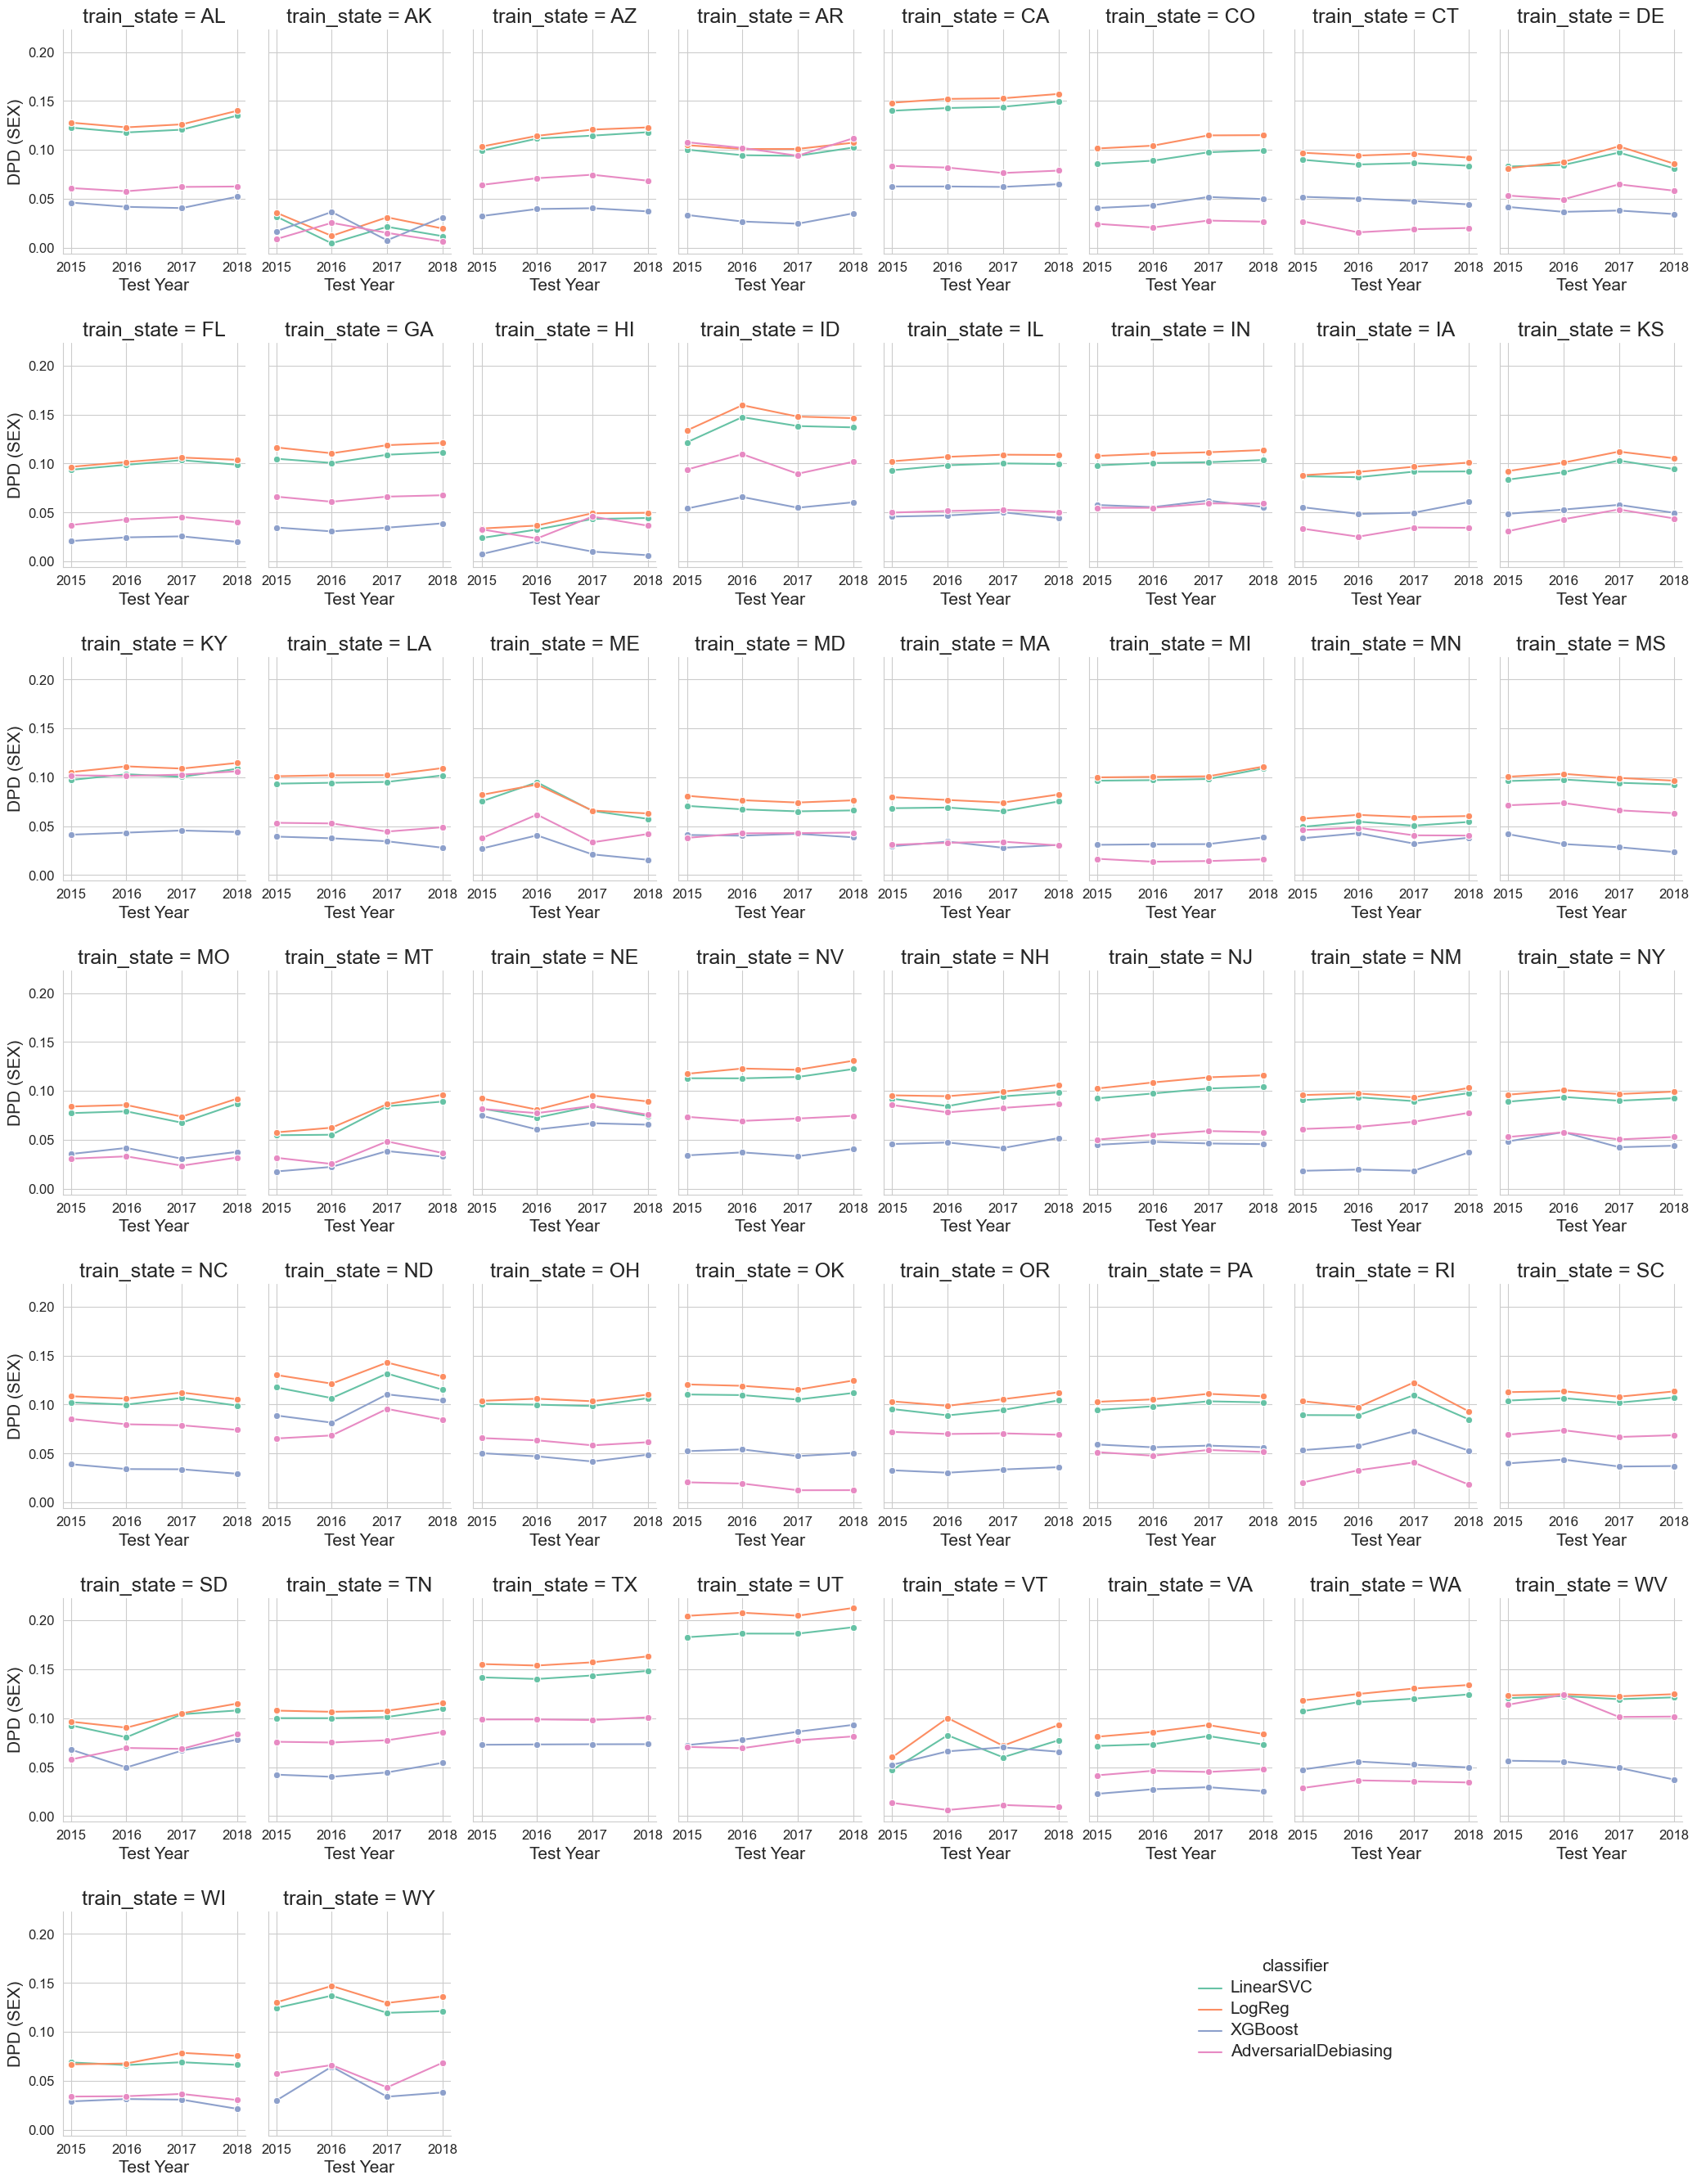

In [95]:
# plot with SEX DPD
g = sns.relplot(data=temporal_2014_results[~temporal_2014_results['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',
                x="year",
                y="sex_dpd",
                marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='Set2',
                height=4, aspect=0.65
           )

for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("DPD (SEX)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)
    #plt.subplots_adjust(bottom=0.5,hspace=0.5)
    #print(ax.title.get_text()[-2:])

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['dpd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_normal_dir,'temporal_2014_sex_dpd_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'temporal_2014_sex_dpd_normal.png'),format='png',dpi=300)

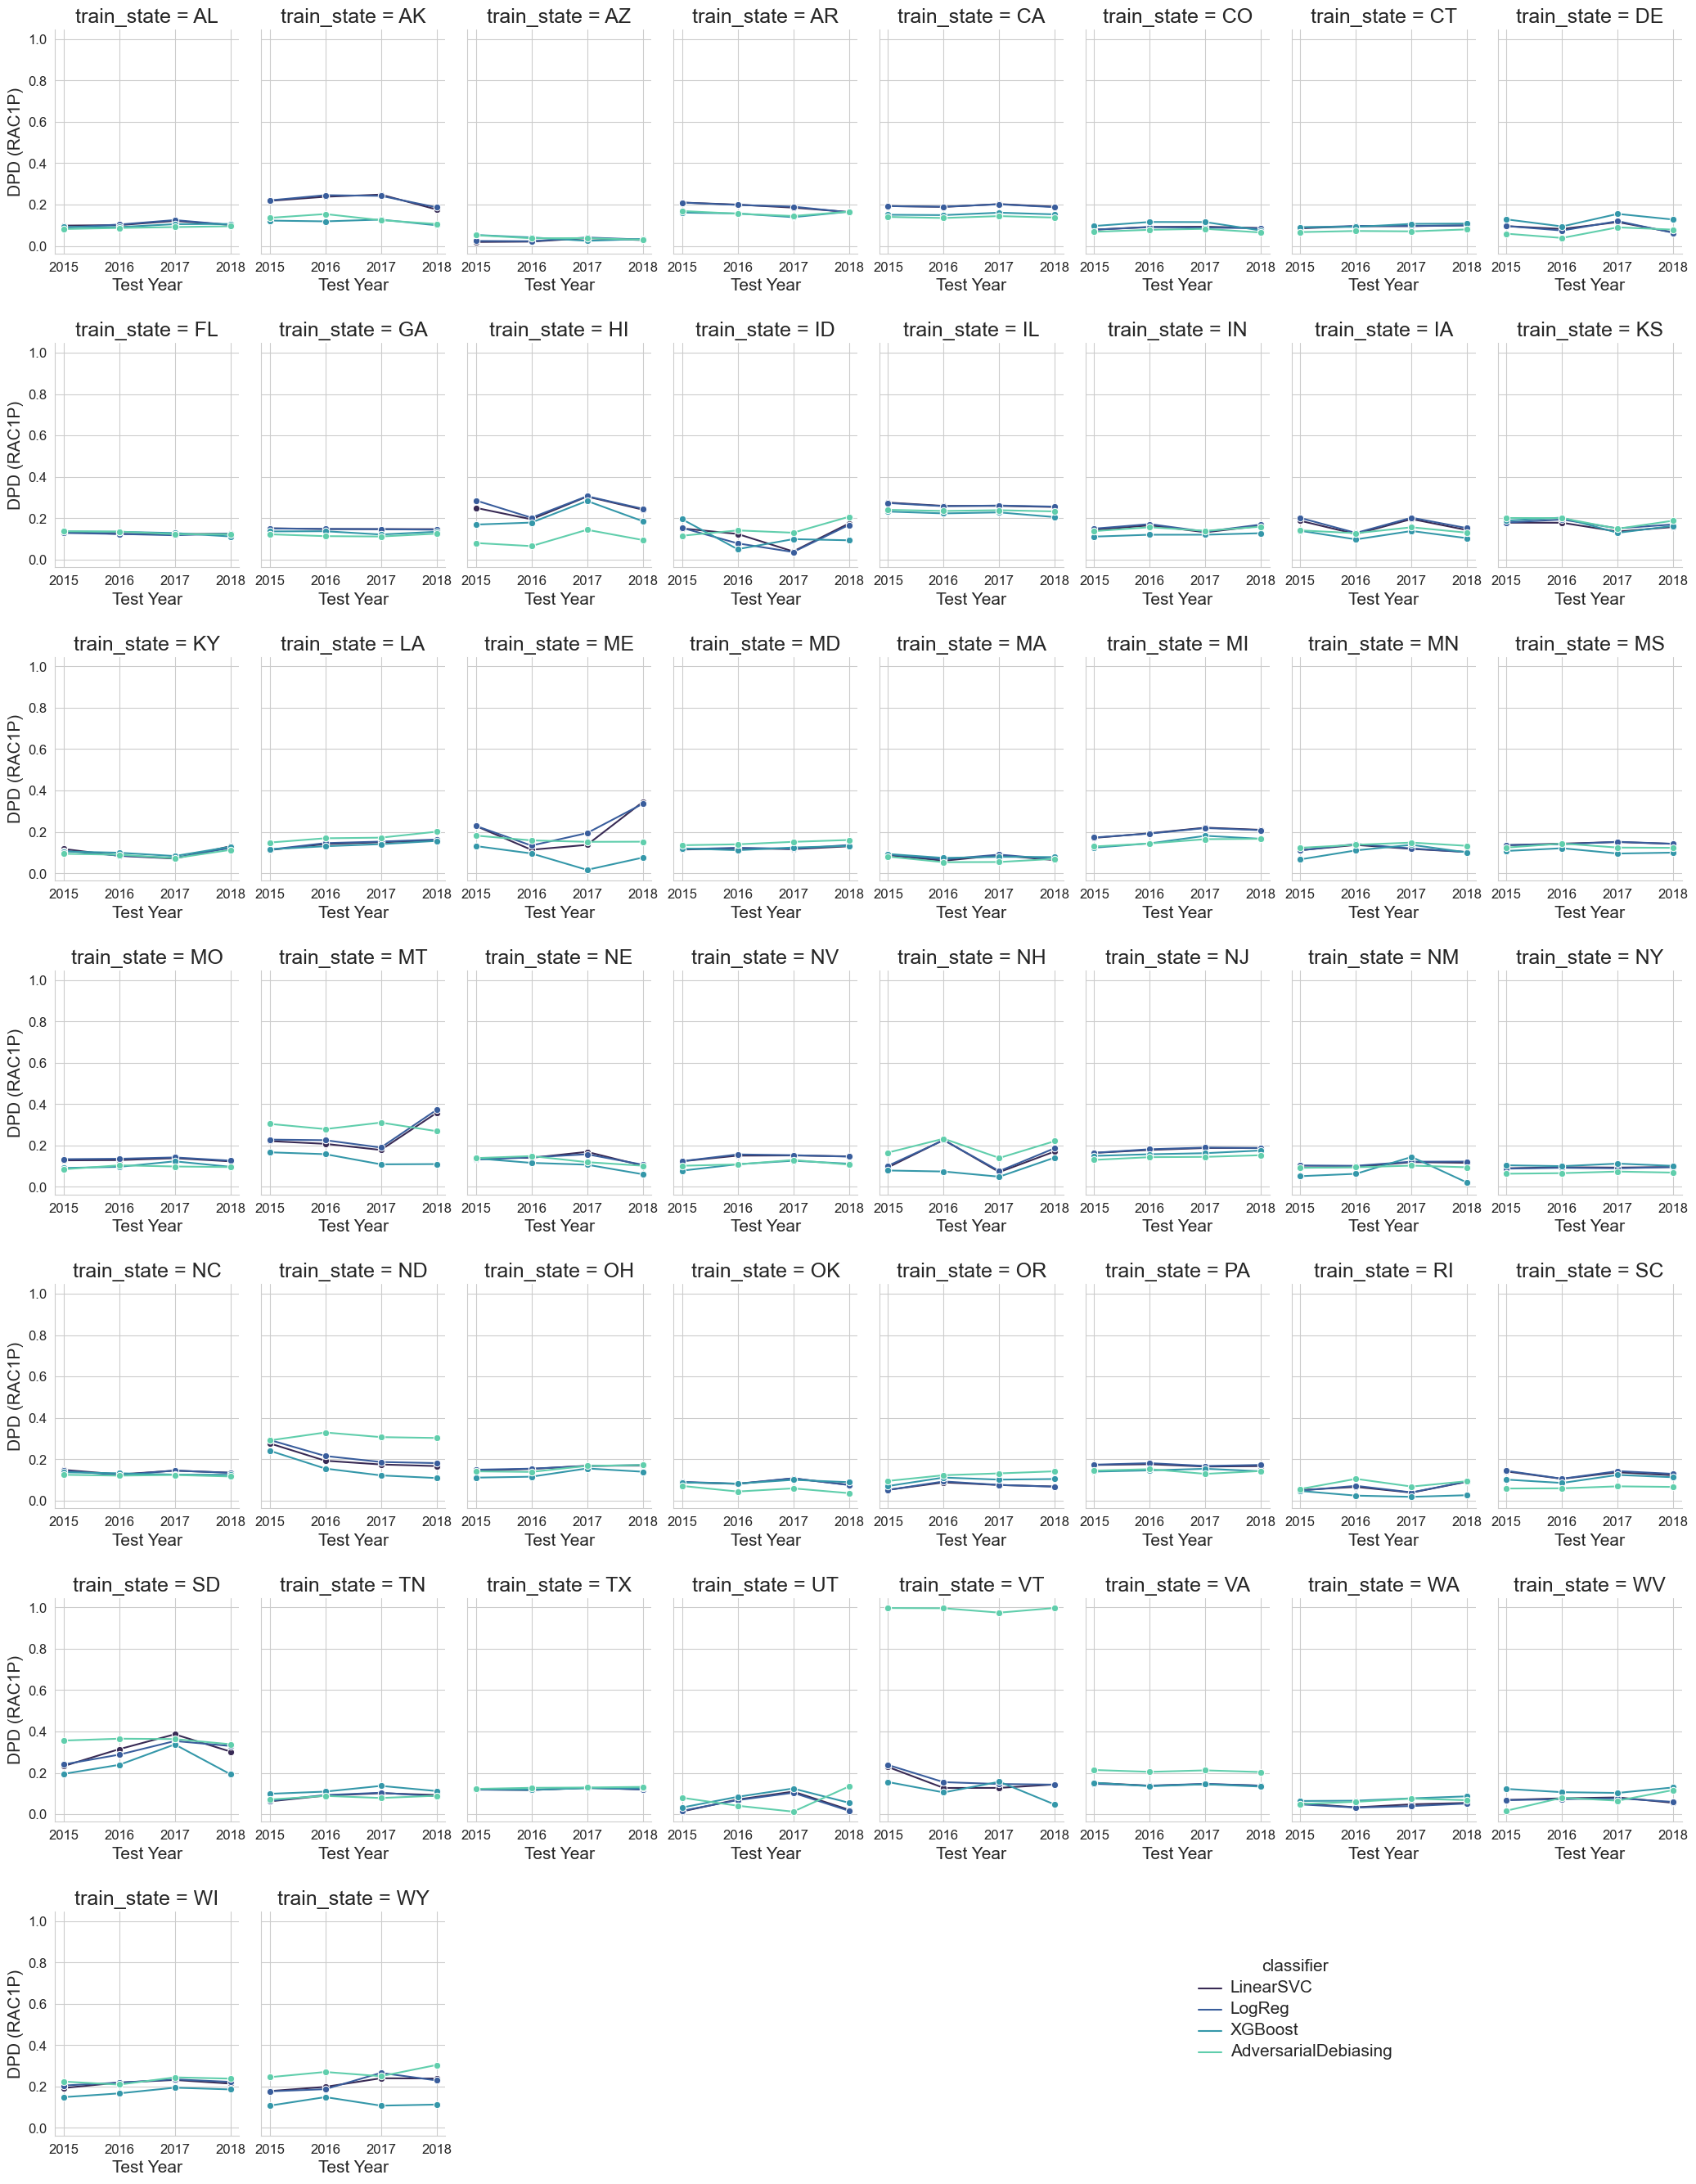

In [96]:
g = sns.relplot(data=temporal_2014_results[~temporal_2014_results['classifier'].isin
(['ExponentiatedGradientReduction'])],
                kind='line',x="year",y="rac_dpd", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='mako',
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("DPD (RAC1P)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)
#
#     group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
#     #print(group['spd_sex'].values)
#     ax.scatter([2015,2016,2017,2018],abs(group['dpd_rac'].values),s=15,marker='x',c='red')
plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_normal_dir,'temporal_2014_rac_dpd_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'temporal_2014_rac_dpd_normal.png'),format='png',dpi=300)

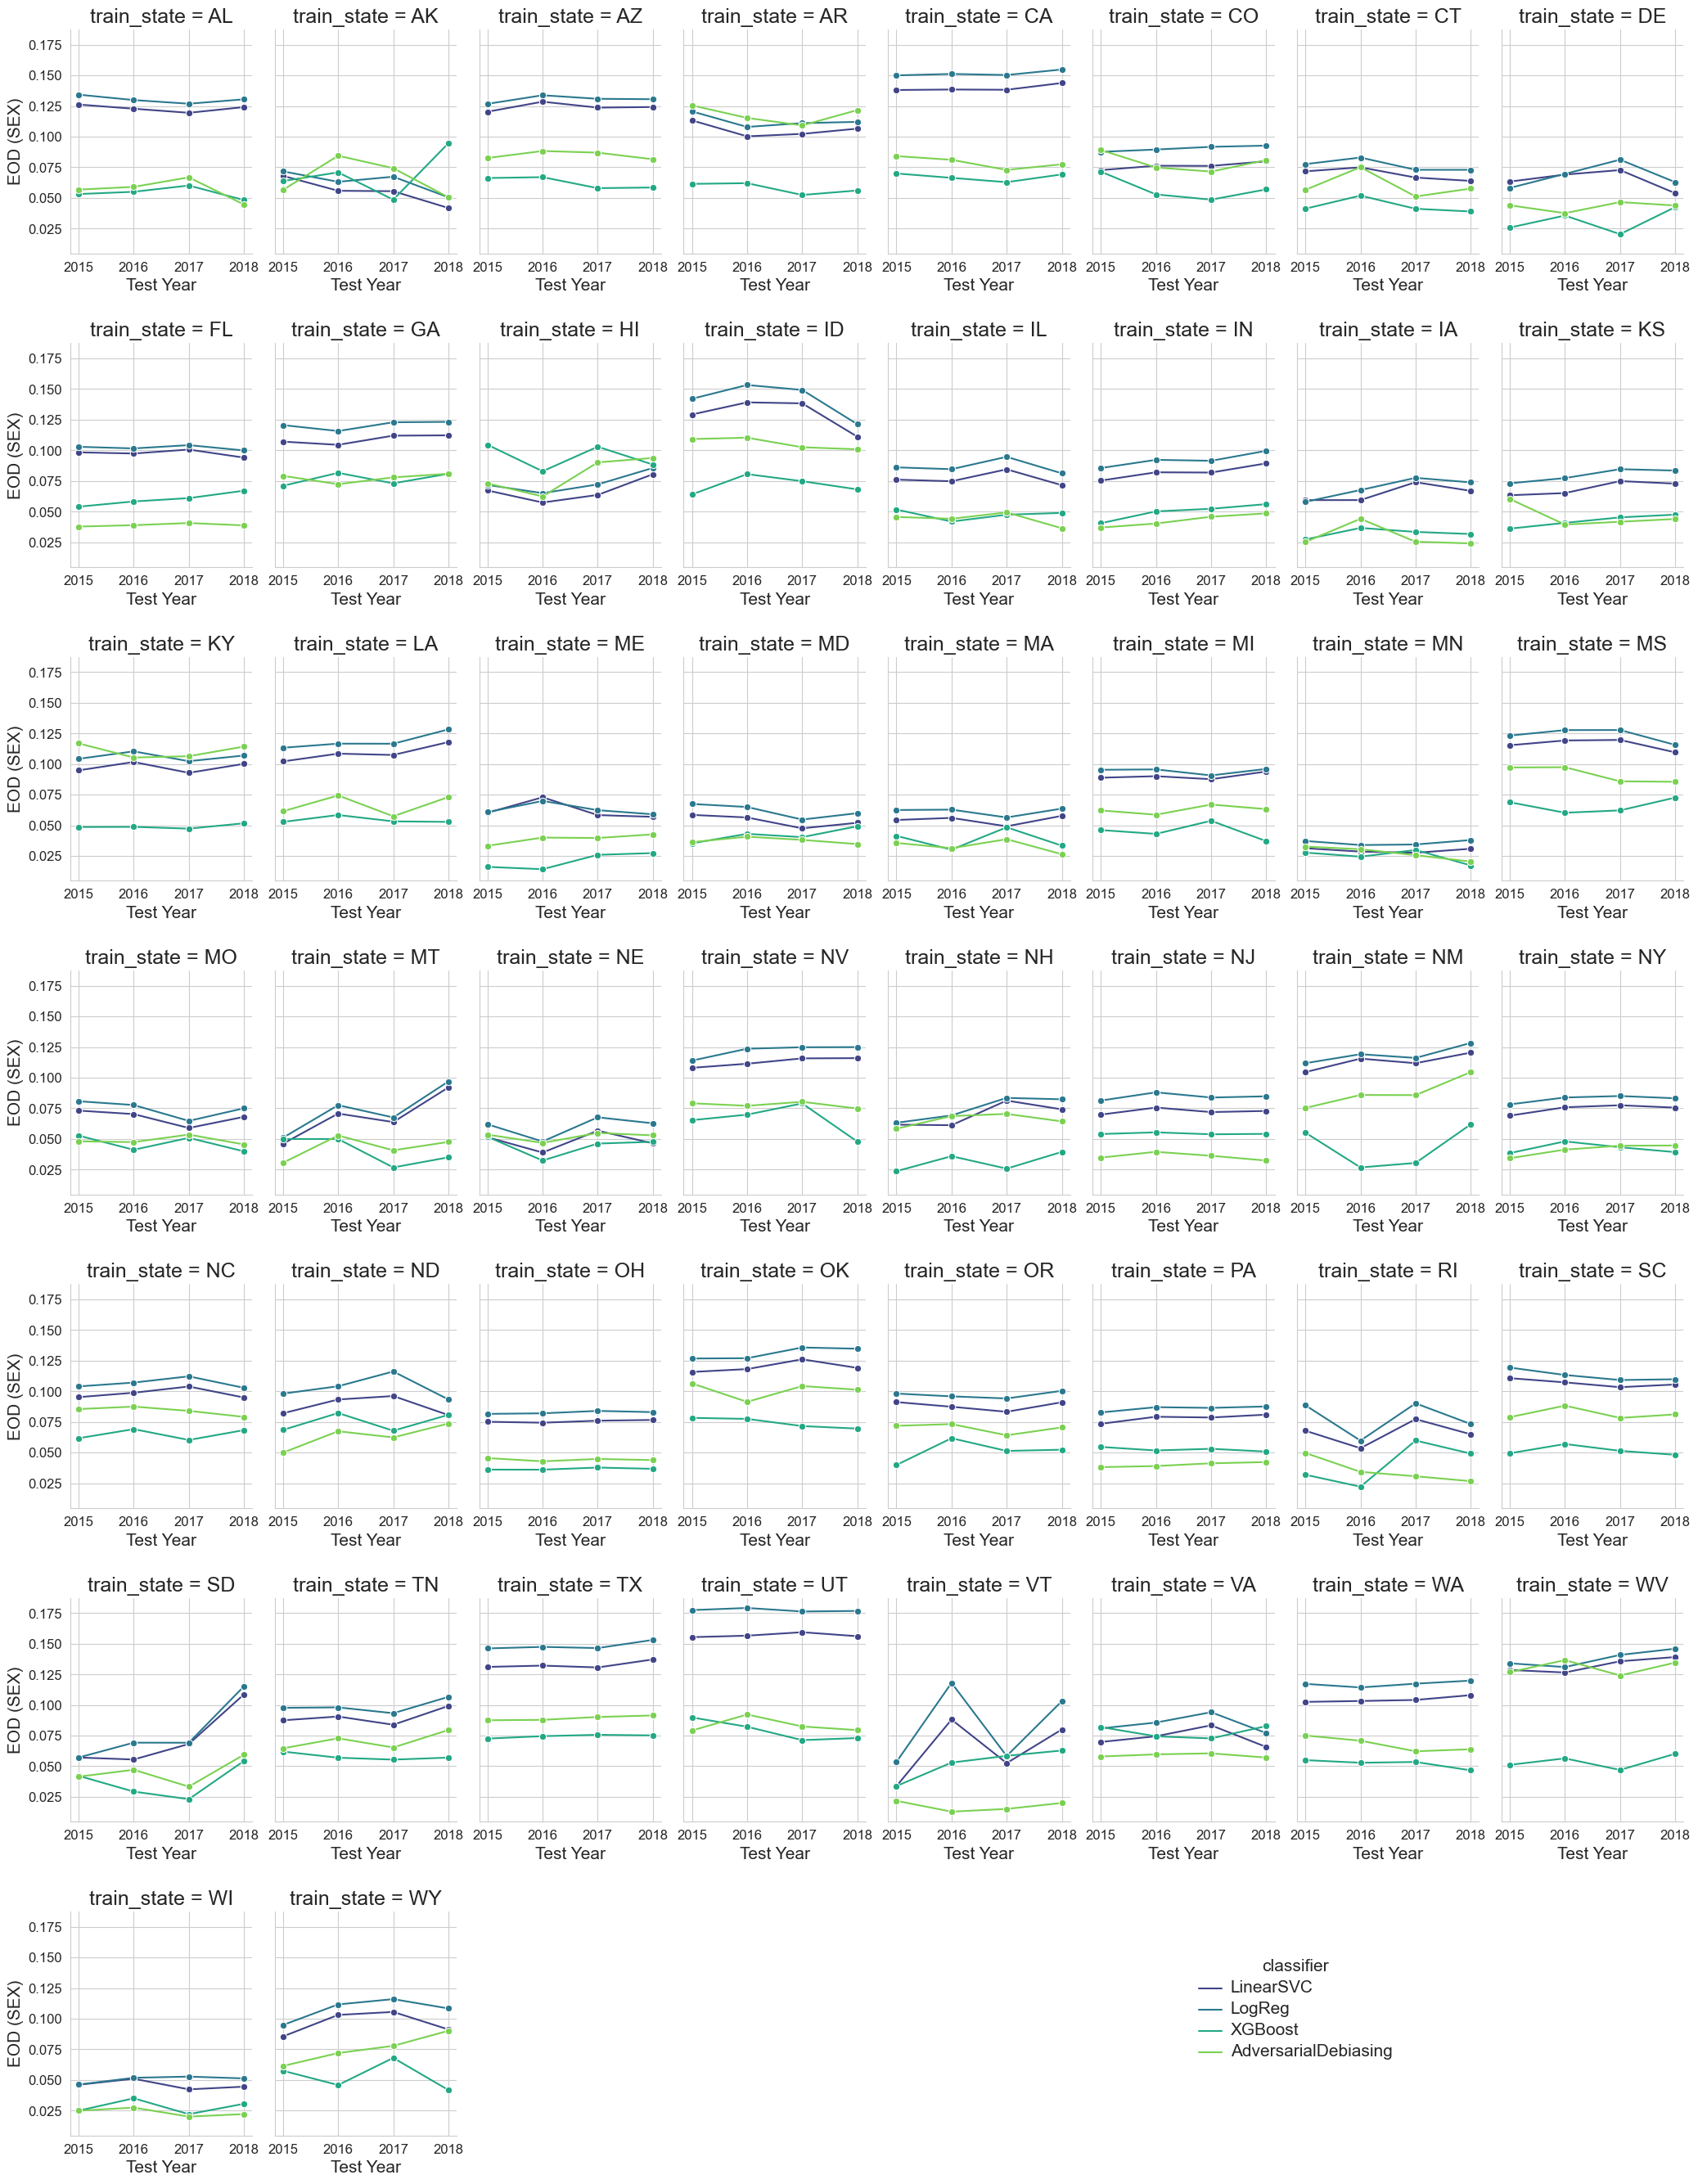

In [97]:
# EOD sex
g = sns.relplot(data=temporal_2014_results[~temporal_2014_results['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',x="year",y="sex_eod", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='viridis',
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("EOD (SEX)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['spd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_normal_dir,'temporal_2014_sex_eod_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'temporal_2014_sex_eod_normal.png'),format='png',dpi=300)

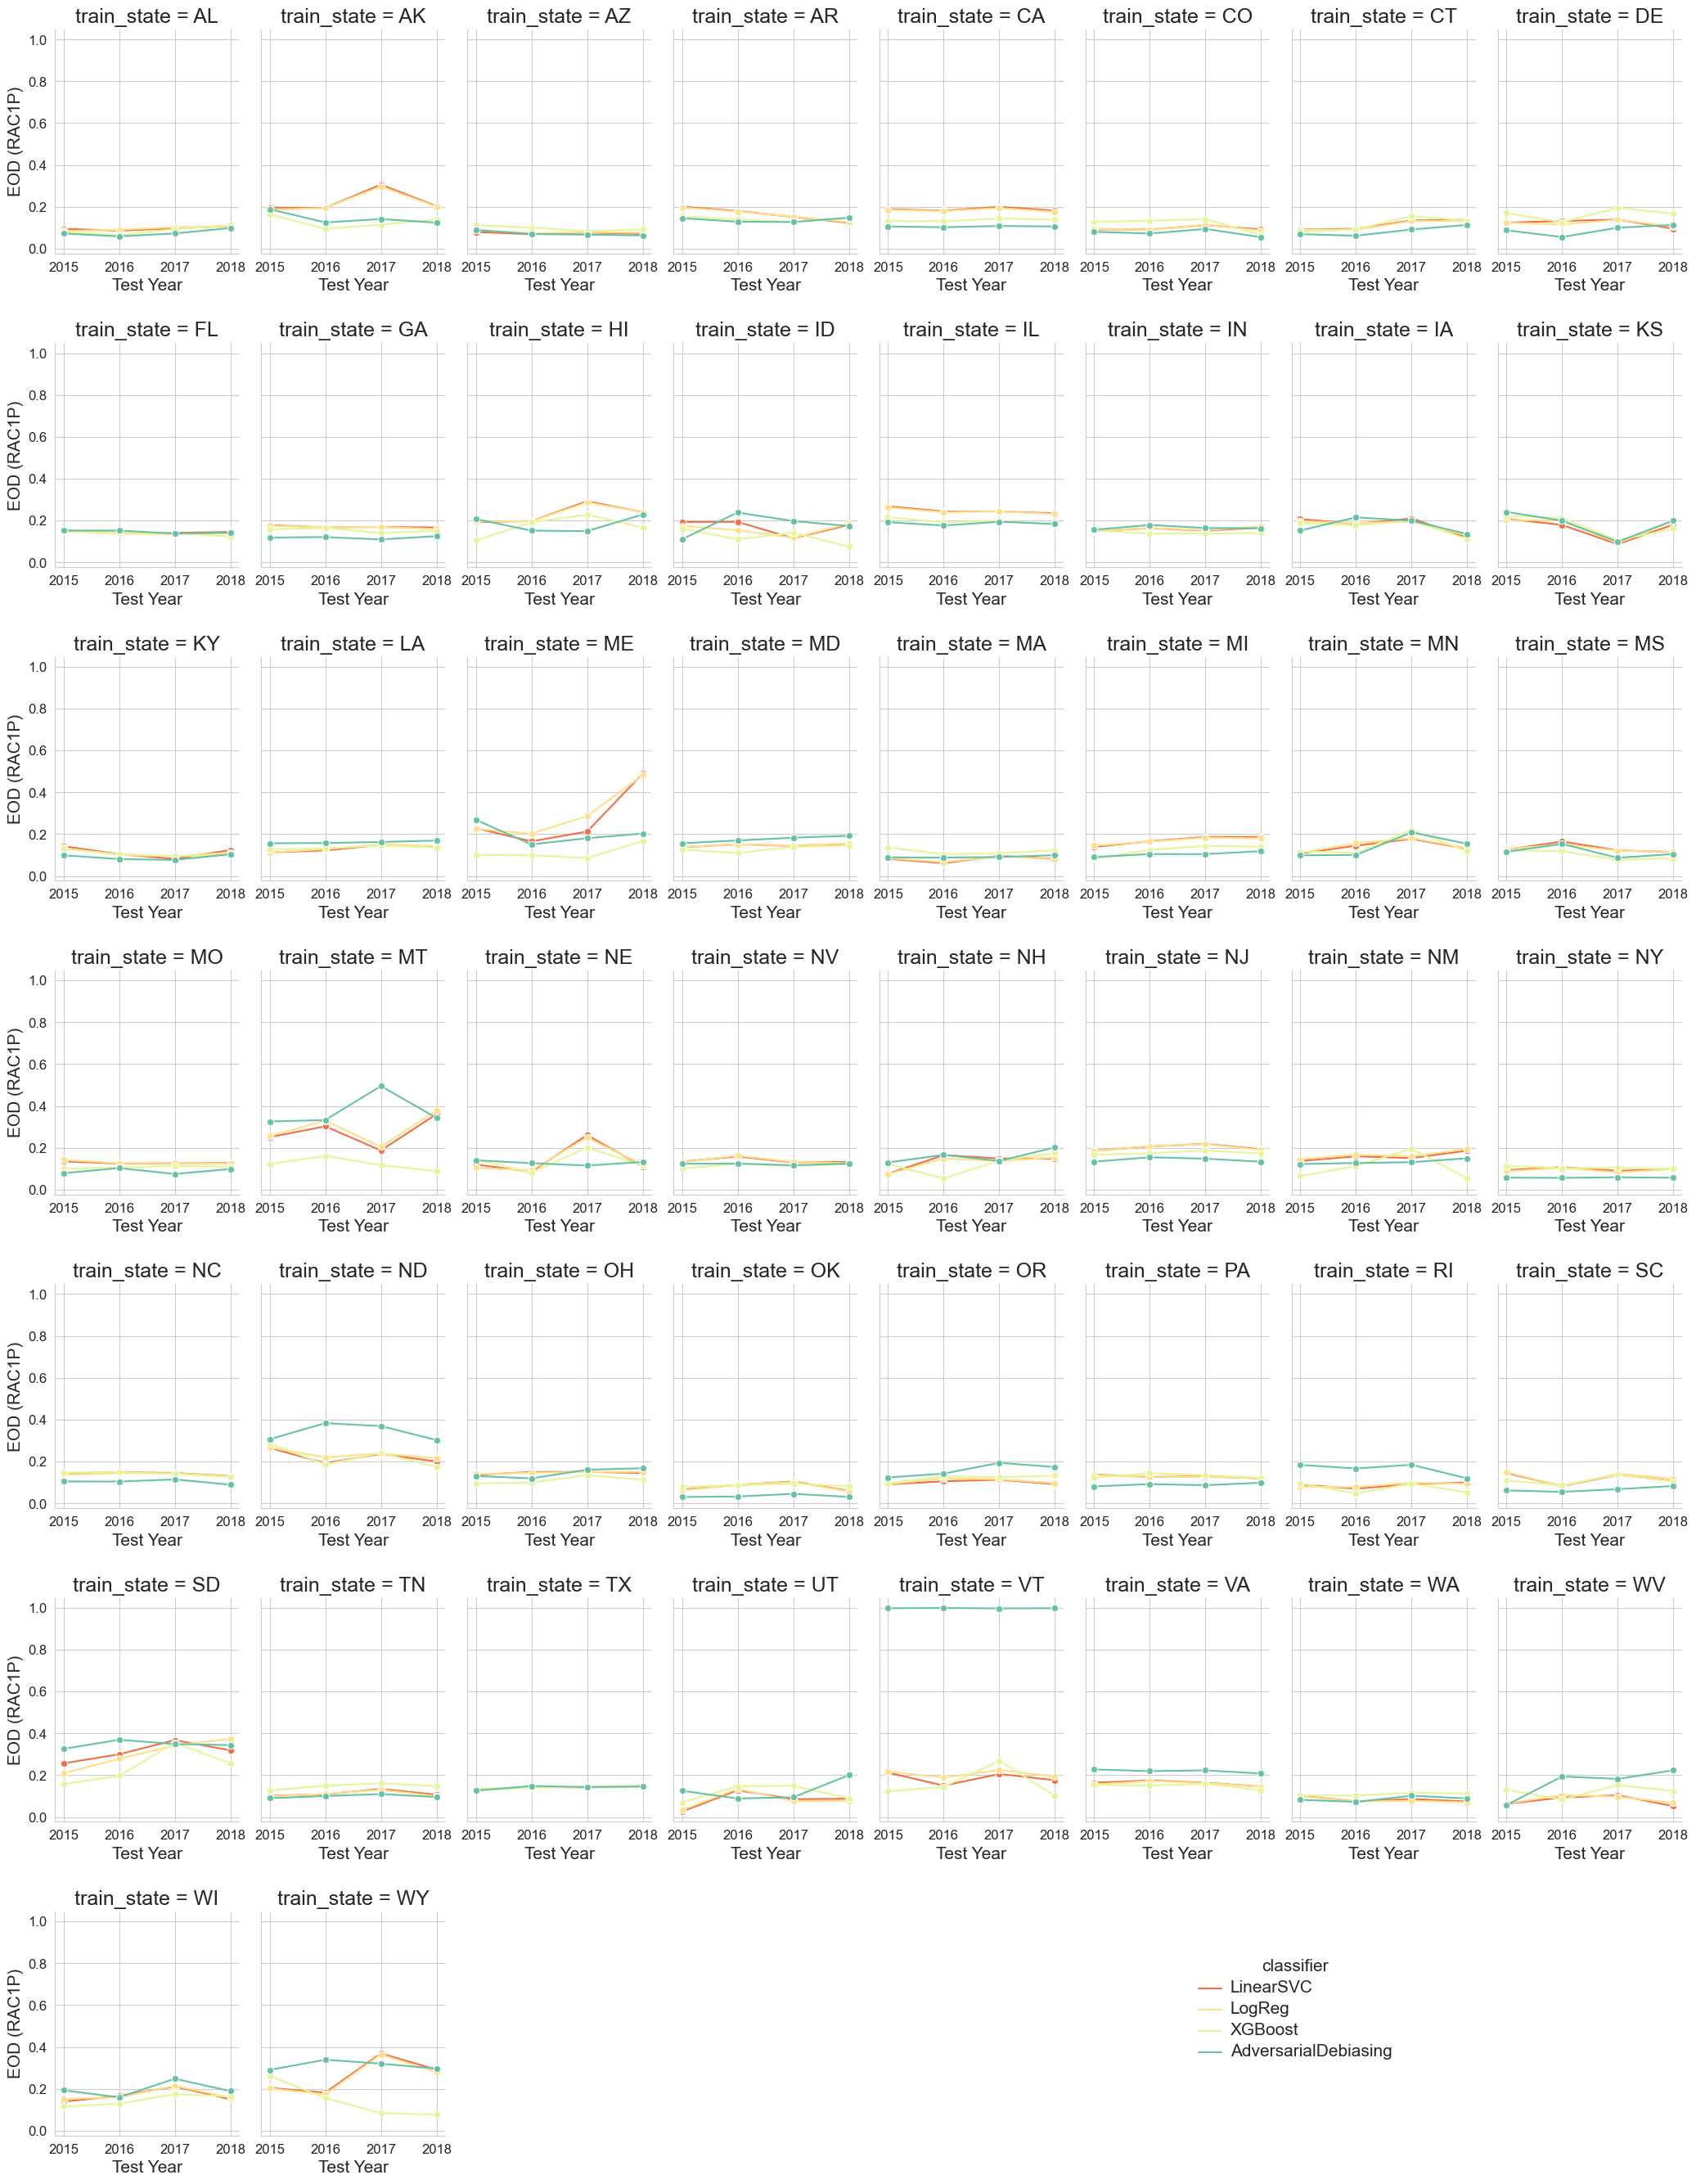

In [98]:
# EOD RAC1P
g = sns.relplot(data=temporal_2014_results[~temporal_2014_results['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',x="year",y="rac_eod", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette="Spectral",
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("EOD (RAC1P)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['spd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_normal_dir,'temporal_2014_rac_eod_normal.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_normal_dir,'temporal_2014_rac_eod_normal.png'),format='png',dpi=300)

## Temporal overall results (no sampling)

In [3]:
temporal_results= pd.read_csv(os.path.join(results_dir,"results_temporal_normal.csv"),sep=',',header=0)
temporal_results

classifier  year  train_kfold_accuracy  accuracy  \
0                          LinearSVC  2015              0.759770  0.764971   
1                          LinearSVC  2016              0.759770  0.761548   
2                          LinearSVC  2017              0.759770  0.765655   
3                          LinearSVC  2018              0.759770  0.760174   
4                             LogReg  2015              0.759604  0.764023   
...                              ...   ...                   ...       ...   
4967            AdversarialDebiasing  2017              0.752474  0.756674   
4968  ExponentiatedGradientReduction  2014              0.741797  0.729777   
4969  ExponentiatedGradientReduction  2015              0.741797  0.725971   
4970  ExponentiatedGradientReduction  2016              0.741797  0.738054   
4971  ExponentiatedGradientReduction  2017              0.741797  0.732604   

      bal_accuracy  precision    recall   sex_dpd   sex_dpr   sex_eod  \
0         0.765926   0.738858  0.794560  0.122744  0.789853  0.126238   
1         0.762046   0.740398  0.793833  0.117801  0.800210  0.122810   
2         0.766432   0.739859  0.804300  0.120635  0.797493  0.119483   
3         0.760374   0.741281  0.795033  0.135020  0.776402  0.124132   
4         0.764700   0.741797  0.785017  0.127855  0.778984  0.134298   
...            ...        ...       ...       ...       ...       ...   
4967      0.747208   0.784120  0.804128  0.016553  0.972697  0.087050   
4968      0.710301   0.755116  0.810395  0.038638  0.941502  0.020950   
4969      0.706541   0.747134  0.812019  0.027923  0.957528  0.026095   
4970      0.722308   0.751715  0.819746  0.042080  0.935703  0.023861   
4971      0.715642   0.747513  0.817636  0.055732  0.916275  0.050240   

       rac_dpd   rac_dpr train_state  train_year   rac_eod  
0     0.098245  0.821680          AL        2014  0.095059  
1     0.100583  0.817364          AL        2014  0.086215  
2     0.120889  0.786991          AL        2014  0.097168  
3     0.101641  0.819508          AL        2014  0.108752  
4     0.088877  0.833003          AL        2014  0.084648  
...        ...       ...         ...         ...       ...  
4967  0.311320  0.655324          WY        2018  0.477687  
4968  0.088686  0.878057          WY        2018  0.154259  
4969  0.115848  0.847292          WY        2018  0.364663  
4970  0.163105  0.782526          WY        2018  0.179927  
4971  0.136265  0.816338          WY        2018  0.233954  

[4972 rows x 15 columns]

In [4]:
temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby(by=['train_state',
                                                                                                       'train_year',
                                                                                                       'classifier'])\
    .size()

train_state  train_year  classifier          
AK           2014        AdversarialDebiasing    4
                         LinearSVC               4
                         LogReg                  4
                         XGBoost                 4
             2015        AdversarialDebiasing    4
                                                ..
WY           2017        XGBoost                 4
             2018        AdversarialDebiasing    4
                         LinearSVC               4
                         LogReg                  4
                         XGBoost                 4
Length: 1000, dtype: int64

In [5]:
acc_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_accuracy=('accuracy','median')).reset_index()
acc_temporal

train_year            classifier train_state  median_accuracy
0          2014  AdversarialDebiasing          AK         0.736671
1          2014  AdversarialDebiasing          AL         0.781897
2          2014  AdversarialDebiasing          AR         0.778571
3          2014  AdversarialDebiasing          AZ         0.780073
4          2014  AdversarialDebiasing          CA         0.775303
..          ...                   ...         ...              ...
995        2018               XGBoost          VT         0.777636
996        2018               XGBoost          WA         0.780075
997        2018               XGBoost          WI         0.808082
998        2018               XGBoost          WV         0.776194
999        2018               XGBoost          WY         0.761484

[1000 rows x 4 columns]

In [6]:
acc_temporal.groupby(by=['train_year','classifier']).size()

train_year  classifier          
2014        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2015        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2016        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2017        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2018        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
dtype: int64

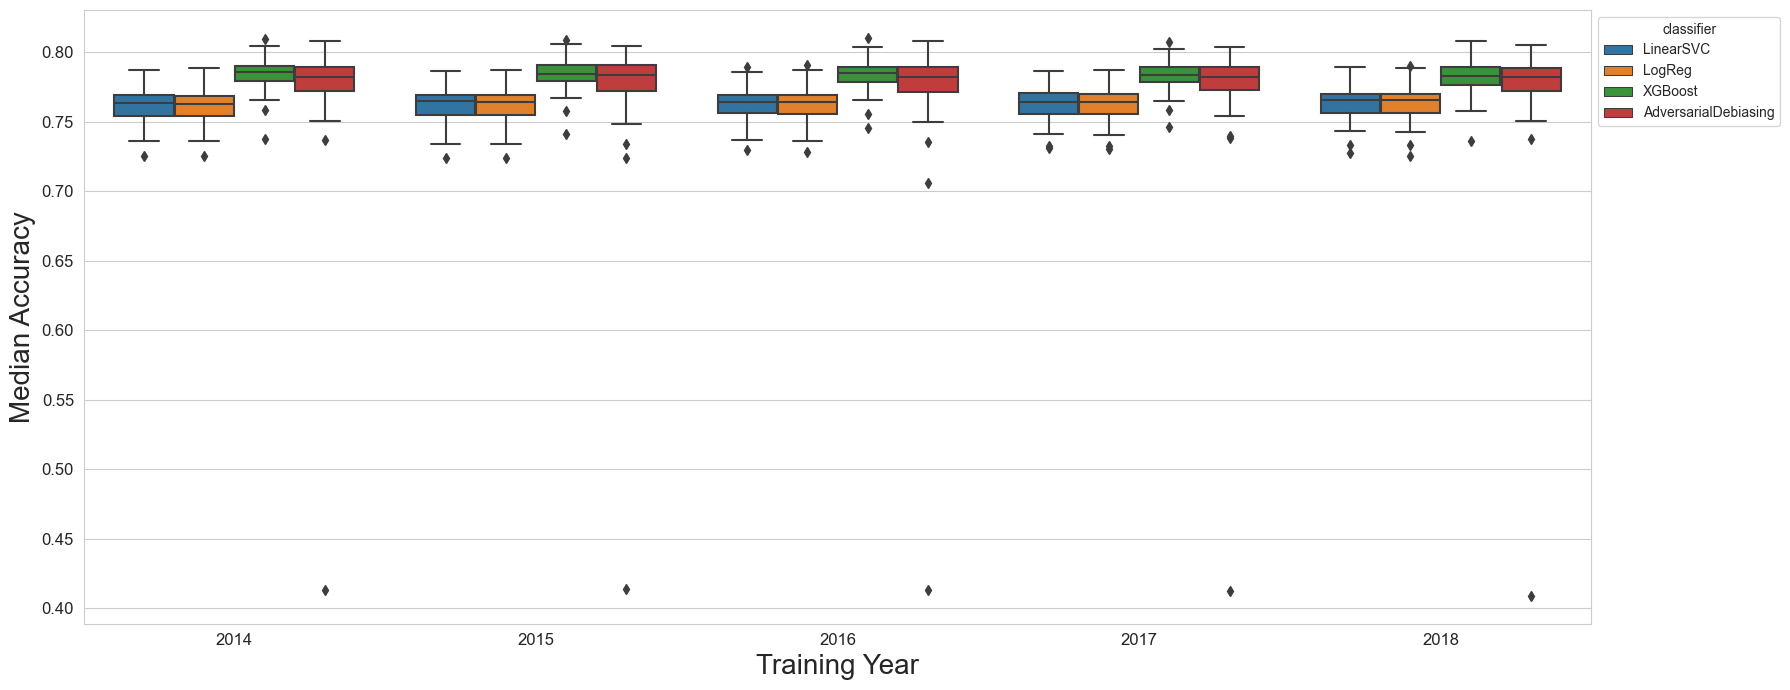

In [15]:
plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_accuracy",
                 hue="classifier",
                 data=acc_temporal,
                 hue_order=clfiers)
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median Accuracy",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_accuracy_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_accuracy_normal.png'),format='png',dpi=300)

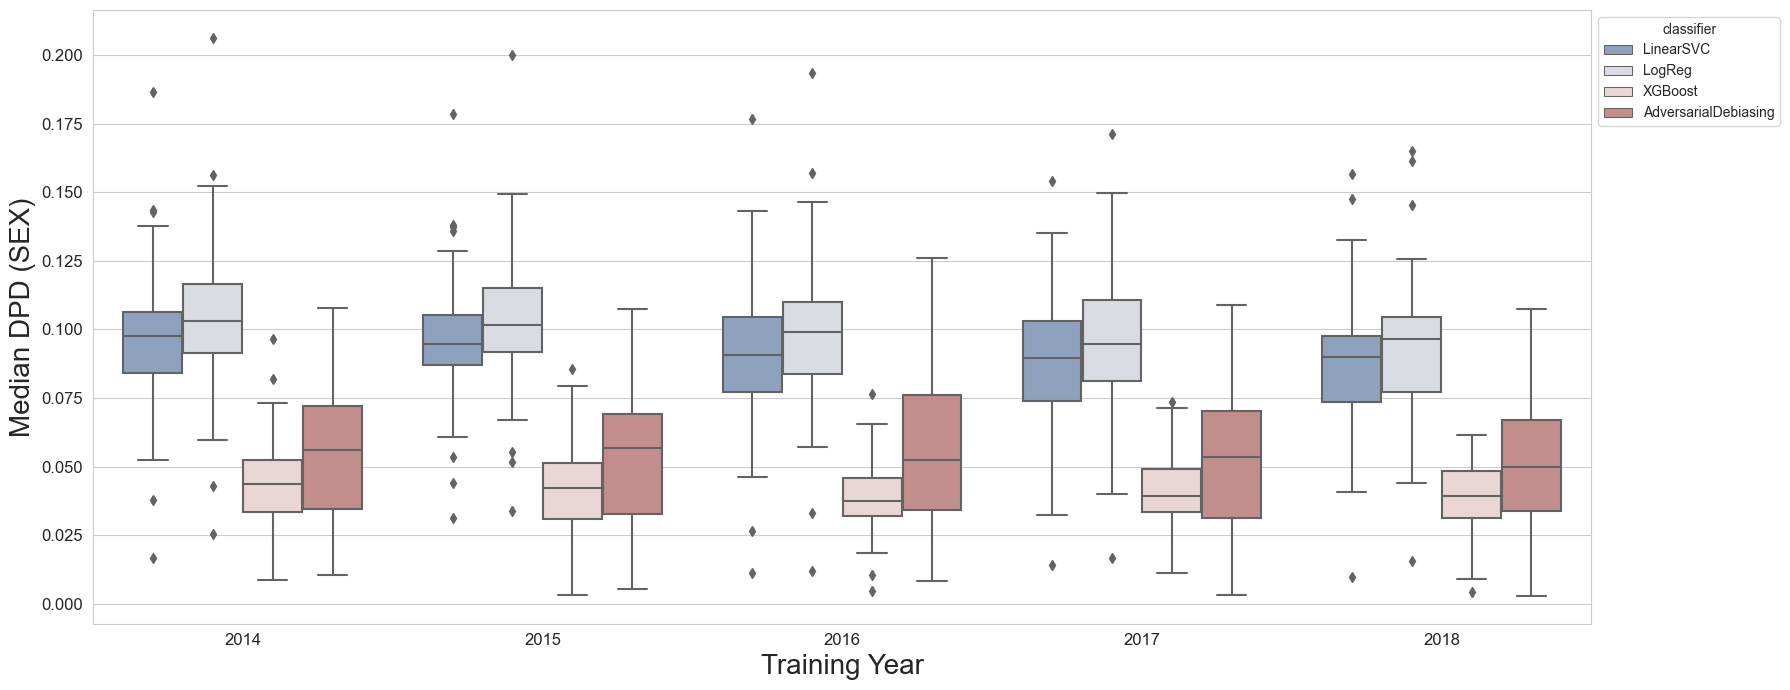

In [42]:
# median DPD SEX

sex_dpd_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_sex_dpd=('sex_dpd','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_sex_dpd",
                 hue="classifier",
                 data=sex_dpd_temporal,
                 palette="vlag",
                 hue_order=clfiers
                 )
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median DPD (SEX)",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_sex_dpd_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_sex_dpd_normal.png'),format='png',dpi=300)

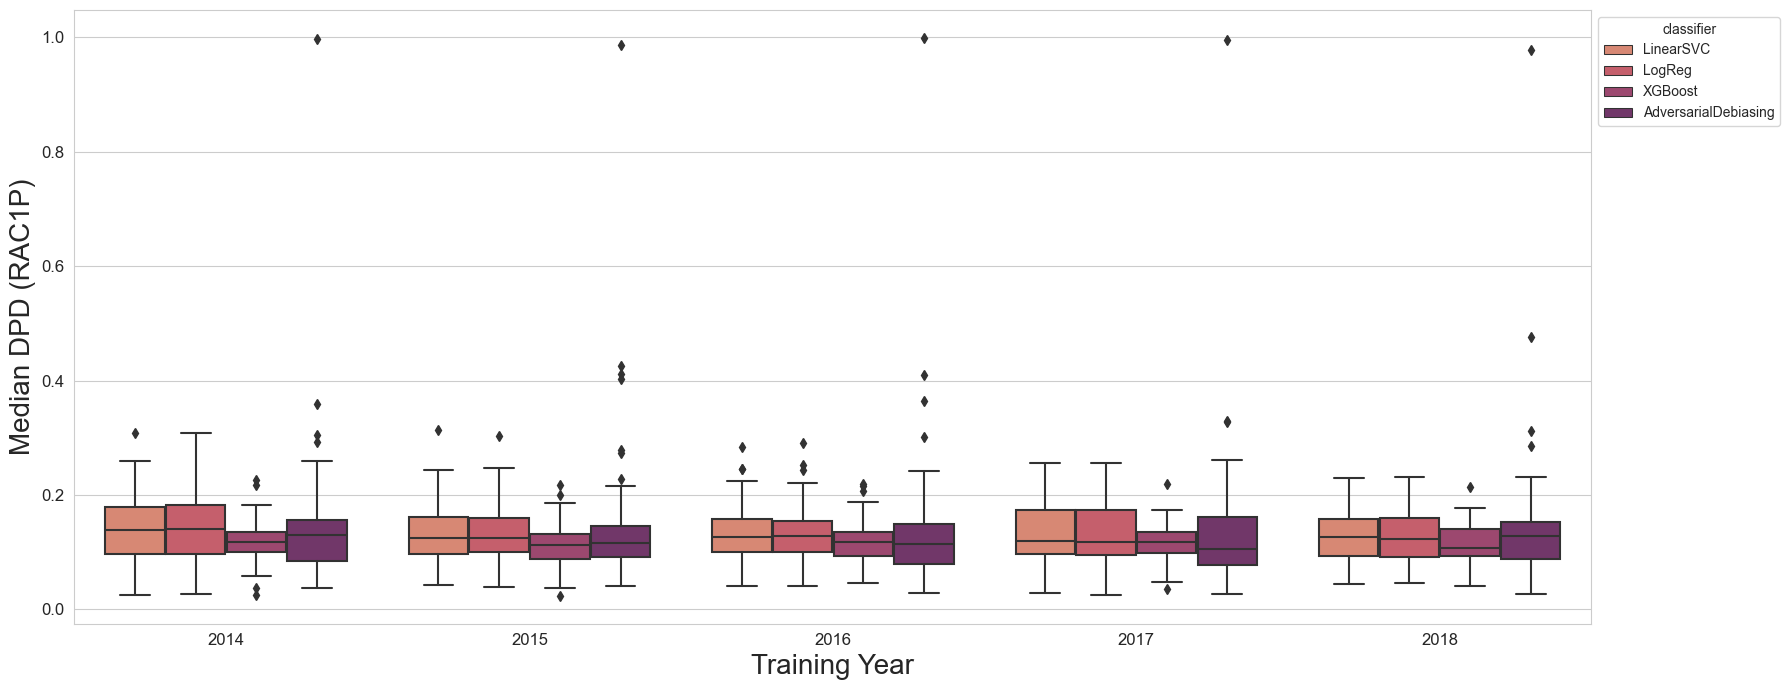

In [43]:
# median DPD RAC1P

rac_dpd_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_rac_dpd=('rac_dpd','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_rac_dpd",
                 hue="classifier",
                 data=rac_dpd_temporal,
                 palette="flare",
                 hue_order=clfiers
                 )
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median DPD (RAC1P)",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_rac_dpd_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_rac_dpd_normal.png'),format='png',dpi=300)

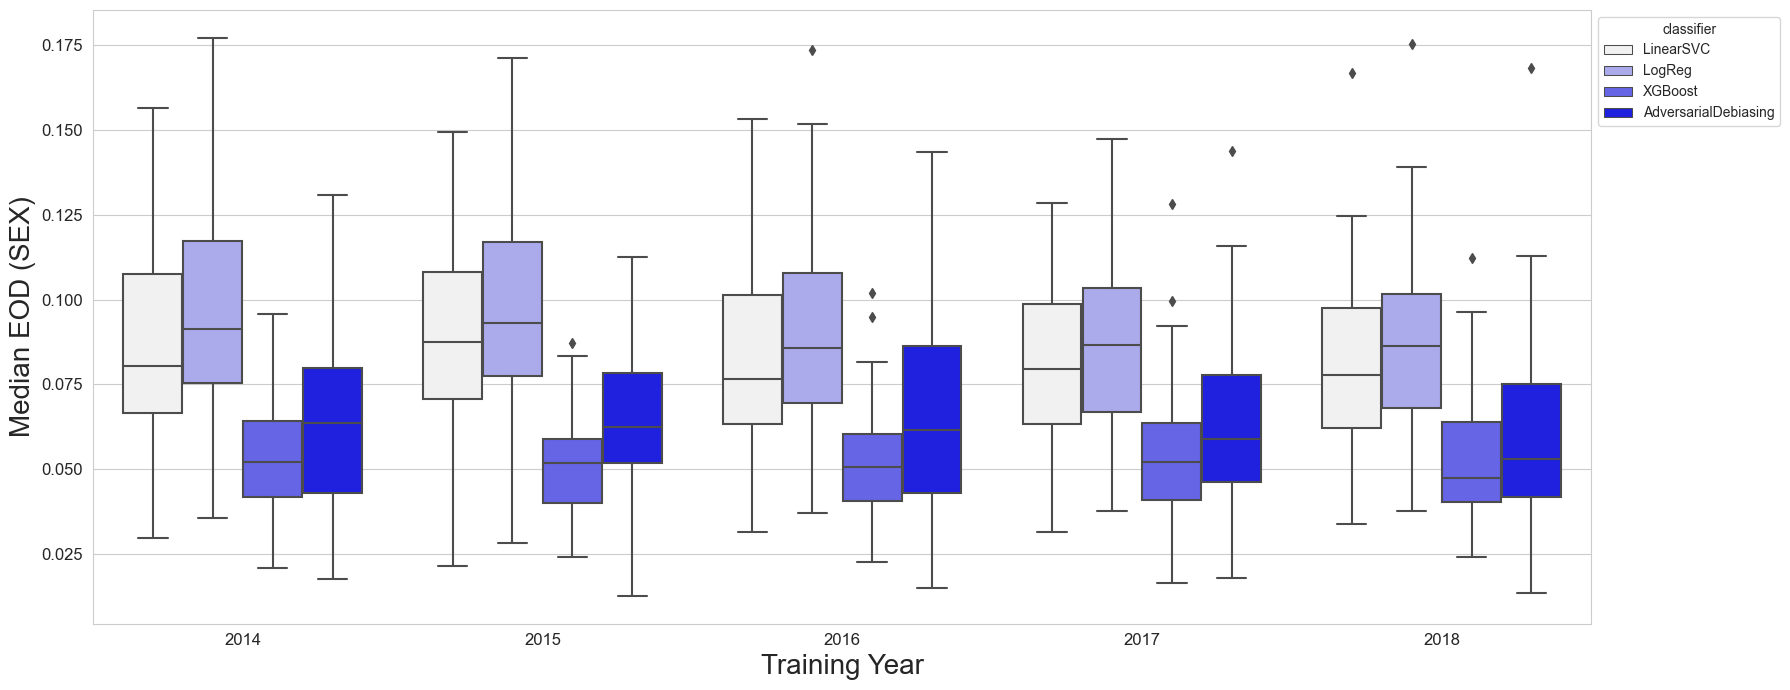

In [44]:
# median EOD SEX
sex_eod_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_sex_eod=('sex_eod','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_sex_eod",
                 hue="classifier",
                 data=sex_eod_temporal,
                 palette="light:b",
                 hue_order=clfiers
                 )
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median EOD (SEX)",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_sex_eod_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_sex_eod_normal.png'),format='png',dpi=300)

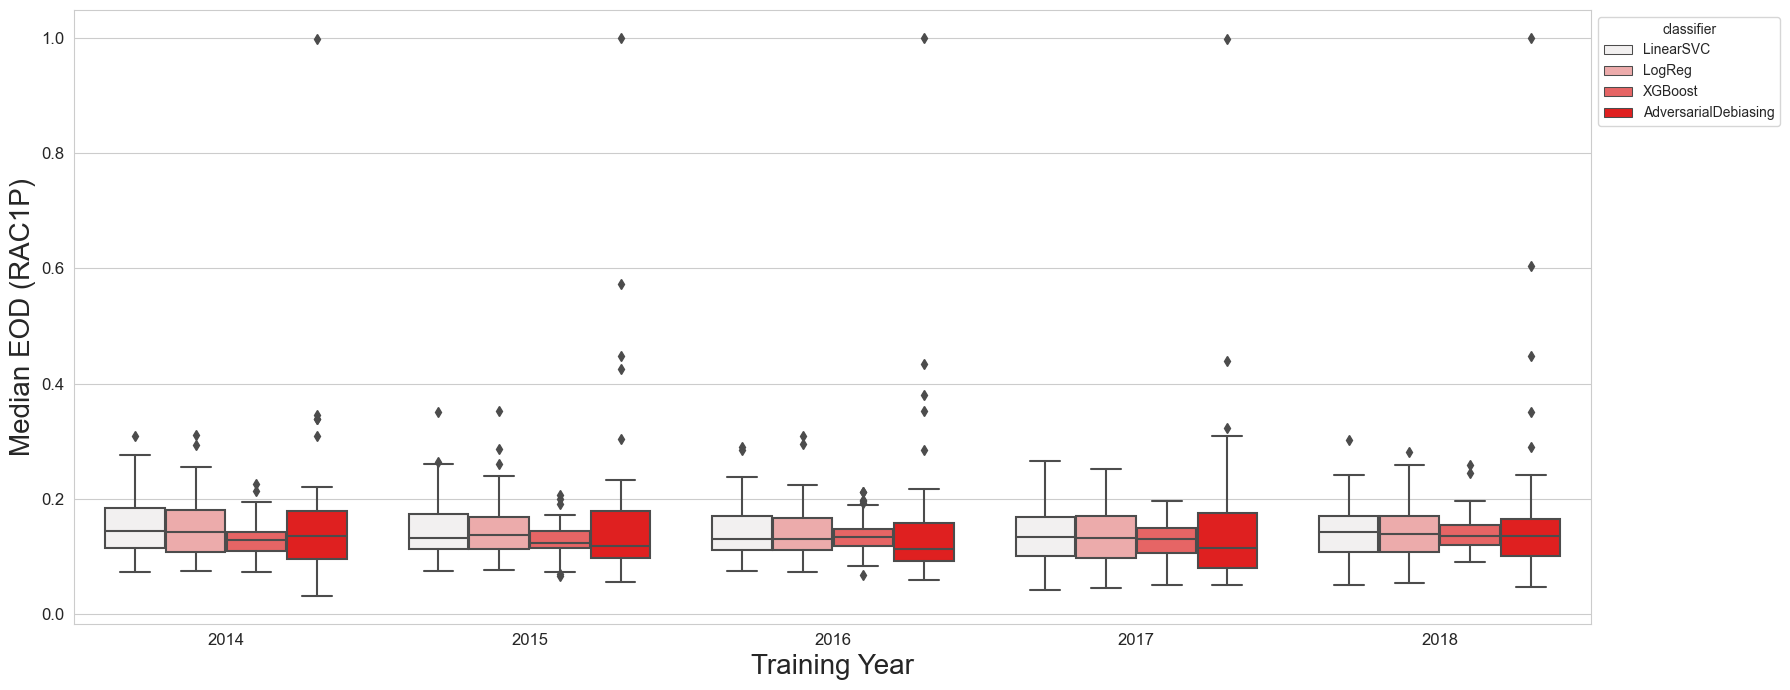

In [45]:
# median EOD RAC1P
rac_eod_temporal = temporal_results[~temporal_results['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_rac_eod=('rac_eod','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_rac_eod",
                 hue="classifier",
                 data=rac_eod_temporal,
                 palette="light:r",
                 hue_order=clfiers
                 )
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median EOD (RAC1P)",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_rac_eod_normal.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_normal_dir,'temporal_median_rac_eod_normal.png'),format='png',dpi=300)

# SAMPLING RESULTS NOW

## Spatial results (sampling)

In [20]:
spatial_results_sampled = pd.read_csv(os.path.join(results_dir,'spatial_results_sampling.csv'),sep=',',header=0)
spatial_results_sampled

year state            classifier  median_accuracy  median_sex_dpd  \
0    2014    AL                LogReg         0.737066        0.031070   
1    2014    AK                LogReg         0.723820        0.034816   
2    2014    AZ                LogReg         0.740682        0.015491   
3    2014    AR                LogReg         0.739956        0.007718   
4    2014    CA                LogReg         0.736713        0.030000   
..    ...   ...                   ...              ...             ...   
995  2018    VA  AdversarialDebiasing         0.773652        0.020380   
996  2018    WA  AdversarialDebiasing         0.774313        0.021934   
997  2018    WV  AdversarialDebiasing         0.769585        0.010183   
998  2018    WI  AdversarialDebiasing         0.771496        0.006106   
999  2018    WY  AdversarialDebiasing         0.756761        0.004001   

     median_sex_dpr  median_sex_eod  median_rac_dpd  median_rac_dpr  \
0          0.948510        0.068406        0.049848        0.919597   
1          0.944799        0.070762        0.095830        0.852233   
2          0.972044        0.061296        0.074674        0.871070   
3          0.986261        0.056030        0.122186        0.795694   
4          0.947607        0.076924        0.097244        0.840441   
..              ...             ...             ...             ...   
995        0.965827        0.075215        0.065115        0.892431   
996        0.962721        0.076634        0.076225        0.874007   
997        0.980721        0.067724        0.074039        0.872814   
998        0.989046        0.061103        0.083040        0.862905   
999        0.992465        0.057872        0.083206        0.858685   

     median_rac_eod  
0          0.080800  
1          0.123962  
2          0.111931  
3          0.132192  
4          0.128337  
..              ...  
995        0.087637  
996        0.102167  
997        0.089792  
998        0.110402  
999        0.095186  

[1000 rows x 10 columns]

In [21]:
spatial_results_sampled.groupby(by=['year','classifier']).agg(state_count=('state','count'))

state_count
year classifier                       
2014 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2015 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2016 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2017 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50
2018 AdversarialDebiasing           50
     LinearSVC                      50
     LogReg                         50
     XGBoost                        50

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

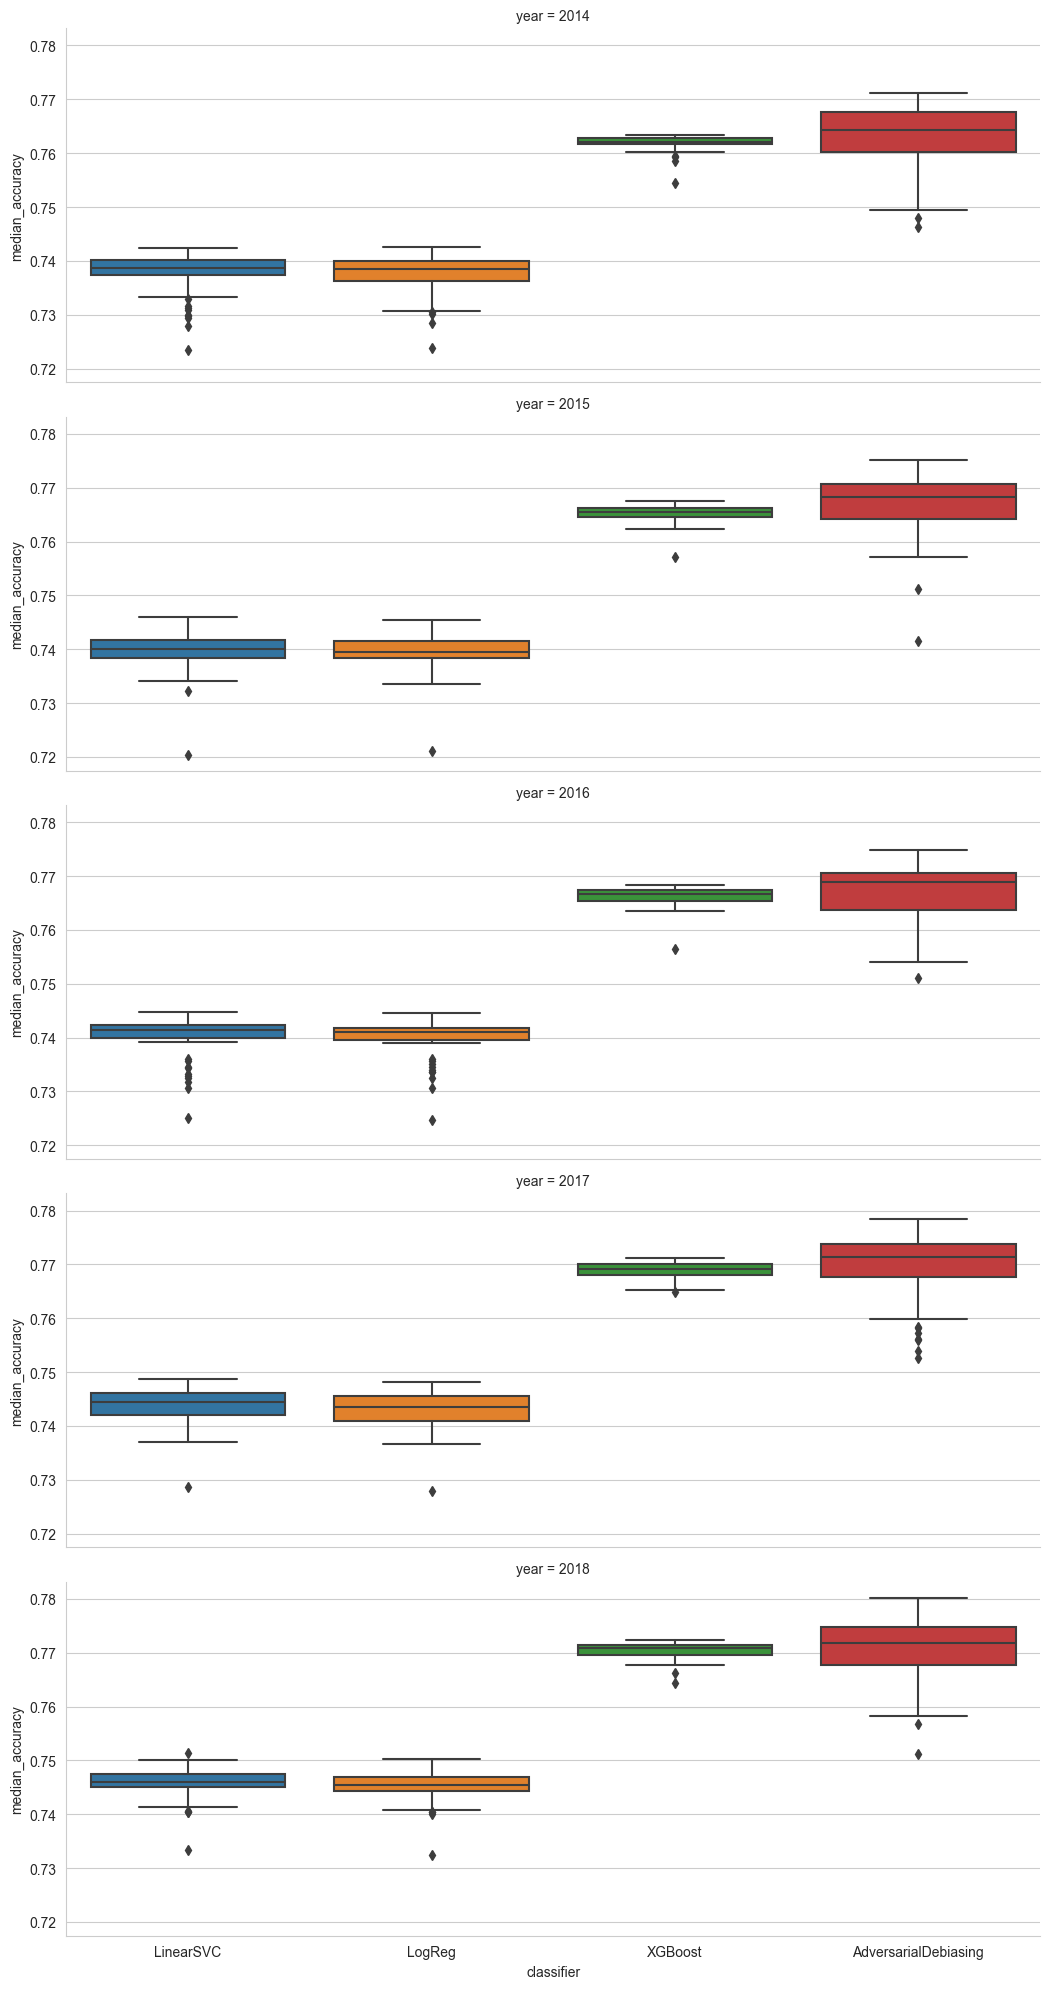

In [22]:
# median accuracy

clfiers = ['LinearSVC','LogReg','XGBoost','AdversarialDebiasing']

g = sns.catplot(data=spatial_results_sampled, x="classifier", y="median_accuracy", kind="box", order=clfiers,
                row='year',
                height=4, aspect=2.65)
g.axes.set_xlabel("Classifier",fontsize=15,visible=True)
g.axes.set_ylabel("Median Accuracy",fontsize=15)
g.axes.tick_params(labelsize=15)


plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'median_accuracy_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_accuracy_sampling.png'),format='png',dpi=300)

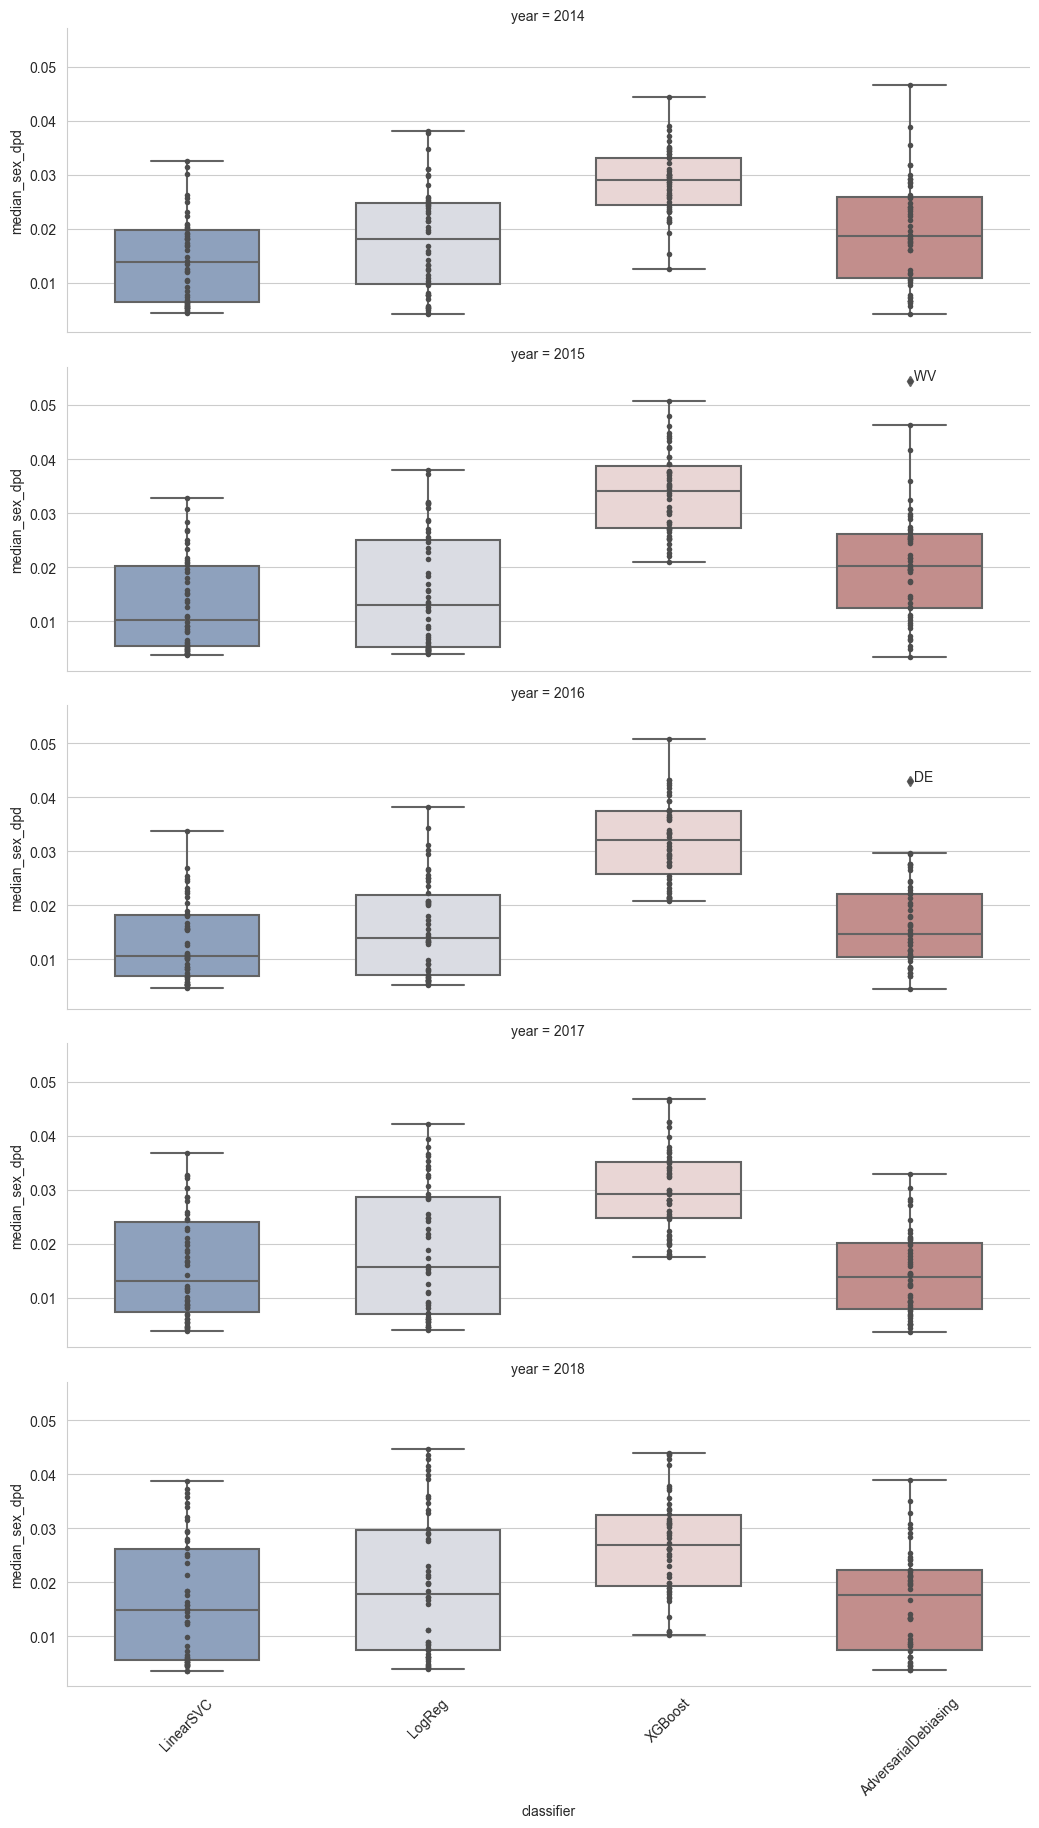

In [23]:
# median DPD SEX
from matplotlib.cbook import boxplot_stats
clfiers_coord={"LogReg":0,'LinearSVC':1,'XGBoost':2,'AdversarialDebiasing':3}

g = sns.FacetGrid(spatial_results_sampled, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_sex_dpd", width=.6, order=clfiers, palette="vlag")
g.map(sns.stripplot,"classifier", "median_sex_dpd", size=4, order=clfiers, color=".3",jitter=False, linewidth=0)

for axes in g.axes.flat:
    _ = axes.set_xticklabels(clfiers, rotation=45)

for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results_sampled["classifier"]):
        group = spatial_results_sampled.loc[(spatial_results_sampled["year"] == row) & (spatial_results_sampled["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_dpd"])[0]["fliers"]
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_dpd"], group["state"]):
                if m in fliers:
                    ax.annotate(f' {s}', xy=(clfiers_coord[c], m))

g.savefig(os.path.join(figures_sampling_dir,'median_sex_dpd_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_sex_dpd_sampling.png'),format='png',dpi=300)

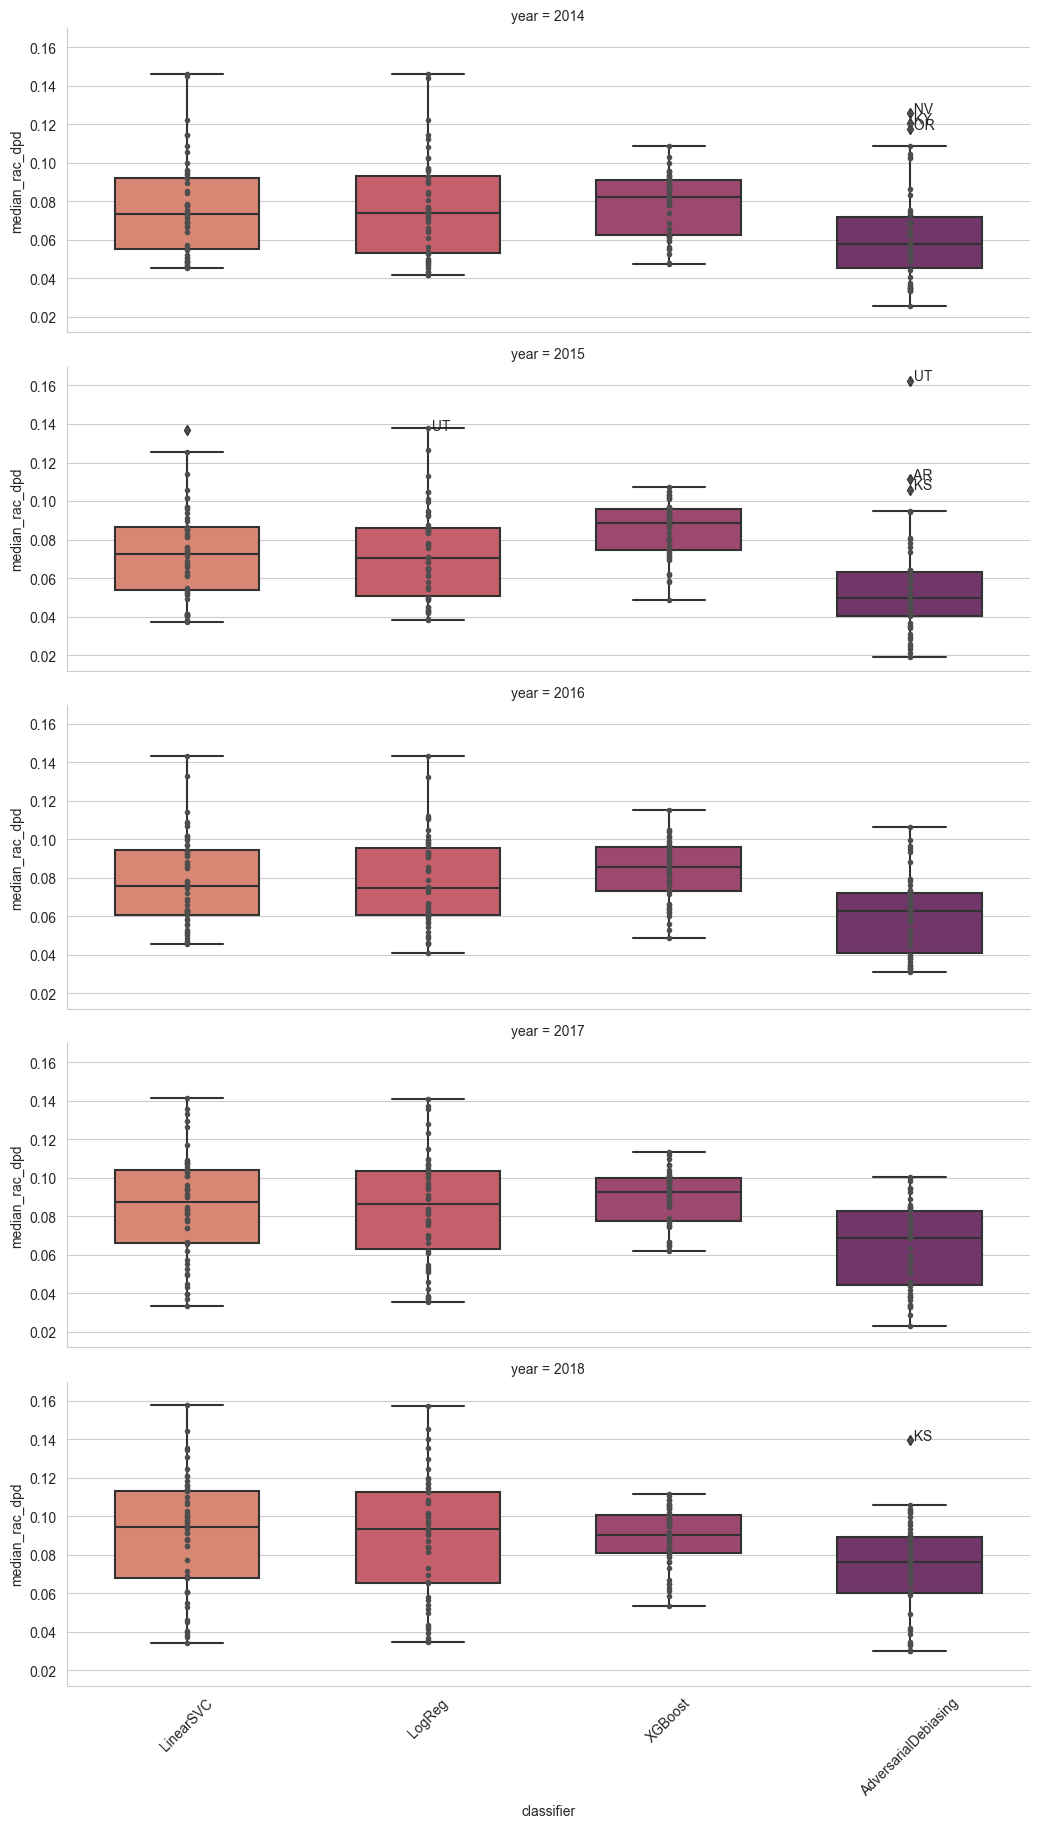

In [24]:
g = sns.FacetGrid(spatial_results_sampled, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_rac_dpd", width=.6, order=clfiers, palette="flare")
g.map(sns.stripplot,"classifier", "median_rac_dpd", size=4, order=clfiers, color=".3",jitter=False, linewidth=0)

for axes in g.axes.flat:
    _ = axes.set_xticklabels(clfiers, rotation=45)

for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results_sampled["classifier"]):
        group = spatial_results_sampled.loc[(spatial_results_sampled["year"] == row) & (spatial_results_sampled["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_dpd"])[0]["fliers"]
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_dpd"], group["state"]):
                if m in fliers:
                    ax.annotate(f' {s}', xy=(clfiers_coord[c], m))

g.savefig(os.path.join(figures_sampling_dir,'median_rac_dpd_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_rac_dpd_sampling.png'),format='png',dpi=300)

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



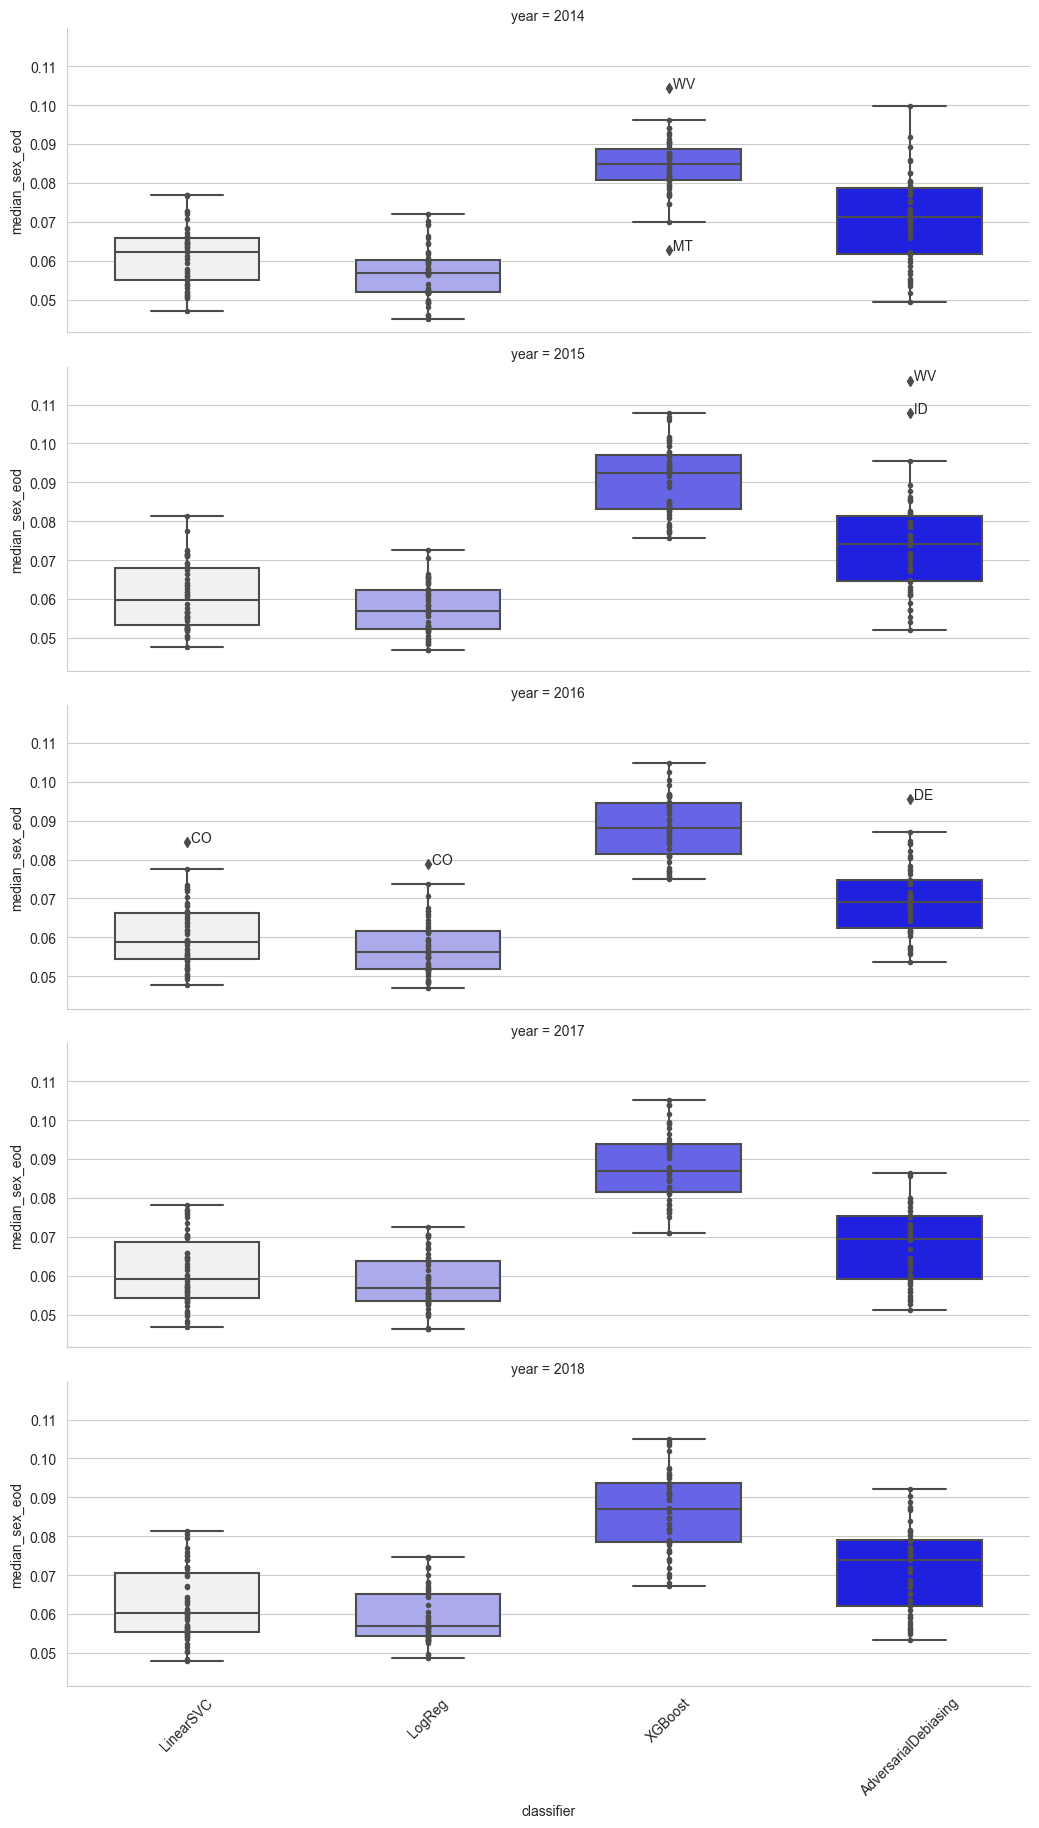

In [25]:
g = sns.FacetGrid(spatial_results_sampled, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_sex_eod", width=.6, palette="light:b")
g.map(sns.stripplot,"classifier", "median_sex_eod", size=4, color=".3",jitter=False, linewidth=0)

for axes in g.axes.flat:
    _ = axes.set_xticklabels(clfiers, rotation=45)

for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results_sampled["classifier"]):
        group = spatial_results_sampled.loc[(spatial_results_sampled["year"] == row) & (spatial_results_sampled["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_sex_eod"])[0]["fliers"]
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_sex_eod"], group["state"]):
                if m in fliers:
                    ax.annotate(f' {s}', xy=(clfiers_coord[c], m))

g.savefig(os.path.join(figures_sampling_dir,'median_sex_eod_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_sex_eod_sampling.png'),format='png',dpi=300)

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\sarab\Desktop\Data_Science_MSc\master_thesis\fair_ml_thesis\venv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



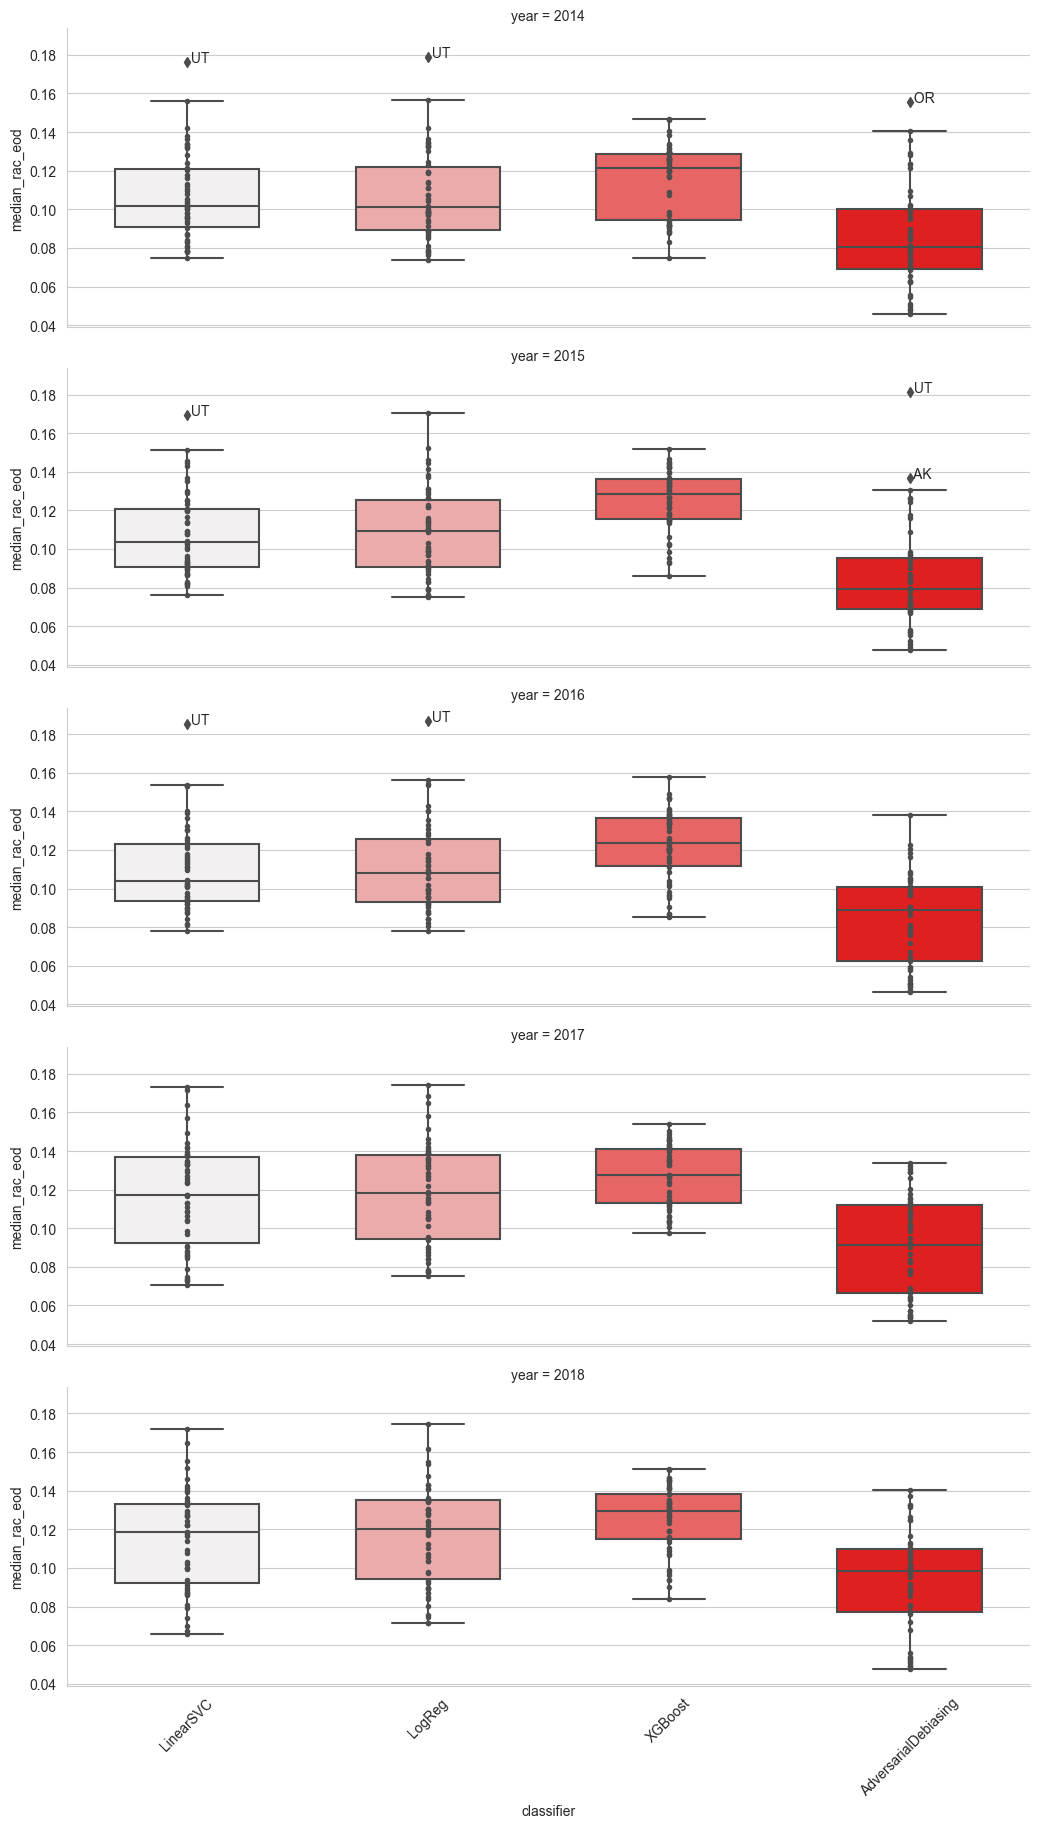

In [26]:
g = sns.FacetGrid(spatial_results_sampled, row="year",height=3.5, aspect=3)
g.map(sns.boxplot,"classifier", "median_rac_eod", width=.6, palette="light:r")
g.map(sns.stripplot,"classifier", "median_rac_eod", size=4, color=".3", jitter=False, linewidth=0)

for axes in g.axes.flat:
    _ = axes.set_xticklabels(clfiers, rotation=45)

for row, ax in g.axes_dict.items():
    for clf in np.unique(spatial_results_sampled["classifier"]):
        group = spatial_results_sampled.loc[(spatial_results_sampled["year"] == row) & (spatial_results_sampled["classifier"] == clf), :]
        fliers = boxplot_stats(group["median_rac_eod"])[0]["fliers"]
        if len(fliers) > 0:
            for c, m, s in zip(group["classifier"], group["median_rac_eod"], group["state"]):
                if m in fliers:
                    ax.annotate(f' {s}', xy=(clfiers_coord[c], m))

g.savefig(os.path.join(figures_sampling_dir,'median_rac_eod_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'median_rac_eod_sampling.png'),format='png',dpi=300)

## temporal 2014 results (sampling)

In [27]:
temporal_2014_results_sampled = pd.read_csv(os.path.join(results_dir,'results_temporal2014_sampling.csv'),sep=',',
                                            header=0)
temporal_2014_results_sampled

classifier  year  train_kfold_accuracy  accuracy  \
0                         LinearSVC  2015              0.745300  0.751103   
1                         LinearSVC  2016              0.745300  0.749391   
2                         LinearSVC  2017              0.745300  0.753069   
3                         LinearSVC  2018              0.745300  0.752520   
4                            LogReg  2015              0.745368  0.750709   
..                              ...   ...                   ...       ...   
995            AdversarialDebiasing  2018              0.736745  0.733835   
996  ExponentiatedGradientReduction  2015              0.713133  0.688805   
997  ExponentiatedGradientReduction  2016              0.713133  0.696639   
998  ExponentiatedGradientReduction  2017              0.713133  0.687548   
999  ExponentiatedGradientReduction  2018              0.713133  0.691292   

     bal_accuracy  precision    recall  tpr_fairlearn  fpr_fairlearn  \
0        0.749882   0.728010  0.816129       0.816129       0.316366   
1        0.747833   0.728653  0.813301       0.813301       0.317635   
2        0.750396   0.733581  0.822508       0.822508       0.321716   
3        0.749289   0.737491  0.818452       0.818452       0.319874   
4        0.749662   0.731496  0.806468       0.806468       0.307144   
..            ...        ...       ...            ...            ...   
995      0.733997   0.718220  0.765015       0.765015       0.297021   
996      0.688923   0.668578  0.746266       0.746266       0.368421   
997      0.696402   0.679833  0.748545       0.748545       0.355741   
998      0.687835   0.664560  0.751709       0.751709       0.376039   
999      0.691632   0.667211  0.756832       0.756832       0.373568   

     tnr_fairlearn  fnr_fairlearn       auc   sex_dpd   sex_dpr   sex_eod  \
0         0.683634       0.183871  0.820399  0.031191  0.946823  0.074042   
1         0.682365       0.186699  0.820080  0.023443  0.959804  0.060903   
2         0.678284       0.177492  0.822214  0.022464  0.962097  0.056966   
3         0.680126       0.181548  0.821371  0.032699  0.945245  0.067384   
4         0.692856       0.193532  0.820539  0.037831  0.934822  0.081864   
..             ...            ...       ...       ...       ...       ...   
995       0.702979       0.234985  0.810131  0.047030  0.915022  0.104961   
996       0.631579       0.253734  0.741211  0.009563  0.982974  0.027592   
997       0.644259       0.251455  0.748728  0.017231  0.969319  0.035694   
998       0.623961       0.248291  0.738645  0.023390  0.959298  0.036660   
999       0.626432       0.243168  0.738025  0.020159  0.964894  0.026840   

      rac_dpd   rac_dpr train_state   rac_eod  
0    0.051173  0.915073          AL  0.078750  
1    0.041993  0.929656          AL  0.063685  
2    0.068611  0.890767          AL  0.080854  
3    0.060572  0.902925          AL  0.066437  
4    0.050614  0.914489          AL  0.078291  
..        ...       ...         ...       ...  
995  0.073598  0.872566          WY  0.084939  
996  0.015478  0.972505          WY  0.034946  
997  0.018367  0.967558          WY  0.027179  
998  0.017310  0.970017          WY  0.022433  
999  0.041427  0.930420          WY  0.035072  

[1000 rows x 19 columns]

In [28]:
temporal_2014_results_sampled.groupby(by=['train_state','classifier']).size()

train_state  classifier                    
AK           AdversarialDebiasing              4
             ExponentiatedGradientReduction    4
             LinearSVC                         4
             LogReg                            4
             XGBoost                           4
                                              ..
WY           AdversarialDebiasing              4
             ExponentiatedGradientReduction    4
             LinearSVC                         4
             LogReg                            4
             XGBoost                           4
Length: 250, dtype: int64

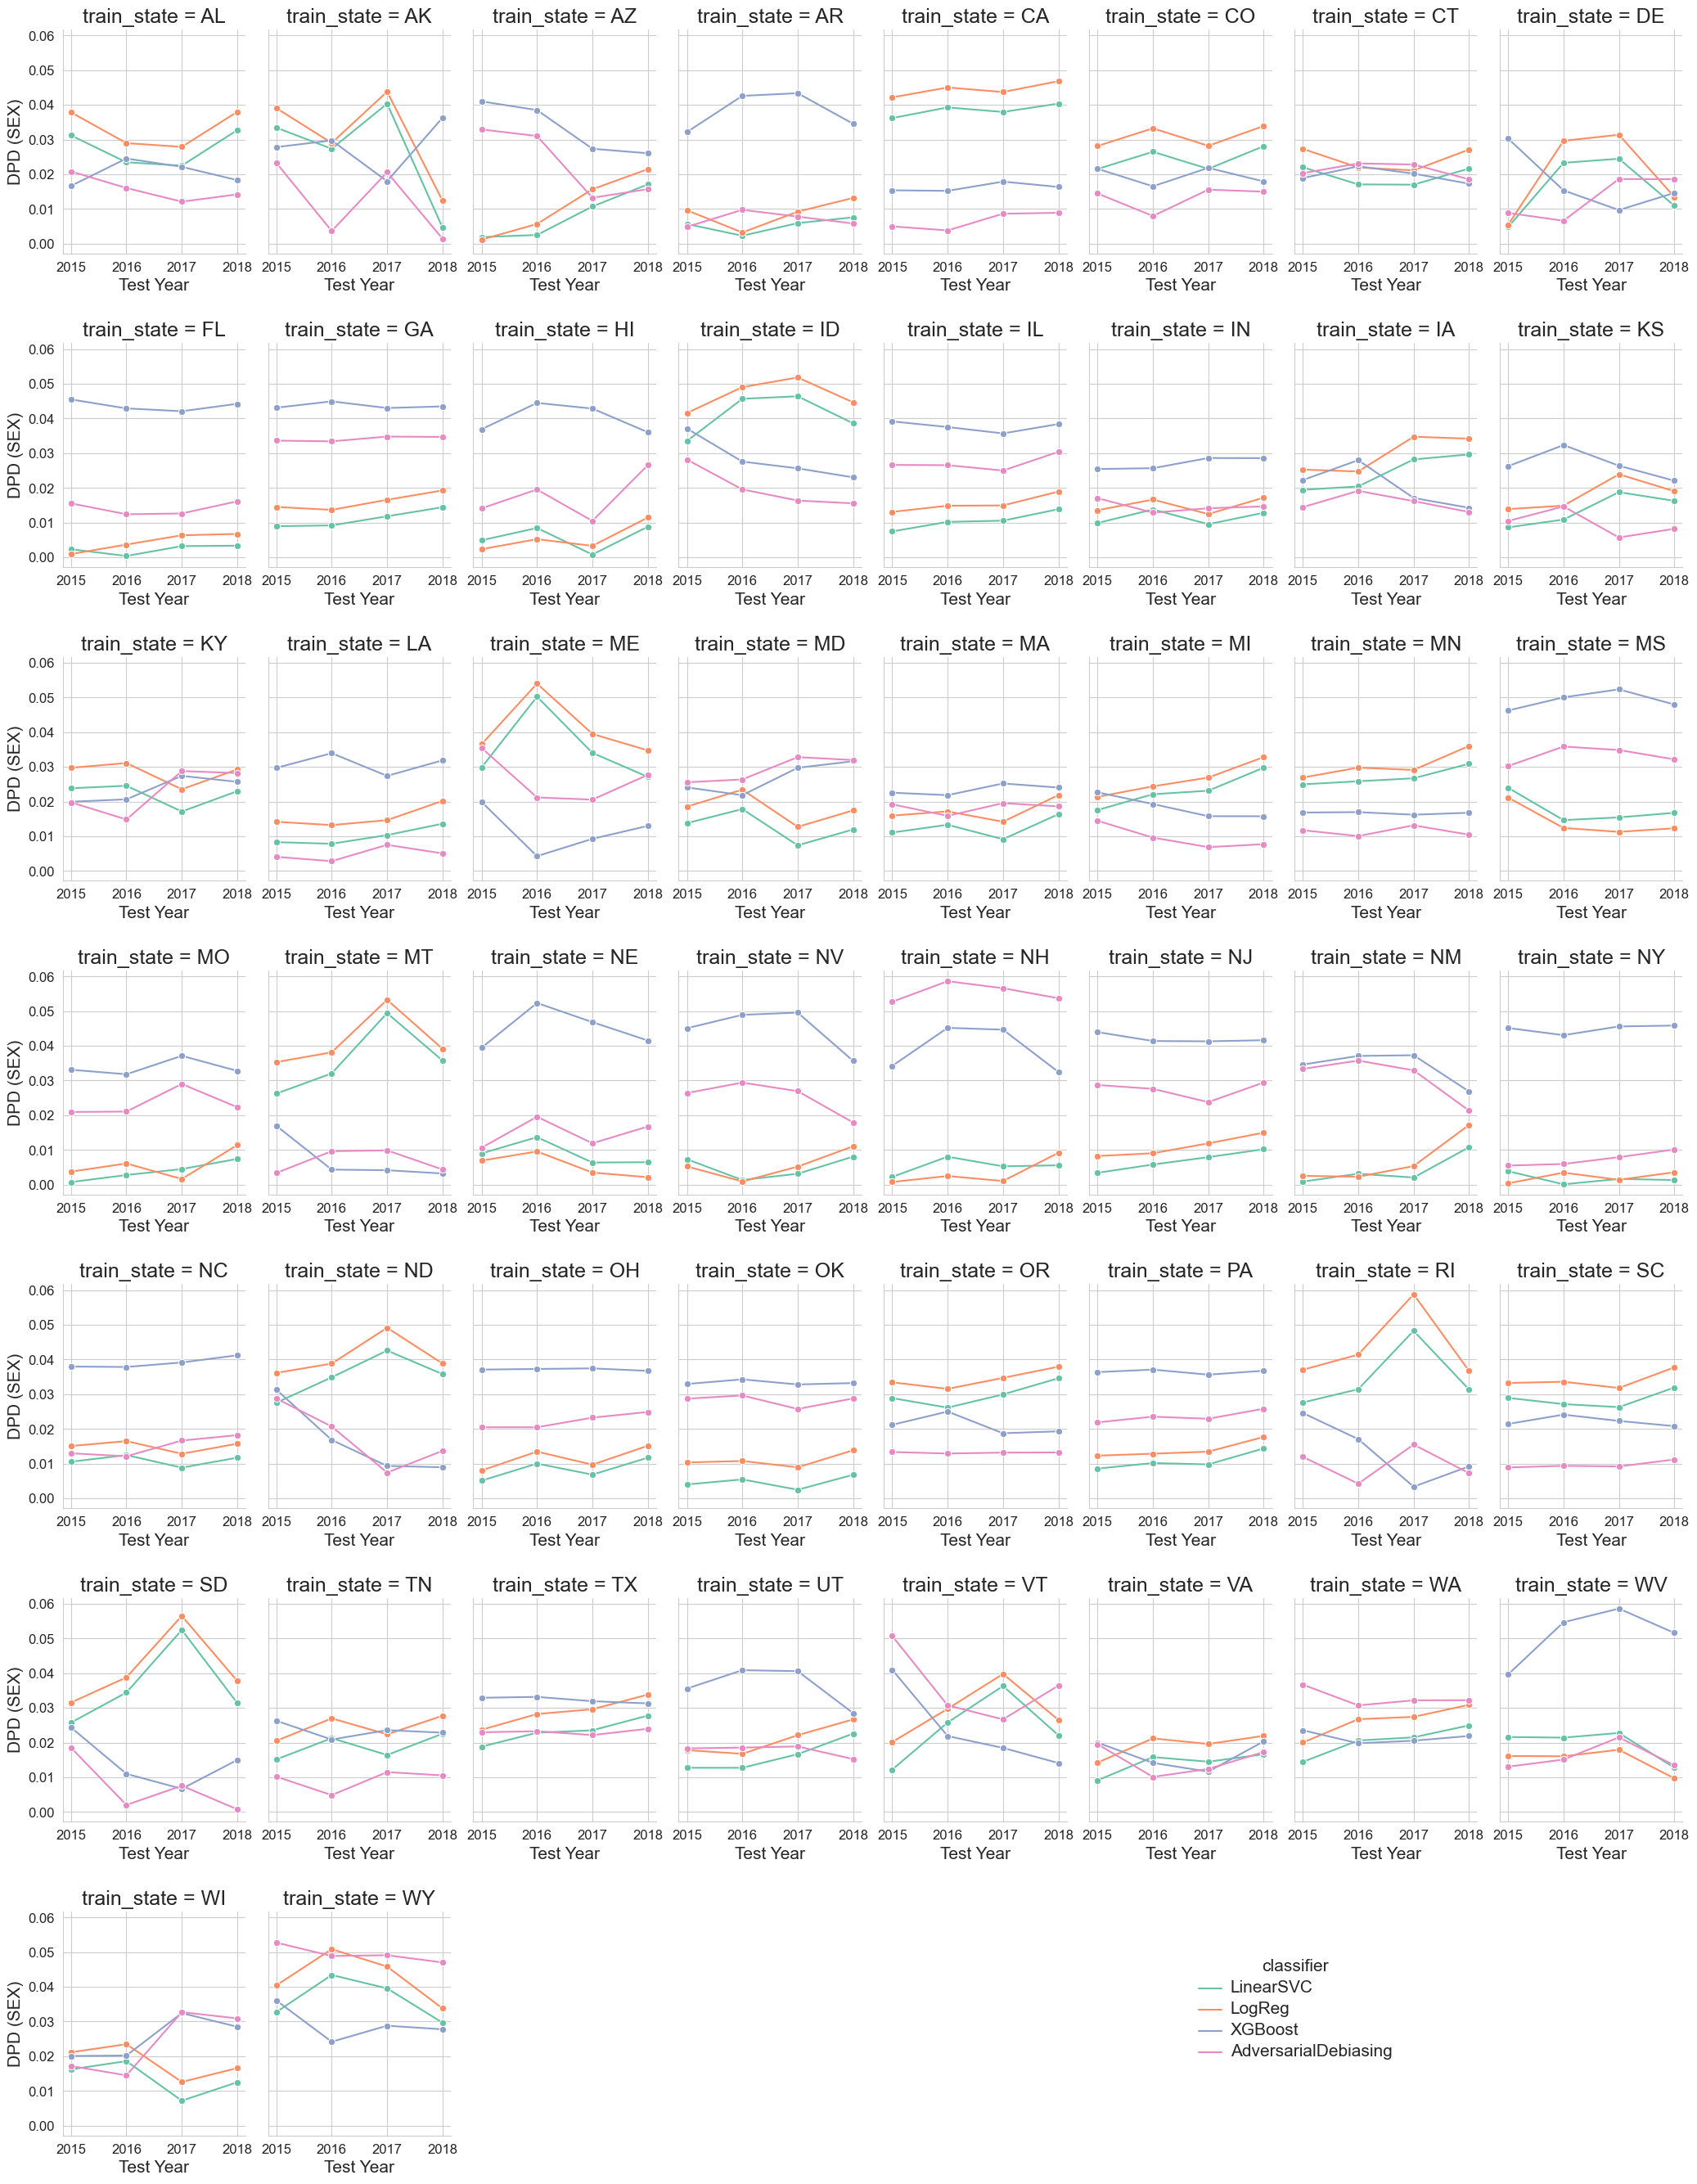

In [29]:
# plot with SEX DPD
g = sns.relplot(data=temporal_2014_results_sampled[~temporal_2014_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',
                x="year",
                y="sex_dpd",
                marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='Set2',
                height=4, aspect=0.65
           )

for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("DPD (SEX)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)
    #plt.subplots_adjust(bottom=0.5,hspace=0.5)
    #print(ax.title.get_text()[-2:])

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['dpd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_sex_dpd_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_sex_dpd_sampling.png'),format='png',dpi=300)

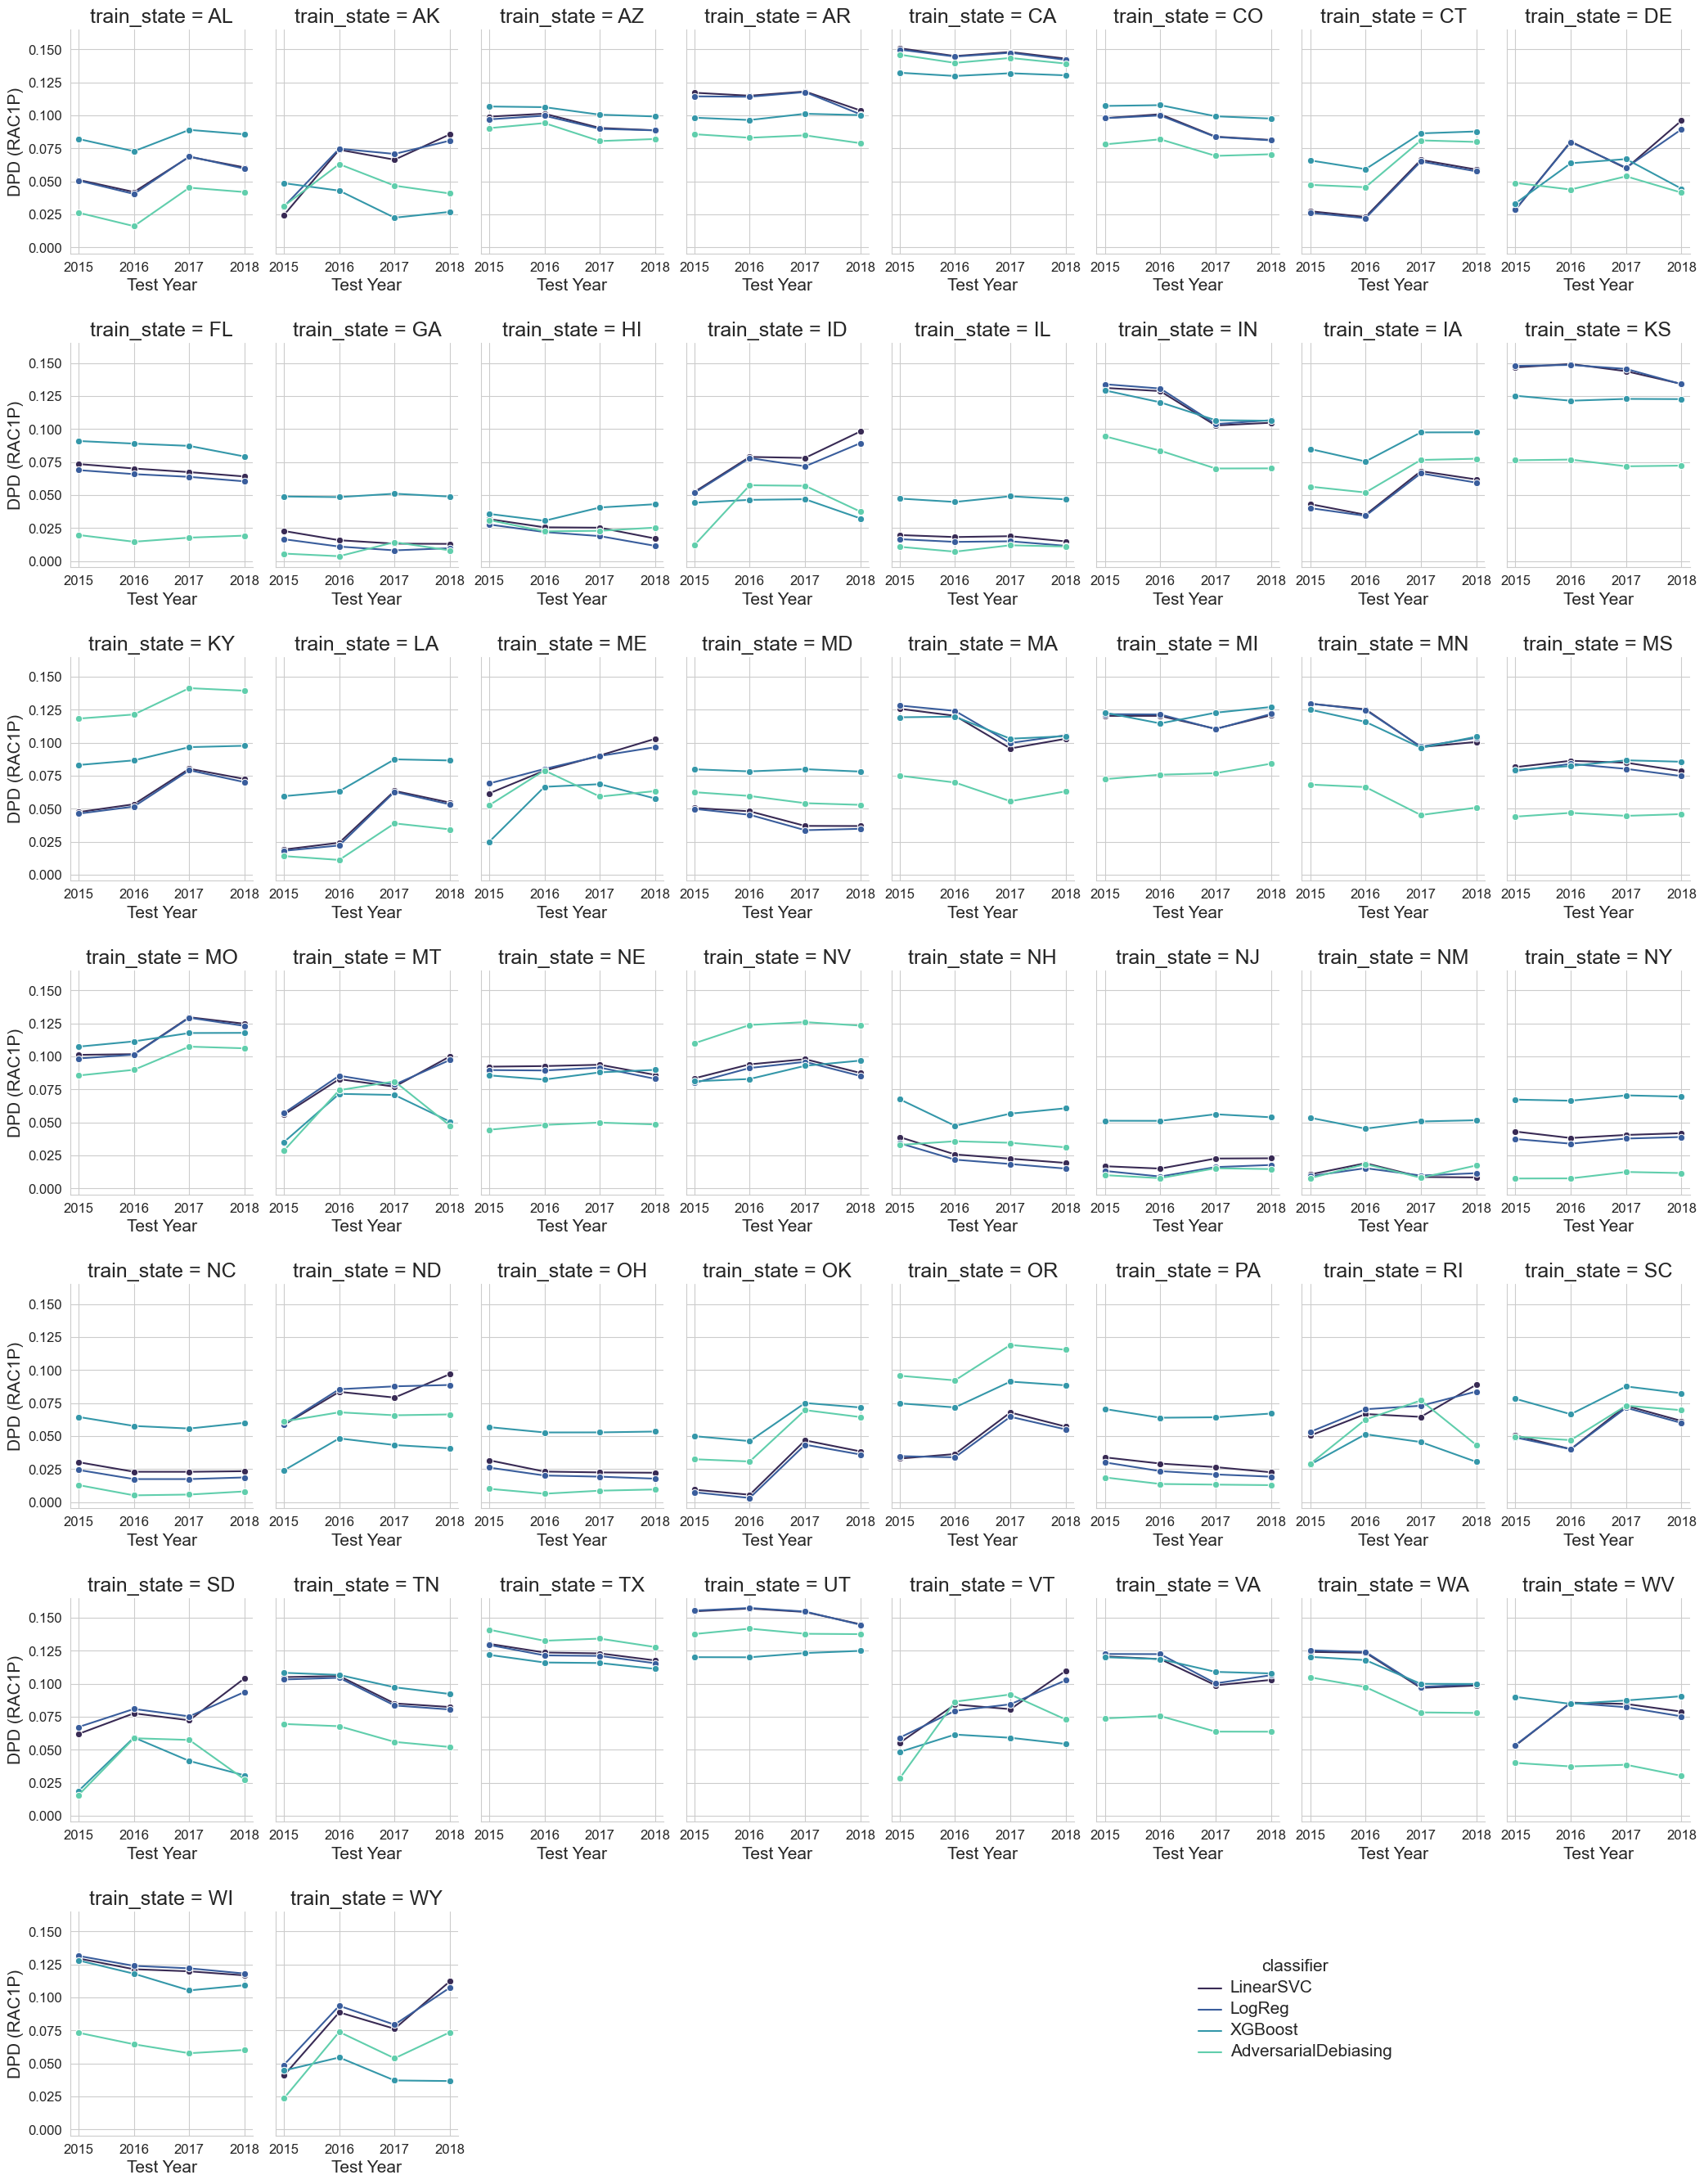

In [30]:
g = sns.relplot(data=temporal_2014_results_sampled[~temporal_2014_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])],
                kind='line',x="year",y="rac_dpd", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='mako',
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("DPD (RAC1P)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)
#
#     group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
#     #print(group['spd_sex'].values)
#     ax.scatter([2015,2016,2017,2018],abs(group['dpd_rac'].values),s=15,marker='x',c='red')
plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_rac_dpd_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_rac_dpd_sampling.png'),format='png',dpi=300)

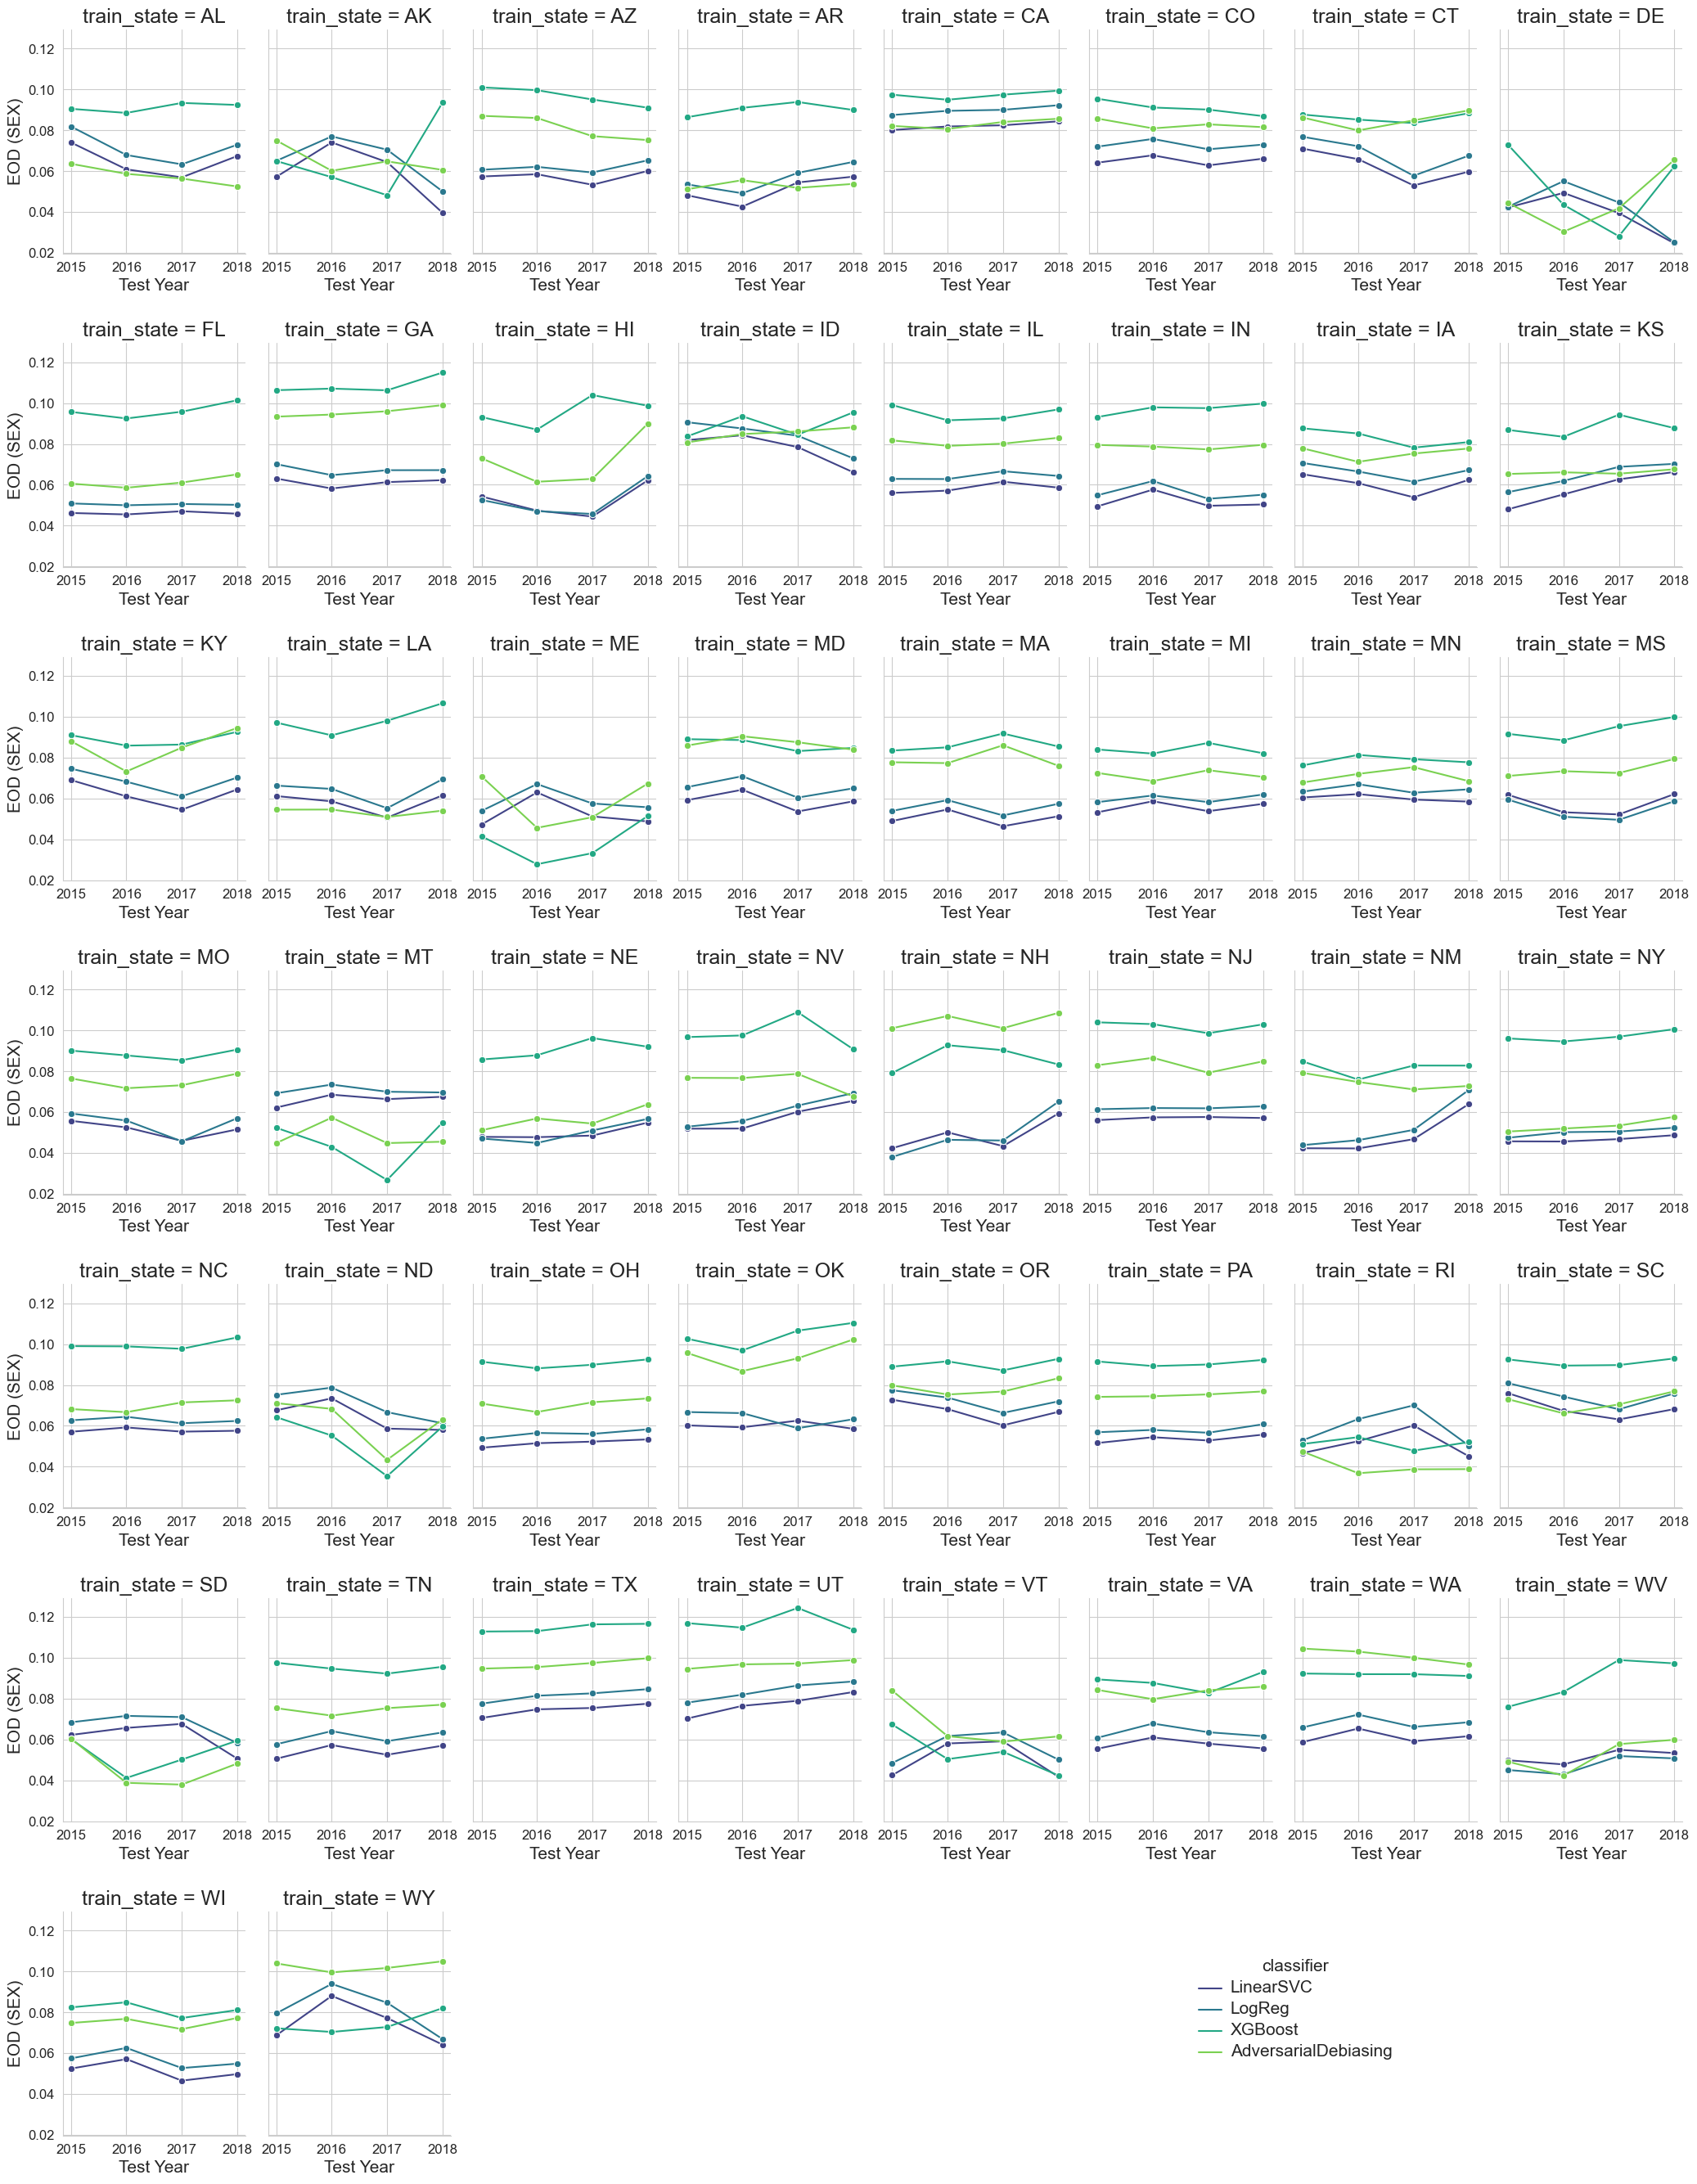

In [31]:
# EOD sex
g = sns.relplot(data=temporal_2014_results_sampled[~temporal_2014_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',x="year",y="sex_eod", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette='viridis',
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("EOD (SEX)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['spd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_sex_eod_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_sex_eod_sampling.png'),format='png',dpi=300)

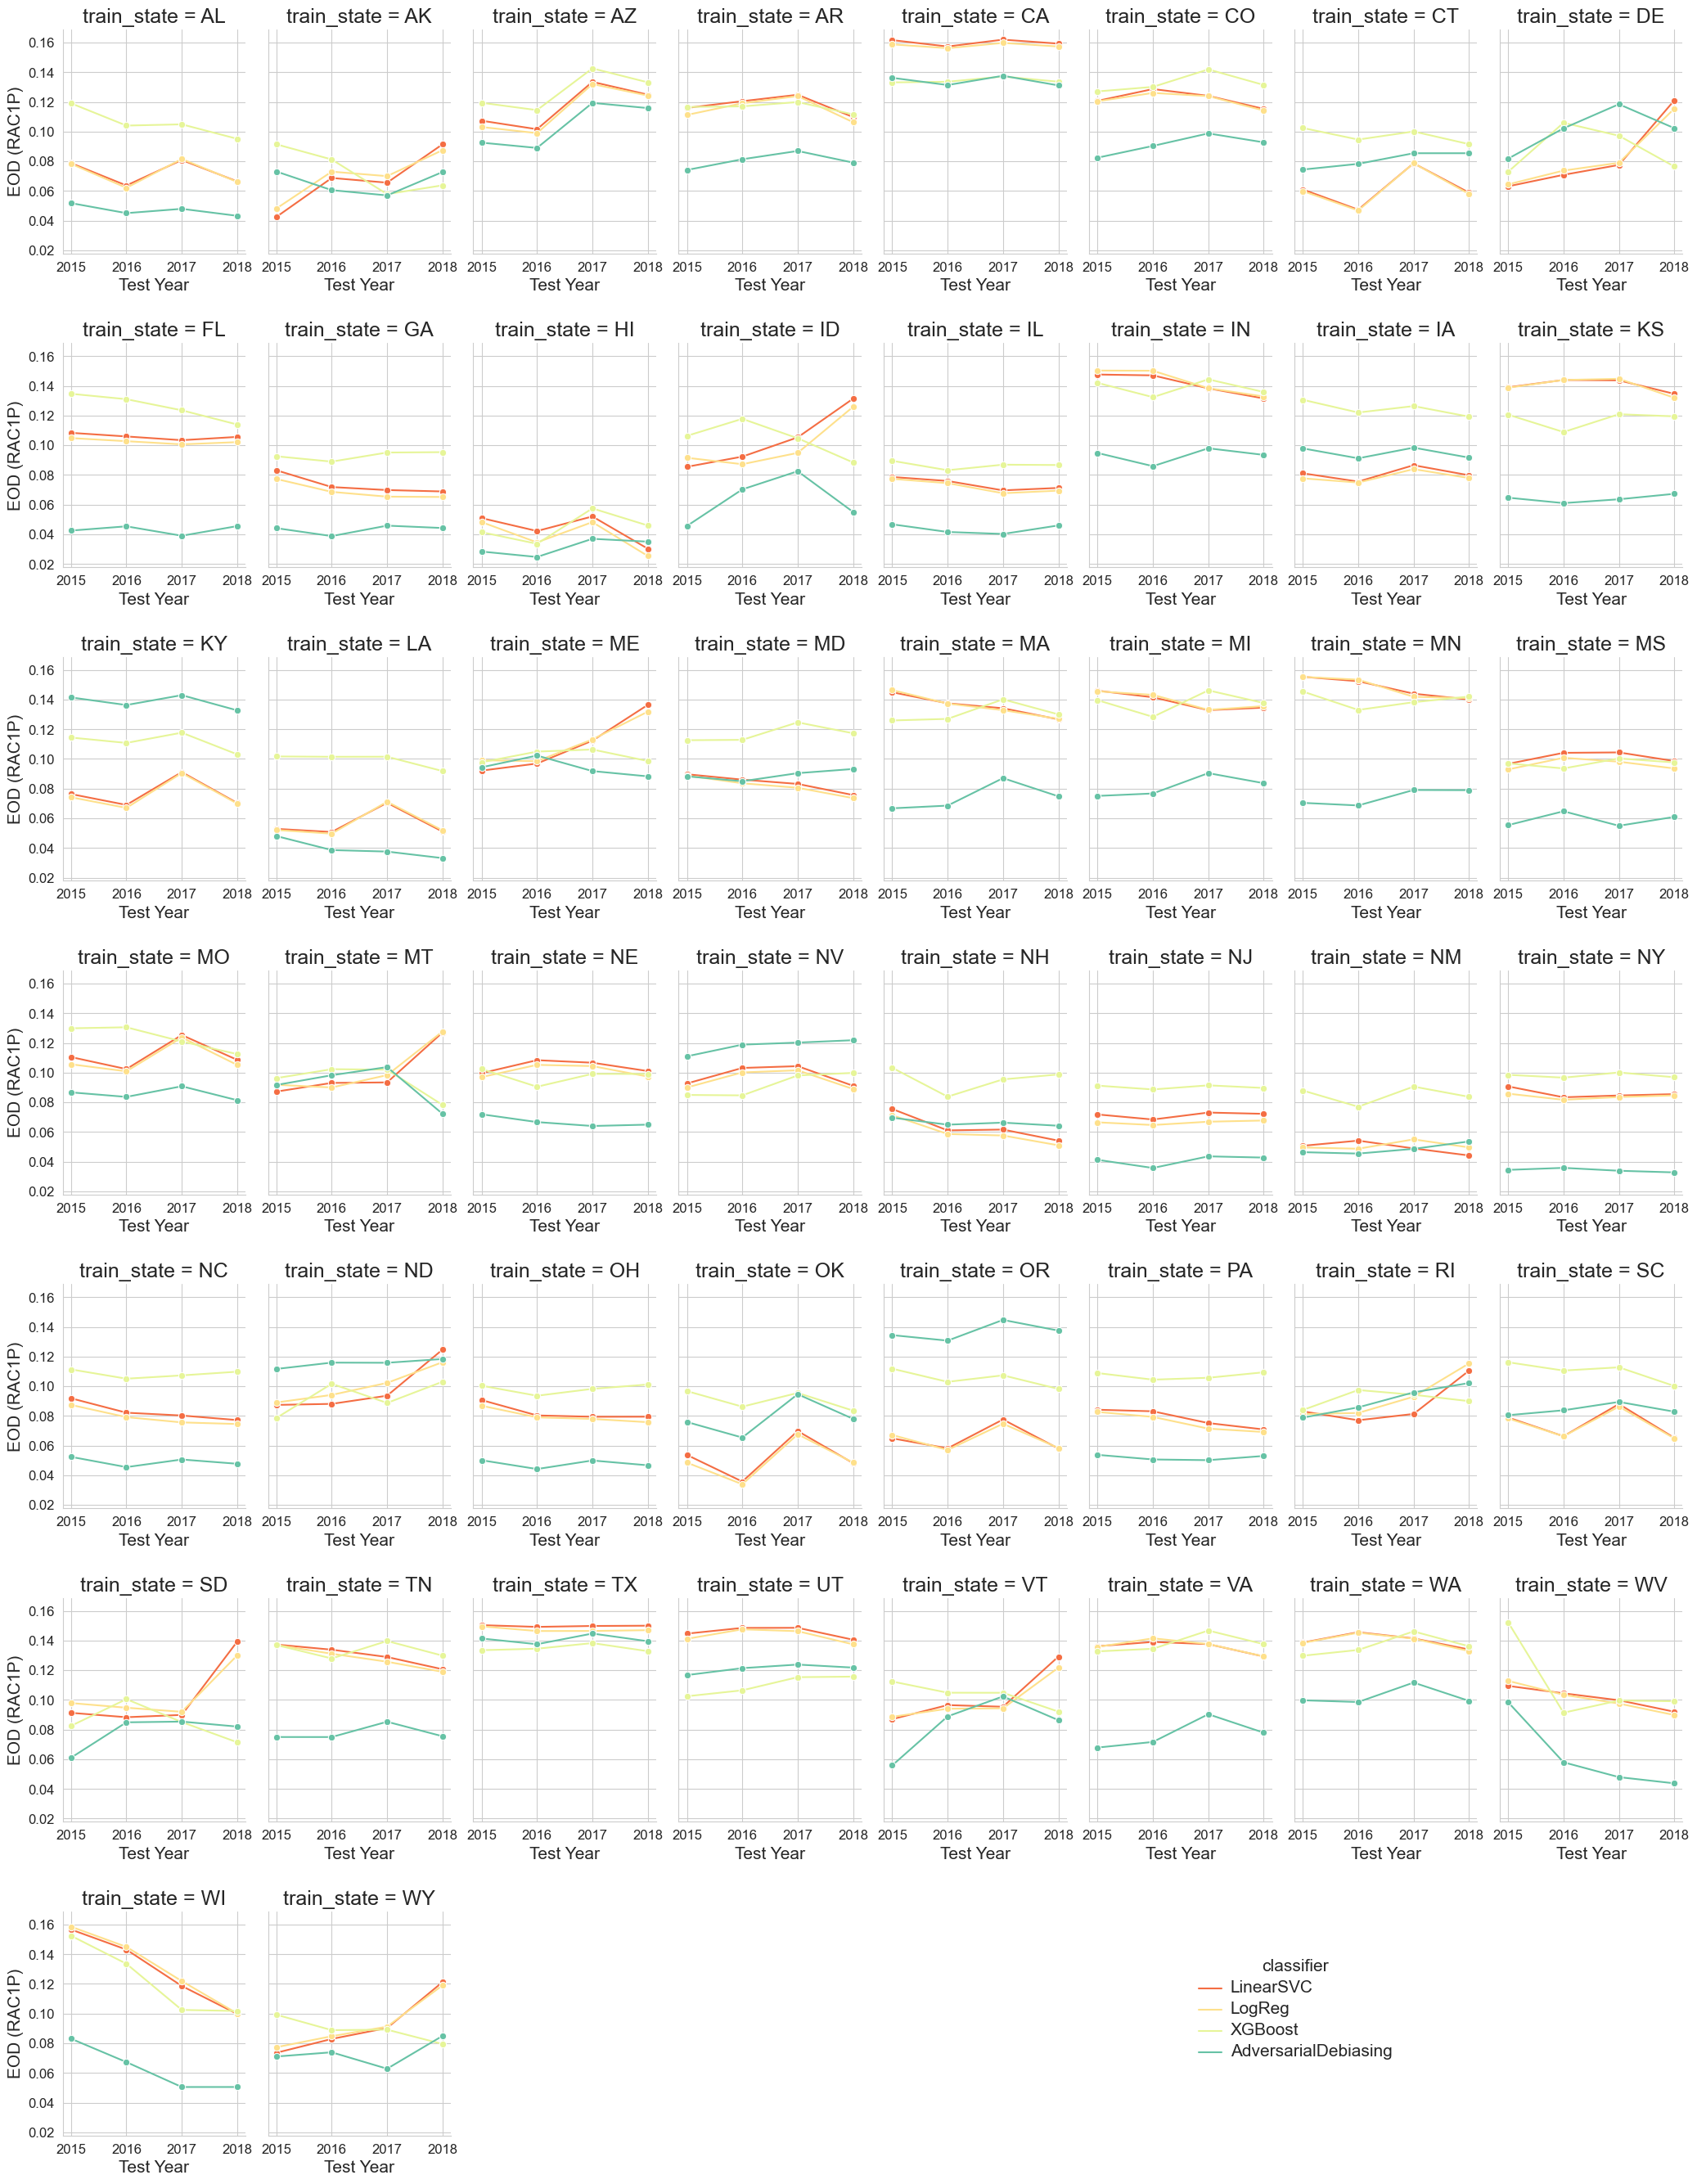

In [32]:
# EOD RAC1P
g = sns.relplot(data=temporal_2014_results_sampled[~temporal_2014_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])], kind='line',x="year",y="rac_eod", marker='o',
                hue="classifier", col="train_state",col_wrap=8, palette="Spectral",
                height=4, aspect=0.65
           )
for ax in g.axes:
    ax.tick_params(labelbottom=True, labelsize=12)
    ax.set_xlabel("Test Year",fontsize=15,visible=True)
    ax.set_ylabel("EOD (RAC1P)",fontsize=15)
    ax.set_title(ax.title.get_text(), fontsize=18)

    #group = metrics[(metrics['state']==ax.title.get_text()[-2:]) & (metrics['year']>2014)]
    #print(group['spd_sex'].values)
    #ax.scatter([2015,2016,2017,2018],abs(group['spd_sex'].values),s=15,marker='x',c='red')

plt.subplots_adjust(top=0.94, wspace=None, hspace=0.4)
leg = g._legend
leg._loc=8
leg.set_bbox_to_anchor([0.7, 0.05])
plt.setp(leg.get_texts(), fontsize=15)
plt.setp(leg.get_title(), fontsize=15)

g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_rac_eod_sampling.pdf'),format='pdf',dpi=300)
g.savefig(os.path.join(figures_sampling_dir,'temporal_2014_rac_eod_sampling.png'),format='png',dpi=300)

## Temporal results overall (sampling)

In [33]:
temporal_results_sampled= pd.read_csv(os.path.join(results_dir,"results_temporal_sampling.csv"),sep=',',header=0)
temporal_results_sampled

classifier  year  train_kfold_accuracy  accuracy  \
0                          LinearSVC  2015              0.745300  0.751103   
1                          LinearSVC  2016              0.745300  0.749391   
2                          LinearSVC  2017              0.745300  0.753069   
3                          LinearSVC  2018              0.745300  0.752520   
4                             LogReg  2015              0.745368  0.750709   
...                              ...   ...                   ...       ...   
4991            AdversarialDebiasing  2017              0.746814  0.743233   
4992  ExponentiatedGradientReduction  2014              0.722508  0.687278   
4993  ExponentiatedGradientReduction  2015              0.722508  0.691508   
4994  ExponentiatedGradientReduction  2016              0.722508  0.706253   
4995  ExponentiatedGradientReduction  2017              0.722508  0.692730   

      bal_accuracy  precision    recall  tpr_fairlearn  fpr_fairlearn  \
0         0.749882   0.728010  0.816129       0.816129       0.316366   
1         0.747833   0.728653  0.813301       0.813301       0.317635   
2         0.750396   0.733581  0.822508       0.822508       0.321716   
3         0.749289   0.737491  0.818452       0.818452       0.319874   
4         0.749662   0.731496  0.806468       0.806468       0.307144   
...            ...        ...       ...            ...            ...   
4991      0.743266   0.738008  0.750622       0.750622       0.264090   
4992      0.686990   0.680110  0.718027       0.718027       0.344047   
4993      0.691574   0.678978  0.724110       0.724110       0.340961   
4994      0.706107   0.695514  0.738438       0.738438       0.326225   
4995      0.692899   0.677424  0.730578       0.730578       0.344780   

      tnr_fairlearn  fnr_fairlearn       auc   sex_dpd   sex_dpr   sex_eod  \
0          0.683634       0.183871  0.820399  0.031191  0.946823  0.074042   
1          0.682365       0.186699  0.820080  0.023443  0.959804  0.060903   
2          0.678284       0.177492  0.822214  0.022464  0.962097  0.056966   
3          0.680126       0.181548  0.821371  0.032699  0.945245  0.067384   
4          0.692856       0.193532  0.820539  0.037831  0.934822  0.081864   
...             ...            ...       ...       ...       ...       ...   
4991       0.735910       0.249378  0.817604  0.004405  0.991337  0.050157   
4992       0.655953       0.281973  0.748782  0.008069  0.984969  0.029673   
4993       0.659039       0.275890  0.757510  0.006988  0.986952  0.025869   
4994       0.673775       0.261562  0.769942  0.016297  0.969898  0.036999   
4995       0.655220       0.269422  0.759336  0.006528  0.987912  0.026821   

       rac_dpd   rac_dpr train_state  train_year   rac_eod  
0     0.051173  0.915073          AL        2014  0.078750  
1     0.041993  0.929656          AL        2014  0.063685  
2     0.068611  0.890767          AL        2014  0.080854  
3     0.060572  0.902925          AL        2014  0.066437  
4     0.050614  0.914489          AL        2014  0.078291  
...        ...       ...         ...         ...       ...  
4991  0.036329  0.931439          WY        2018  0.068699  
4992  0.008500  0.984154          WY        2018  0.027347  
4993  0.014063  0.973779          WY        2018  0.016962  
4994  0.029997  0.945493          WY        2018  0.024314  
4995  0.013855  0.974492          WY        2018  0.028806  

[4996 rows x 20 columns]

In [34]:
temporal_results_sampled[~temporal_results_sampled['classifier'].isin(['ExponentiatedGradientReduction'])].groupby\
    (by=['train_state',
                                                                                                       'train_year',
                                                                                                       'classifier'])\
    .size()

train_state  train_year  classifier          
AK           2014        AdversarialDebiasing    4
                         LinearSVC               4
                         LogReg                  4
                         XGBoost                 4
             2015        AdversarialDebiasing    4
                                                ..
WY           2017        XGBoost                 4
             2018        AdversarialDebiasing    4
                         LinearSVC               4
                         LogReg                  4
                         XGBoost                 4
Length: 1000, dtype: int64

In [35]:
acc_temporal_sampled = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])]\
    .groupby\
    (by=["train_year","classifier","train_state"]).agg(median_accuracy=('accuracy','median')).reset_index()
acc_temporal_sampled

train_year            classifier train_state  median_accuracy
0          2014  AdversarialDebiasing          AK         0.737382
1          2014  AdversarialDebiasing          AL         0.775309
2          2014  AdversarialDebiasing          AR         0.768403
3          2014  AdversarialDebiasing          AZ         0.776269
4          2014  AdversarialDebiasing          CA         0.775623
..          ...                   ...         ...              ...
995        2018               XGBoost          VT         0.744615
996        2018               XGBoost          WA         0.772783
997        2018               XGBoost          WI         0.773647
998        2018               XGBoost          WV         0.765043
999        2018               XGBoost          WY         0.743578

[1000 rows x 4 columns]

In [36]:
acc_temporal_sampled.groupby(by=['train_year','classifier']).size()

train_year  classifier          
2014        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2015        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2016        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2017        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
2018        AdversarialDebiasing    50
            LinearSVC               50
            LogReg                  50
            XGBoost                 50
dtype: int64

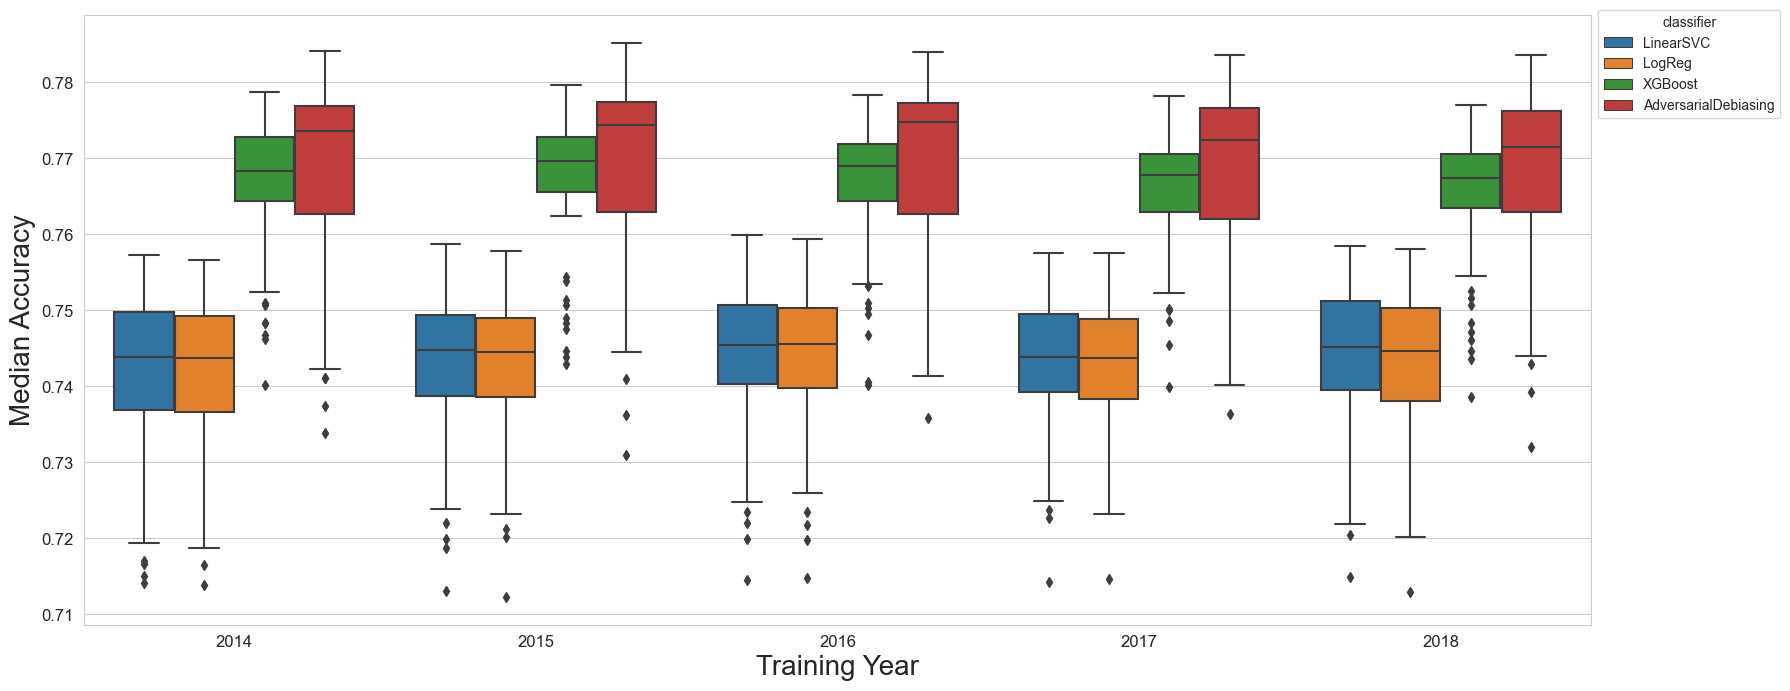

In [46]:
plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_accuracy",
                 hue="classifier",
                 data=acc_temporal_sampled,
                 hue_order=clfiers)
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median Accuracy",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')

plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_accuracy_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_accuracy_sampling.png'),format='png',dpi=300)

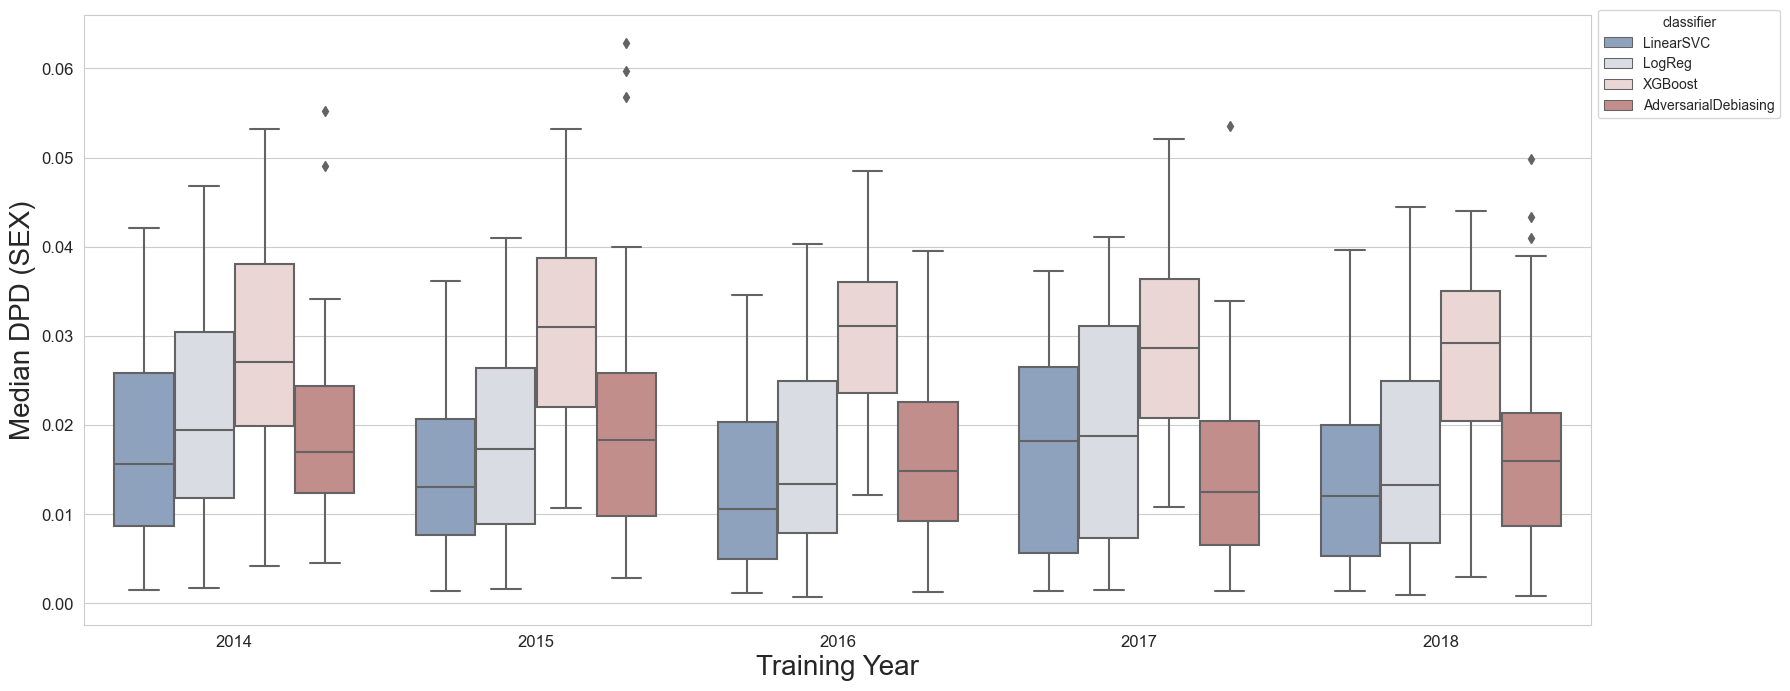

In [47]:
# median DPD SEX

sex_dpd_temporal = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_sex_dpd=('sex_dpd','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_sex_dpd",
                 hue="classifier",
                 data=sex_dpd_temporal,
                 palette="vlag",
                 hue_order=clfiers
                 )
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median DPD (SEX)",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_sex_dpd_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_sex_dpd_sampling.png'),format='png',dpi=300)

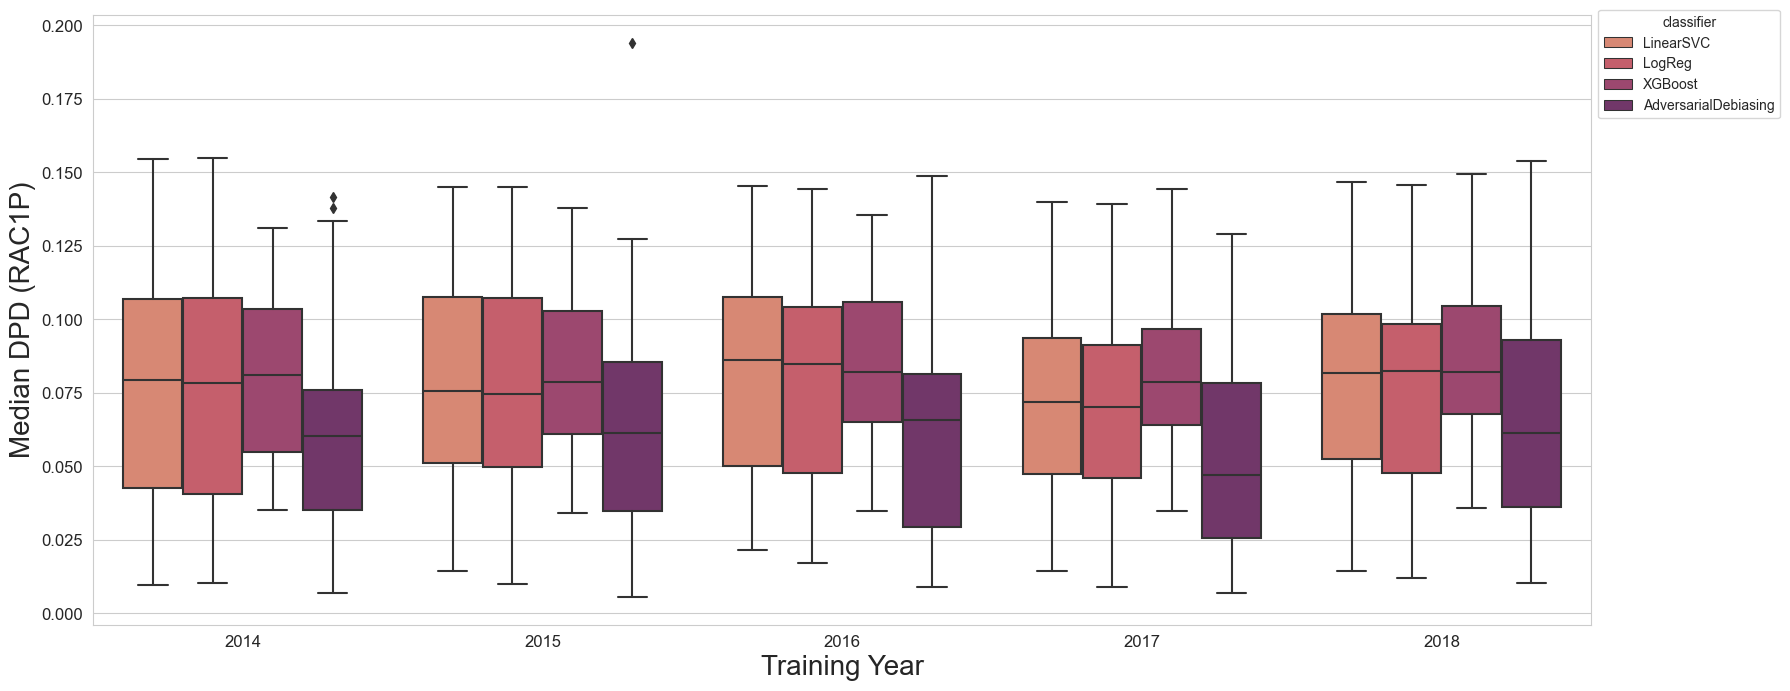

In [48]:
# median DPD RAC1P

rac_dpd_temporal = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_rac_dpd=('rac_dpd','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_rac_dpd",
                 hue="classifier",
                 data=rac_dpd_temporal,
                 palette="flare",
                 hue_order=clfiers
                 )
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median DPD (RAC1P)",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_rac_dpd_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_rac_dpd_sampling.png'),format='png',dpi=300)

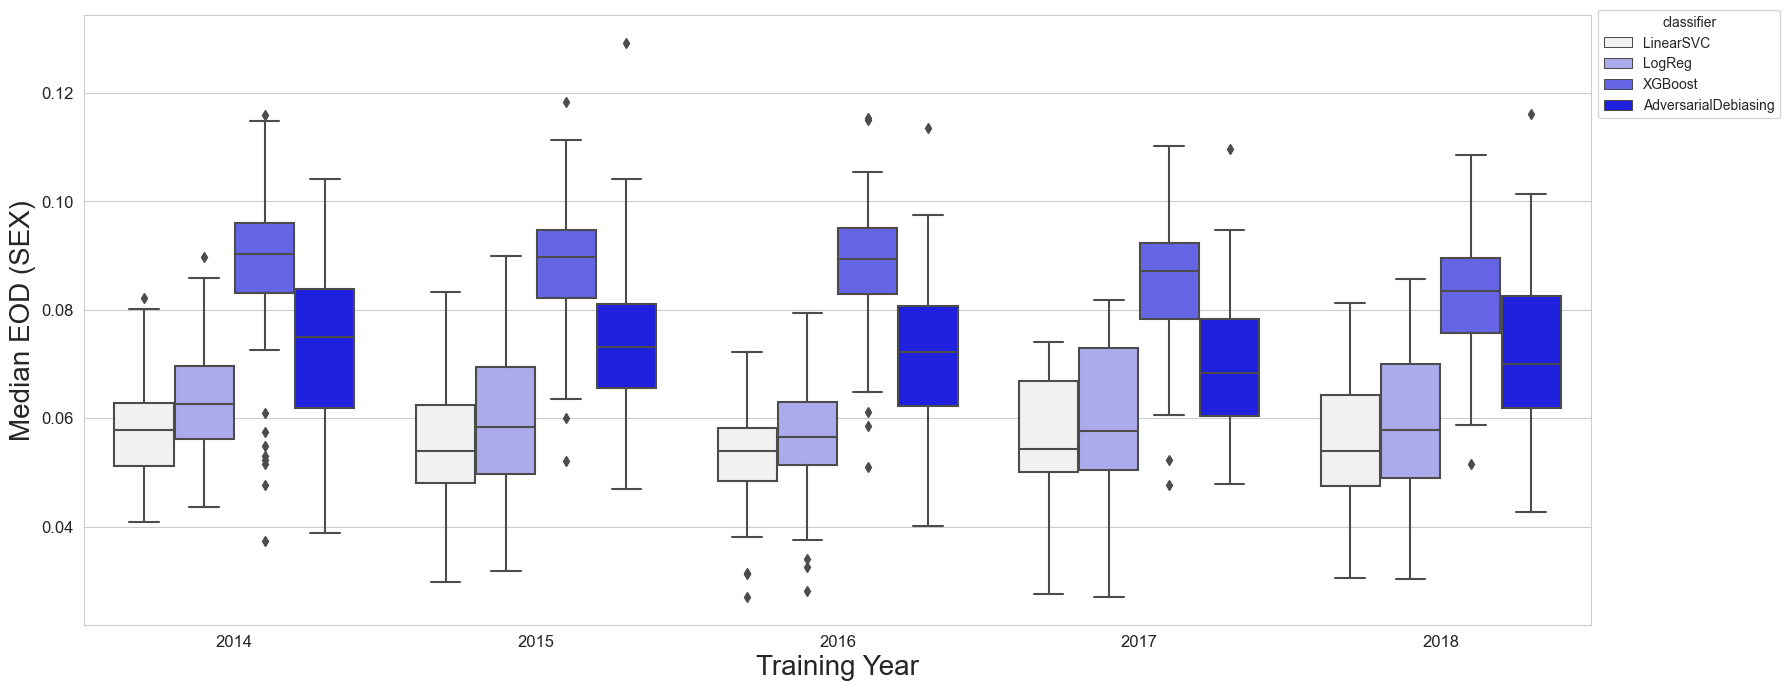

In [49]:
# median EOD SEX
sex_eod_temporal = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])].groupby\
    (by=["train_year","classifier","train_state"]).agg(median_sex_eod=('sex_eod','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_sex_eod",
                 hue="classifier",
                 data=sex_eod_temporal,
                 palette="light:b",
                 hue_order=clfiers
                 )
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median EOD (SEX)",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_sex_eod_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_sex_eod_sampling.png'),format='png',dpi=300)

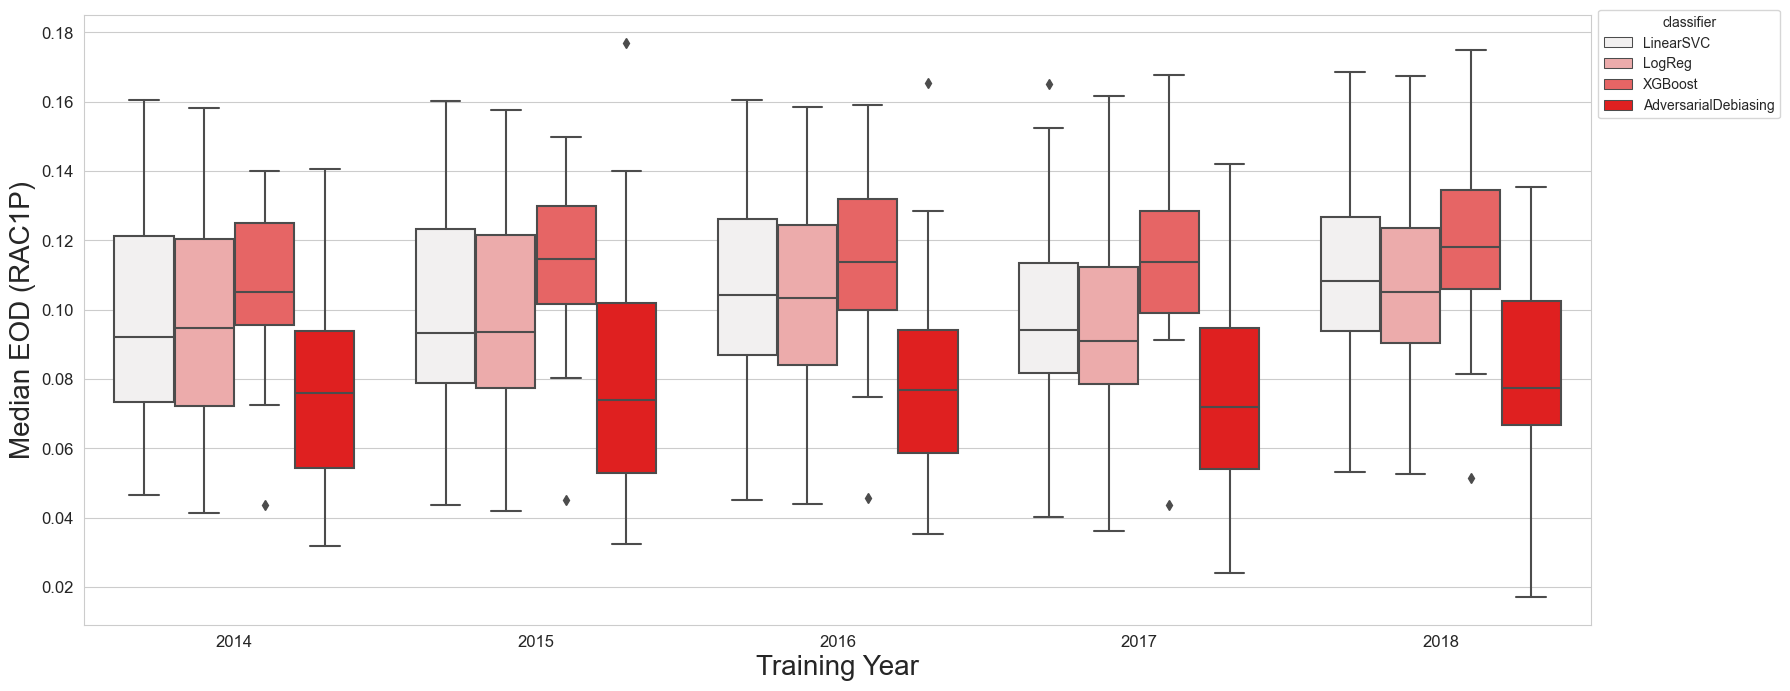

In [50]:
# median EOD RAC1P
rac_eod_temporal = temporal_results_sampled[~temporal_results_sampled['classifier'].isin
(['ExponentiatedGradientReduction'])]\
    .groupby\
    (by=["train_year","classifier","train_state"]).agg(median_rac_eod=('rac_eod','median')).reset_index()


plt.figure(figsize=(18,7))
ax = sns.boxplot(x="train_year",
                 y="median_rac_eod",
                 hue="classifier",
                 data=rac_eod_temporal,
                 palette="light:r",
                 hue_order=clfiers
                 )
ax.set_xlabel("Training Year",fontsize=20)
ax.set_ylabel("Median EOD (RAC1P)",fontsize=20)
ax.tick_params(labelsize=12)
# add stripplot with dodge=True
# sns.stripplot(x="train_year", y="accuracy", hue="classifier", data=final_temporal2, palette="flare", dodge=True, ax=ax,
#               ec='k', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], title='classifier', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_rac_eod_sampling.pdf'),format='pdf',dpi=300)
plt.savefig(os.path.join(figures_sampling_dir,'temporal_median_rac_eod_sampling.png'),format='png',dpi=300)